## Importing of libraries

In [1]:
#Importing necessary libraries for numeric processing
import numpy as np
import joblib
import scipy.stats as ss
import pprint as pp
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn import preprocessing
from keras.utils import np_utils

from keras import regularizers
from sklearn.preprocessing import LabelEncoder

#Importing necessary libraries for data processing and visualization
import pandas as pd
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt

#Importing libraries for data preprocessing and sampling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import imblearn as imbl
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

#Importing classification models and accuracy metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.calibration import calibration_curve

## Practical Motivation

According to the singapore heart foundation, cardiovascular disease (heart disease and stroke) represents 32% of global deaths annually. Singapore has seen a increase of death due to cardiovascular disease as well. (Singapore Heart Foundation,2021)

It was found by the Centre of disease control and prevention that there are many factors as to why one may develop heart disease. 

As a major health hazard to the population and something that can happen to anyone, we want to understand how other health factors as well as lifestyle habits might influence the risk of one getting heart disease.

## Sample Collection

Dataset is from Kaggle: https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system?select=2015.csv 

This dataset is taken from the Behavioral Risk Factor Surveillance System(BFRSS) survey conducted by the Centre of Disease Control(CDC) yearly in the United States. The survey is conducted over telephone to gather the data on the health status and conditions of the US residents.

This dataset has a variety of variables and hence we have chosen to see if an individual has heart disease based on their health metrics. The dataset has many columns of data, however many of them are duplicates or are very similar and hence here are our chosen variables.

The dataset is high reliable and trustworthy as it is taken from Centre for Disease control and prevention which is a government agency in the United States of America.

## Data
In this section, we will mention our data, and what was the question asked to obtain this data.

### Numerical:

**Physical Health** - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?

**Alcohol consumption** - During the past 30 days, how many days per week or per month did you have at least one drink of any alcoholic beverage such as beer, wine, a malt beverage or liquor?

**Mental Health** – Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)

**Age** - Age

### Categorical

**General Health** – Would you say that in general your health is...

**Exercise Rate** - During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise? 

**High Cholesterol** – Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high?

**High Blood Pressure** – Have you EVER been told by a doctor, nurse, or other health professional that you have high blood pressure?

**Gender** –  Gender

**Smoking Rate** – Do you now smoke cigarettes every day, some days, or not at all?

**Kidney Disease** – (Ever told) you have kidney disease? Do NOT include kidney stones, bladder infection or incontinence.

**Asthma** – (Ever told) you had asthma?

**Skin Cancer** – (Ever told) you had skin cancer

**Heart Attack** – (Ever told) you that you had a heart attack also called a myocardial infarction?

**Stroke** – (Ever told) you had a stroke?

**Checkup** - About how long has it been since you last visited a doctor for a routine checkup? A routine checkup is a general physical exam, not an exam for a specific injury, illness, or condition.

**Difficulty walking** - Do you have serious difficulty walking or climbing stairs?

**Heart Disease(response)** - (Ever told) you had angina or coronary heart disease?

We have a total of 19 variables, with 4 of them being numerical 15 of them being categorical.

## Problem formulation

**Problem statement:** What are some important health factors or life habits in determining the risk of having a heart disease?

We want to link the different health factors and habit of individuals and use it to determine the risk of getting heart disease.

We will train a model to determine if an individual has heart disease or not. From that, we will be able to analyse the data and siphon out any important information from the different predictors that we have used. From this, we can find its correlation and determine if that health factor or individual habits, is important in relation to heart disease.

## Data Preparation

Our dataset has roughly 300 variables. However, we have reduced this to 19 variables as many of the data is either a duplicate or a very similar question asked to respondents. From the remaining dataset, we chose a variety of health factors as well as life habits of the individuals.

The dataset has a mixture of numerical and categorical data. However, there are much more categorical data than numerical. Many of the categorical data are numbered and hence we had to replace them with their original metric.

We have done this and displayed the data cleaning with graphs to make it easier to visualize

In [2]:
#Reading dataframe
dataFrame =pd.read_csv('Dataset/hearts_2015.csv')
dataFrame.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [3]:
#Getting data info
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(323), object(7)
memory usage: 1.1+ GB


## 2. Data Cleaning

In this section, we will be cleaning the data. Here are some of the steps that will be taken.

1. Selection of variables
2. Renaming of variables
3. Removal of NULL data
4. Removal of duplicate data
5. renaming of categorical variable values

In [4]:
#Filtering data and renaming the columns name 
filtered_Data = dataFrame.filter(['PHYSHLTH','ALCDAY5','GENHLTH','EXERANY2','_AGE80','TOLDHI2','SEX','BPHIGH4','SMOKDAY2', 'CVDCRHD4', 'MENTHLTH', 'CHCKIDNY', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CVDINFR4', 'CVDSTRK3', 'CHECKUP1', 'PNEUVAC3', 'DIFFWALK','_MRACE1'], axis=1)
filtered_Data = filtered_Data.rename(columns={'PHYSHLTH': 'Physical Health', 'ALCDAY5': 'Alcohol Consumption', 'GENHLTH' : 'General Health', 'EXERANY2' : 'Exercise Rate', '_AGE80' : 'Age', 'TOLDHI2': 'High Cholestrol', 'SEX': 'Gender', 'BPHIGH4':'High Blood Pressure', 'SMOKDAY2': 'Smoking Rate', 'CVDCRHD4': 'Heart Disease', 'MENTHLTH': 'Mental Health', 'CHCKIDNY' : 'Kidney Disease', 'ASTHMA3': 'Asthma', 'CHCSCNCR': 'Skin Cancer', 'CHCOCNCR':'Other-type Cancer', 'CVDINFR4':'Heart Attack', 'CVDSTRK3': 'Stroke', 'CHECKUP1':'Medical Checkup','PNEUVAC3':'Pneumonia Vaccine', 'DIFFWALK':'Difficulty Walking','_MRACE1': 'Race'})
filtered_Data.head()

,Physical Health,Alcohol Consumption,General Health,Exercise Rate,Age,High Cholestrol,Gender,High Blood Pressure,Smoking Rate,Heart Disease,...,Kidney Disease,Asthma,Skin Cancer,Other-type Cancer,Heart Attack,Stroke,Medical Checkup,Pneumonia Vaccine,Difficulty Walking,Race
0,15.0,888.0,5.0,2.0,63.0,1.0,2.0,1.0,3.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
1,88.0,888.0,3.0,1.0,52.0,2.0,2.0,3.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0
2,15.0,NaN,4.0,NaN,71.0,1.0,2.0,3.0,NaN,2.0,...,2.0,2.0,2.0,1.0,7.0,1.0,1.0,NaN,NaN,1.0
3,30.0,888.0,5.0,2.0,63.0,1.0,2.0,1.0,NaN,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0
4,20.0,888.0,5.0,2.0,61.0,2.0,2.0,3.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0


In [5]:
#Checking for null values in data
filtered_Data.isnull().sum()

Physical Health             1
Alcohol Consumption     15931
General Health              2
Exercise Rate           35444
Age                         0
High Cholestrol         59154
Gender                      0
High Blood Pressure         1
Smoking Rate           257263
Heart Disease               1
Mental Health               0
Kidney Disease              0
Asthma                      0
Skin Cancer                 1
Other-type Cancer           0
Heart Attack                0
Stroke                      0
Medical Checkup             1
Pneumonia Vaccine       41943
Difficulty Walking      12334
Race                        0
dtype: int64

In [6]:
#Dropping rows with null value
filtered_Data.dropna(inplace = True)

#filtered_Data.shape
filtered_Data.shape

(151208, 21)

In [7]:
filtered_Data.isnull().sum()

Physical Health        0
Alcohol Consumption    0
General Health         0
Exercise Rate          0
Age                    0
High Cholestrol        0
Gender                 0
High Blood Pressure    0
Smoking Rate           0
Heart Disease          0
Mental Health          0
Kidney Disease         0
Asthma                 0
Skin Cancer            0
Other-type Cancer      0
Heart Attack           0
Stroke                 0
Medical Checkup        0
Pneumonia Vaccine      0
Difficulty Walking     0
Race                   0
dtype: int64

In [8]:
# sort values of data based on heart disease and resetting index
filtered_Data = filtered_Data.sort_values(by = "Age", ascending = True)
filtered_Data.reset_index(inplace = True, drop = True)
filtered_Data.head()

,Physical Health,Alcohol Consumption,General Health,Exercise Rate,Age,High Cholestrol,Gender,High Blood Pressure,Smoking Rate,Heart Disease,...,Kidney Disease,Asthma,Skin Cancer,Other-type Cancer,Heart Attack,Stroke,Medical Checkup,Pneumonia Vaccine,Difficulty Walking,Race
0,88.0,888.0,3.0,1.0,18.0,2.0,1.0,3.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1,88.0,204.0,1.0,2.0,18.0,2.0,2.0,3.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,1.0
2,88.0,888.0,2.0,1.0,18.0,2.0,1.0,3.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
3,3.0,207.0,1.0,1.0,18.0,2.0,2.0,3.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,2.0,1.0
4,88.0,888.0,3.0,1.0,18.0,2.0,1.0,3.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,2.0,7.0


**We will be show the visualization of the raw and cleaned filtered data using a catplot**

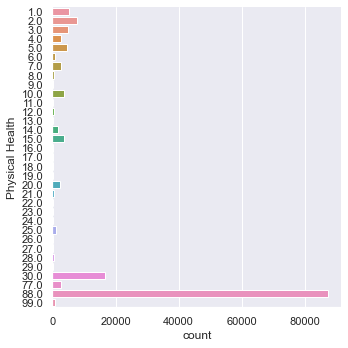

Filtered Plot


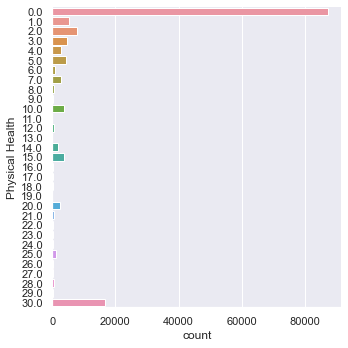

In [9]:
#Plot of physical health
#filtered_Data.groupby('Physical Health').size()
sb.catplot(y = "Physical Health", data = filtered_Data, kind = "count")
plt.show()

#88 is actually 0, 77 and 99 were not valid responses
#Replacing 88 to 0 in physical health
filtered_Data['Physical Health'] = filtered_Data['Physical Health'].replace({88:0})

#Dropping out other and unknown columns as they are something that we aren't able to classify 
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['Physical Health'] == 77].index)
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['Physical Health'] == 99].index)
filtered_Data.reset_index(inplace = True, drop = True)

print("Filtered Plot")
sb.catplot(y = "Physical Health", data = filtered_Data, kind = "count")
plt.show()
#filtered_Data.groupby('Physical Health').size()

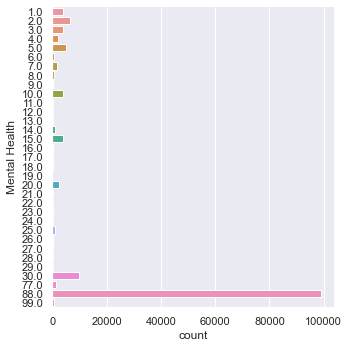

Filtered Plot


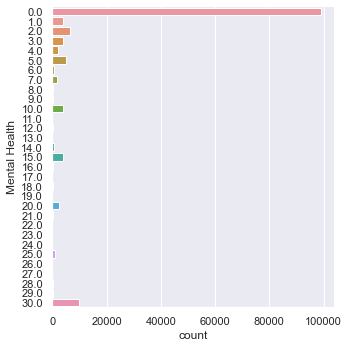

In [10]:
#Plotting of Mental Health
filtered_Data.groupby('Mental Health').size()
sb.catplot(y = "Mental Health", data = filtered_Data, kind = "count")
plt.show()

#88 is actually 0, 77 and 99 were not valid responses
#Replacing 88 with 0 
filtered_Data['Mental Health'] = filtered_Data['Mental Health'].replace({88:0})

#Dropping out other and unknown columns as they are something that we aren't able to classify 
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['Mental Health'] > 30.0].index)
filtered_Data.reset_index(inplace = True, drop = True)

print("Filtered Plot")
sb.catplot(y = "Mental Health", data = filtered_Data, kind = "count")
plt.show()

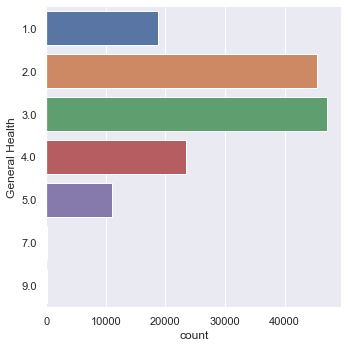

Filtered Plot


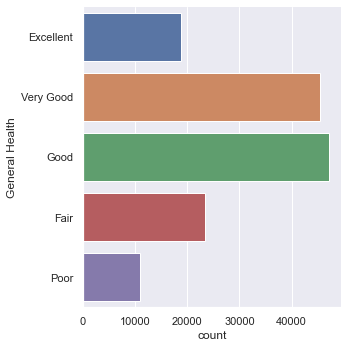

In [11]:
#Plotting of General health
filtered_Data.groupby('General Health').size()
sb.catplot(y = "General Health", data = filtered_Data, kind = "count")
plt.show()

#Dropping unnecessary values 
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['General Health'] > 5].index)
filtered_Data.reset_index(inplace = True, drop = True)

#Changing general health from numerical to categorical data 
filtered_Data['General Health'] = pd.Categorical(filtered_Data['General Health'], categories=[1, 2, 3, 4, 5], ordered=True)
filtered_Data['General Health'] = filtered_Data['General Health'].cat.rename_categories({1: 'Excellent', 2: 'Very Good', 3:'Good', 4:'Fair', 5:'Poor'})

print("Filtered Plot")
sb.catplot(y = "General Health", data = filtered_Data, kind = "count")
plt.show()

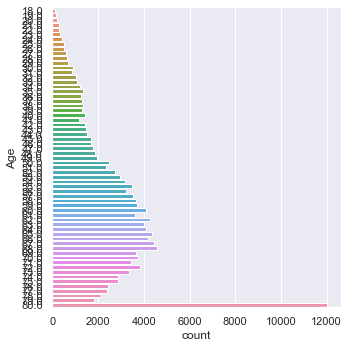

In [12]:
#Plotting for Age
filtered_Data.groupby('Age').size()
sb.catplot(y = "Age", data = filtered_Data, kind = "count")
plt.show()

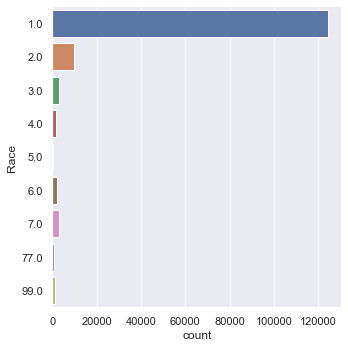

Filtered Plot


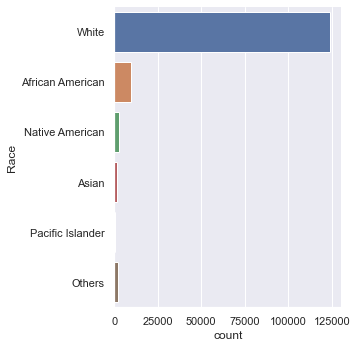

In [13]:
#Plotting for Race
filtered_Data.groupby('Race').size()
sb.catplot(y = "Race", data = filtered_Data, kind = "count")
plt.show()

#Dropping out unnecessary column
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['Race'] > 6].index)
filtered_Data.reset_index(inplace = True, drop = True)

#Changing Exercise Rate to categorical data 
filtered_Data['Race'] = pd.Categorical(filtered_Data['Race'], categories=[1, 2,3,4,5,6], ordered=True)
filtered_Data['Race'] = filtered_Data['Race'].cat.rename_categories({1: 'White', 2: 'African American', 3:'Native American', 4:'Asian',5:'Pacific Islander',6:'Others'})
#filtered_Data.groupby('Exercise Rate').size()

print("Filtered Plot")
sb.catplot(y = "Race", data = filtered_Data, kind = "count")
plt.show()


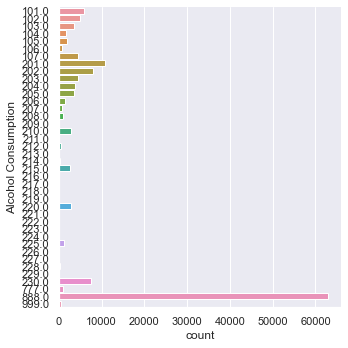

Filtered Plot


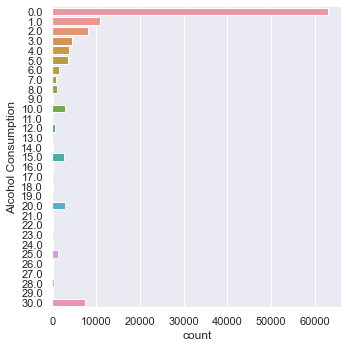

In [14]:
#Plotting for Alcohol consumption 
filtered_Data.groupby('Alcohol Consumption').size()
sb.catplot(y = "Alcohol Consumption", data = filtered_Data, kind = "count")
plt.show()

#Replacing 888 with 200 
filtered_Data['Alcohol Consumption'] = filtered_Data['Alcohol Consumption'].replace({888:200})

#Filtering out other and unknown columns as they are something that we aren't able to classify 
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['Alcohol Consumption'] < 200.0].index)
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['Alcohol Consumption'] == 999.0].index)
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['Alcohol Consumption'] == 777.0].index)
filtered_Data.reset_index(inplace = True, drop = True)

for i in range(31):    
    filtered_Data['Alcohol Consumption'] = filtered_Data['Alcohol Consumption'].replace({200+i: i})

print("Filtered Plot")
sb.catplot(y = "Alcohol Consumption", data = filtered_Data, kind = "count")
plt.show()

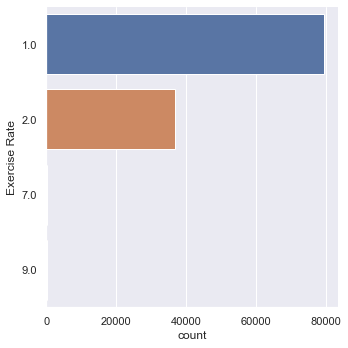

Filtered Plot


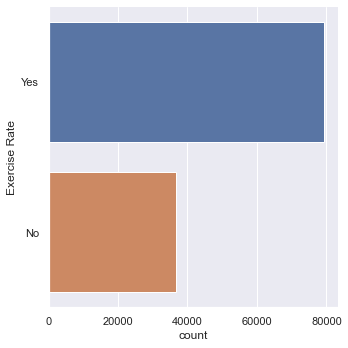

In [15]:
#Plotting for Exercise Rate
filtered_Data.groupby('Exercise Rate').size()
sb.catplot(y = "Exercise Rate", data = filtered_Data, kind = "count")
plt.show()

#Dropping unnecessary values 
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['Exercise Rate'] > 2].index)
filtered_Data.reset_index(inplace = True, drop = True)

#Changing Exercise Rate to categorical data 
filtered_Data['Exercise Rate'] = pd.Categorical(filtered_Data['Exercise Rate'], categories=[1, 2], ordered=True)
filtered_Data['Exercise Rate'] = filtered_Data['Exercise Rate'].cat.rename_categories({1: 'Yes', 2: 'No'})
#filtered_Data.groupby('Exercise Rate').size()

print("Filtered Plot")
sb.catplot(y = "Exercise Rate", data = filtered_Data, kind = "count")
plt.show()

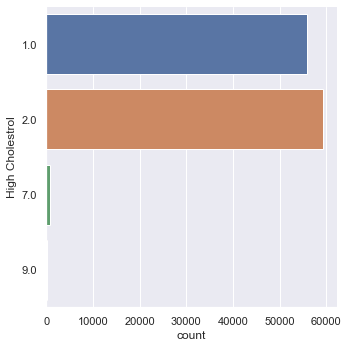

Filtered Plot


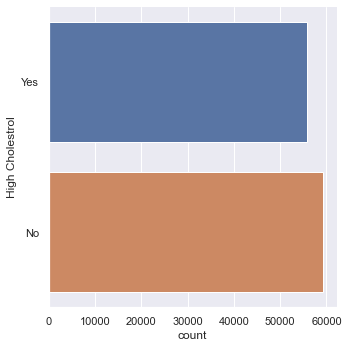

In [16]:
#Plotting for High Cholestrol
filtered_Data.groupby('High Cholestrol').size()
sb.catplot(y = "High Cholestrol", data = filtered_Data, kind = "count")
plt.show()

#Filtering out unknown column, as we aren't able to accurately classify them  
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['High Cholestrol'] == 7].index)
filtered_Data.reset_index(inplace = True, drop = True)

#Changing High Cholestrol to categorical data 
filtered_Data['High Cholestrol'] = pd.Categorical(filtered_Data['High Cholestrol'], categories=[1, 2], ordered=True)
filtered_Data['High Cholestrol'] = filtered_Data['High Cholestrol'].cat.rename_categories({1: 'Yes', 2: 'No'})

print("Filtered Plot")
sb.catplot(y = "High Cholestrol", data = filtered_Data, kind = "count")
plt.show()

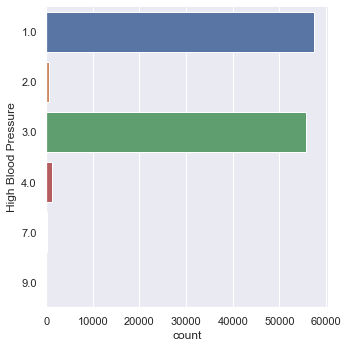

Filtered Plot


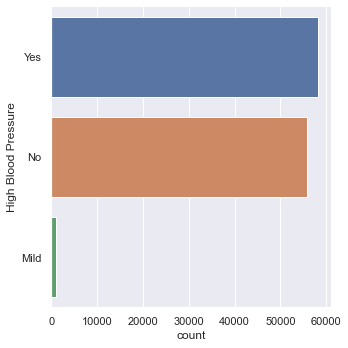

In [17]:
#Plotting for High Bloog Pressure
filtered_Data.groupby('High Blood Pressure').size()
sb.catplot(y = "High Blood Pressure", data = filtered_Data, kind = "count")
plt.show()

#Replacing 2 with 1 
filtered_Data['High Blood Pressure'] = filtered_Data['High Blood Pressure'].replace({2:1})

#Dropping unnecessary values 
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['High Blood Pressure']>4].index)
filtered_Data.reset_index(inplace = True, drop = True)

#Changing High Blood PRessure to categorical data 
filtered_Data['High Blood Pressure'] = pd.Categorical(filtered_Data['High Blood Pressure'], categories=[1, 3, 4], ordered=True)
filtered_Data['High Blood Pressure'] = filtered_Data['High Blood Pressure'].cat.rename_categories({1: 'Yes', 3: 'No', 4: 'Mild'})

print("Filtered Plot")
sb.catplot(y = "High Blood Pressure", data = filtered_Data, kind = "count")
plt.show()

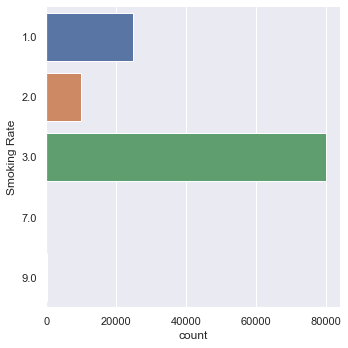

Filtered Plot


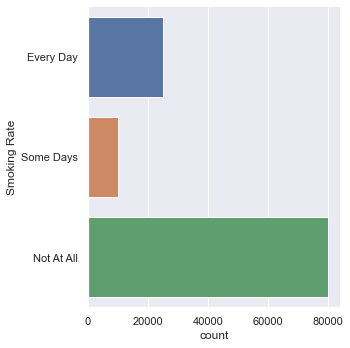

In [18]:
#Plotting for smoking rate 
filtered_Data.groupby('Smoking Rate').size()
sb.catplot(y = "Smoking Rate", data = filtered_Data, kind = "count")
plt.show()

#Dropping unnecessary data 
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['Smoking Rate']>3].index)
filtered_Data.reset_index(inplace = True, drop = True)

#Changing SMoking Rate to categorical data 
filtered_Data['Smoking Rate'] = pd.Categorical(filtered_Data['Smoking Rate'], categories=[1, 2, 3], ordered=True)
filtered_Data['Smoking Rate'] = filtered_Data['Smoking Rate'].cat.rename_categories({1: 'Every Day', 2: 'Some Days', 3: 'Not At All'})

print("Filtered Plot")
sb.catplot(y = "Smoking Rate", data = filtered_Data, kind = "count")
plt.show()

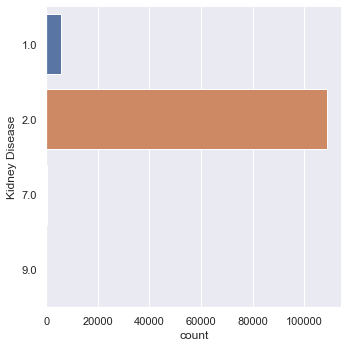

Filtered Plot


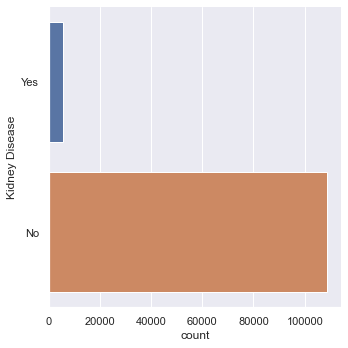

In [19]:
#Plotting Kidney Disease 
filtered_Data.groupby('Kidney Disease').size()
sb.catplot(y = "Kidney Disease", data = filtered_Data, kind = "count")
plt.show()

#Dropping unnecessary data 
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['Kidney Disease']>3].index)
filtered_Data.reset_index(inplace = True, drop = True)

#Changing KIdney Disease to categorical data 
filtered_Data['Kidney Disease'] = pd.Categorical(filtered_Data['Kidney Disease'], categories=[1, 2], ordered=True)
filtered_Data['Kidney Disease'] = filtered_Data['Kidney Disease'].cat.rename_categories({1: 'Yes', 2: 'No'})


print("Filtered Plot")
sb.catplot(y = "Kidney Disease", data = filtered_Data, kind = "count")
plt.show()

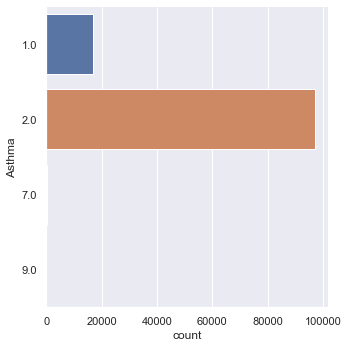

Filtered Plot


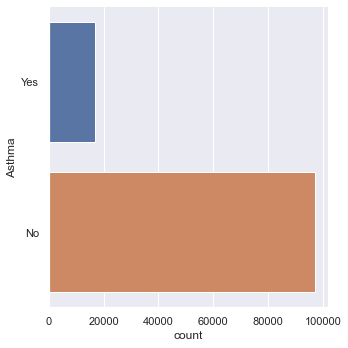

In [20]:
#Plotting for Asthma 
filtered_Data.groupby('Asthma').size()
sb.catplot(y = "Asthma", data = filtered_Data, kind = "count")
plt.show()

#Dropping unnecessary data 
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['Asthma']>3].index)
filtered_Data.reset_index(inplace = True, drop = True)

#Changing Asthma to categorical data 
filtered_Data['Asthma'] = pd.Categorical(filtered_Data['Asthma'], categories=[1, 2], ordered=True)
filtered_Data['Asthma'] = filtered_Data['Asthma'].cat.rename_categories({1: 'Yes', 2: 'No'})

print("Filtered Plot")
sb.catplot(y = "Asthma", data = filtered_Data, kind = "count")
plt.show()

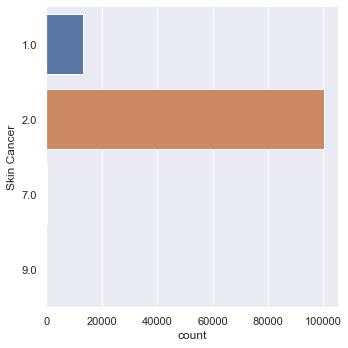

Filtered Plot


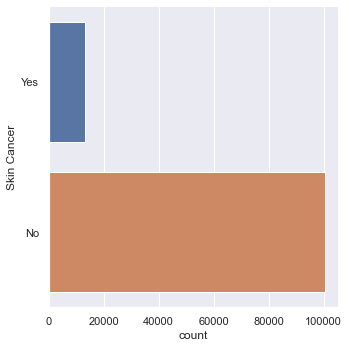

In [21]:
#Plotting for Skin Cancer
filtered_Data.groupby('Skin Cancer').size()
sb.catplot(y = "Skin Cancer", data = filtered_Data, kind = "count")
plt.show()

#Dropping unnecessary data 
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['Skin Cancer']>3].index)
filtered_Data.reset_index(inplace = True, drop = True)

#Changing Asthma to categorical data 
filtered_Data['Skin Cancer'] = pd.Categorical(filtered_Data['Skin Cancer'], categories=[1, 2], ordered=True)
filtered_Data['Skin Cancer'] = filtered_Data['Skin Cancer'].cat.rename_categories({1: 'Yes', 2: 'No'})

print("Filtered Plot")
sb.catplot(y = "Skin Cancer", data = filtered_Data, kind = "count")
plt.show()

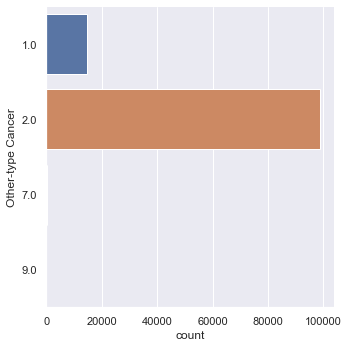

Filtered Plot


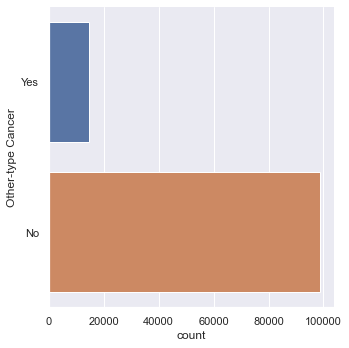

In [22]:
#Plotting for Skin Cancer
filtered_Data.groupby('Other-type Cancer').size()
sb.catplot(y = "Other-type Cancer", data = filtered_Data, kind = "count")
plt.show()

#Dropping unnecessary data 
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['Other-type Cancer']>3].index)
filtered_Data.reset_index(inplace = True, drop = True)

#Changing Asthma to categorical data 
filtered_Data['Other-type Cancer'] = pd.Categorical(filtered_Data['Other-type Cancer'], categories=[1, 2], ordered=True)
filtered_Data['Other-type Cancer'] = filtered_Data['Other-type Cancer'].cat.rename_categories({1: 'Yes', 2: 'No'})

print("Filtered Plot")
sb.catplot(y = "Other-type Cancer", data = filtered_Data, kind = "count")
plt.show()


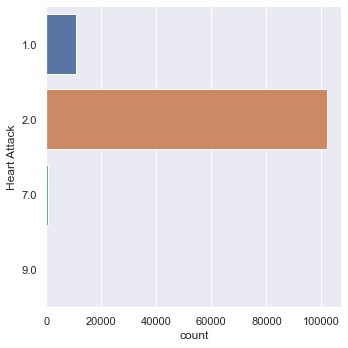

Filtered Plot


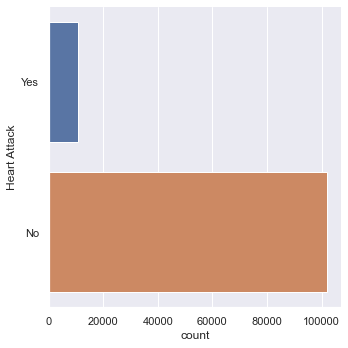

In [23]:
#Plotting for Heart Attack 
filtered_Data.groupby('Heart Attack').size()
sb.catplot(y = "Heart Attack", data = filtered_Data, kind = "count")
plt.show()

#Dropping unnecessary data 
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['Heart Attack']>3].index)
filtered_Data.reset_index(inplace = True, drop = True)

#Changing Heart Attack to categorical data 
filtered_Data['Heart Attack'] = pd.Categorical(filtered_Data['Heart Attack'], categories=[1, 2], ordered=True)
filtered_Data['Heart Attack'] = filtered_Data['Heart Attack'].cat.rename_categories({1: 'Yes', 2: 'No'})

print("Filtered Plot")
sb.catplot(y = "Heart Attack", data = filtered_Data, kind = "count")
plt.show()

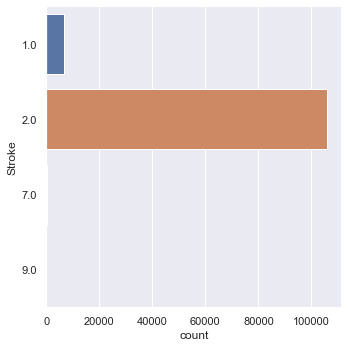

Filtered Plot


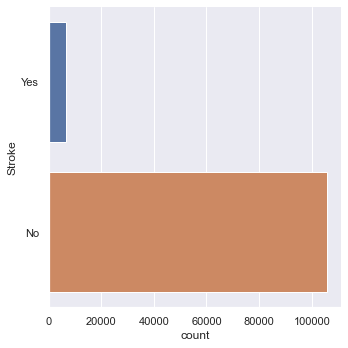

In [24]:
#PLotting of Stroke 
filtered_Data.groupby('Stroke').size()
sb.catplot(y = "Stroke", data = filtered_Data, kind = "count")
plt.show()

#Dropping unnecessary data 
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['Stroke']>3].index)
filtered_Data.reset_index(inplace = True, drop = True)

#Changing Stroke to categorical data 
filtered_Data['Stroke'] = pd.Categorical(filtered_Data['Stroke'], categories=[1, 2], ordered=True)
filtered_Data['Stroke'] = filtered_Data['Stroke'].cat.rename_categories({1: 'Yes', 2: 'No'})

print("Filtered Plot")
sb.catplot(y = "Stroke", data = filtered_Data, kind = "count")
plt.show()

Filtered Plot


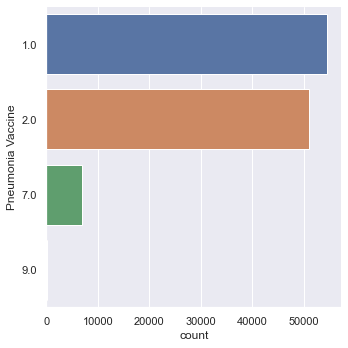

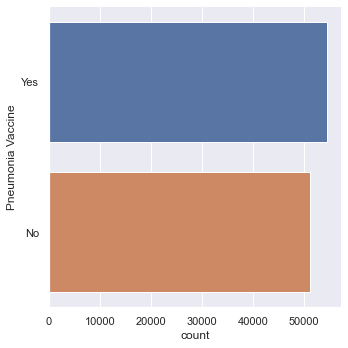

In [25]:
#Plotting for Pneumonia Vaccine
filtered_Data.groupby('Pneumonia Vaccine').size()
sb.catplot(y = "Pneumonia Vaccine", data = filtered_Data, kind = "count")

#Dropping unnecessary Data
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['Pneumonia Vaccine'] > 2].index)
filtered_Data.reset_index(inplace = True, drop = True)

#changing Data from numerical to categorical
filtered_Data['Pneumonia Vaccine'] = pd.Categorical(filtered_Data['Pneumonia Vaccine'], categories=[1, 2], ordered=True)
filtered_Data['Pneumonia Vaccine'] = filtered_Data['Pneumonia Vaccine'].cat.rename_categories({1: 'Yes', 2: 'No'})

print("Filtered Plot")
sb.catplot(y = "Pneumonia Vaccine", data = filtered_Data, kind = "count")
plt.show()

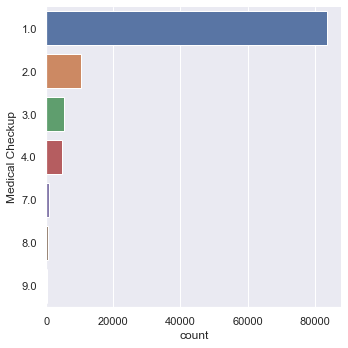

Filtered Plot


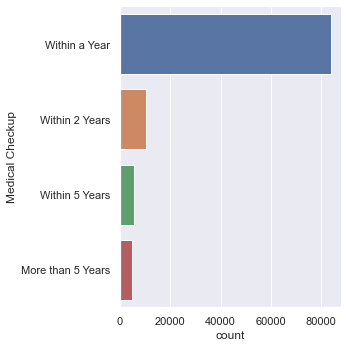

In [26]:
#Plotting for Medical Checkup
filtered_Data.groupby('Medical Checkup').size()
sb.catplot(y = "Medical Checkup", data = filtered_Data, kind = "count")
plt.show()

#Dropping unnecessary Data
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['Medical Checkup'] > 5].index)
filtered_Data.reset_index(inplace = True, drop = True)

#Changing MEdical Checkup from numerical to categorical 
filtered_Data['Medical Checkup'] = pd.Categorical(filtered_Data['Medical Checkup'], categories=[1, 2, 3, 4], ordered=True)
filtered_Data['Medical Checkup'] = filtered_Data['Medical Checkup'].cat.rename_categories({1: 'Within a Year', 2: 'Within 2 Years', 3: 'Within 5 Years', 4: 'More than 5 Years'})


print("Filtered Plot")
sb.catplot(y = "Medical Checkup", data = filtered_Data, kind = "count")
plt.show()


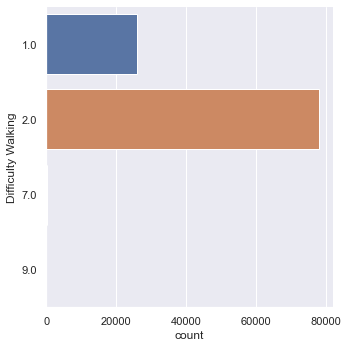

Filtered Plot


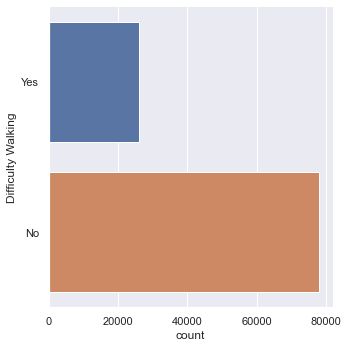

In [27]:
#Plotting for Difficulty Walking
filtered_Data.groupby('Difficulty Walking').size()
sb.catplot(y = "Difficulty Walking", data = filtered_Data, kind = "count")
plt.show()

#Dropping Unnecessary Data 
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['Difficulty Walking'] > 2].index)
filtered_Data.reset_index(inplace = True, drop = True)

#Changing Difficulty Walking from numerical to categorical data
filtered_Data['Difficulty Walking'] = pd.Categorical(filtered_Data['Difficulty Walking'], categories=[1, 2], ordered=True)
filtered_Data['Difficulty Walking'] = filtered_Data['Difficulty Walking'].cat.rename_categories({1: 'Yes', 2: 'No'})


print("Filtered Plot")
sb.catplot(y = "Difficulty Walking", data = filtered_Data, kind = "count")
plt.show()

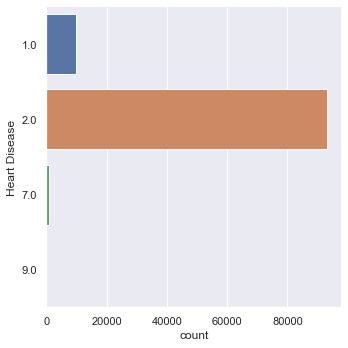

Filtered Plot


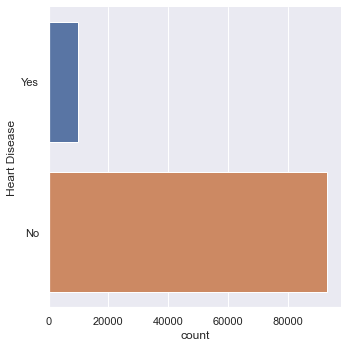

In [28]:
#Plotting for Heart Disease
filtered_Data.groupby('Heart Disease').size()
sb.catplot(y = "Heart Disease", data = filtered_Data, kind = "count")
plt.show()

#Dropping Unnecessary Data 
filtered_Data = filtered_Data.drop(index=filtered_Data[filtered_Data['Heart Disease']>2].index)
filtered_Data.reset_index(inplace = True, drop = True)

#Changing Heart Disease from numerical to categorical data 
filtered_Data['Heart Disease'] = pd.Categorical(filtered_Data['Heart Disease'], categories=[1, 2], ordered=True)
filtered_Data['Heart Disease'] = filtered_Data['Heart Disease'].cat.rename_categories({1: 'Yes', 2: 'No'})

print("Filtered Plot")
sb.catplot(y = "Heart Disease", data = filtered_Data, kind = "count")
plt.show()

Filtered Plot


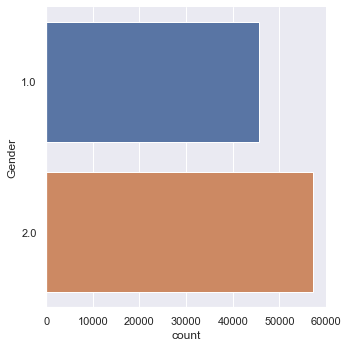

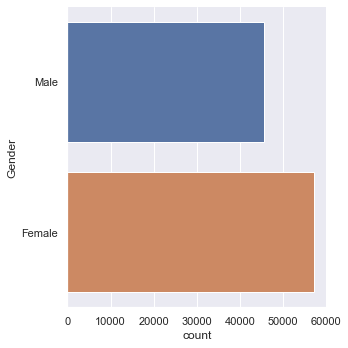

In [29]:
#Plotting for Gender 
filtered_Data.groupby('Gender').size()
sb.catplot(y = "Gender", data = filtered_Data, kind = "count")

#Changing Gender from numerical to categorical data 
filtered_Data['Gender'] = pd.Categorical(filtered_Data['Gender'], categories=[1, 2], ordered=True)
filtered_Data['Gender'] = filtered_Data['Gender'].cat.rename_categories({1: 'Male', 2: 'Female'})

print("Filtered Plot")
sb.catplot(y = "Gender", data = filtered_Data, kind = "count")
plt.show()

**Data preparation is now done and 5 examples are shown below**

In [30]:
#Showing the Data set after data cleaning and prep is done 
print("The current data size ",filtered_Data.shape)
filtered_Data.head()

The current data size  (102931, 21)


,Physical Health,Alcohol Consumption,General Health,Exercise Rate,Age,High Cholestrol,Gender,High Blood Pressure,Smoking Rate,Heart Disease,...,Kidney Disease,Asthma,Skin Cancer,Other-type Cancer,Heart Attack,Stroke,Medical Checkup,Pneumonia Vaccine,Difficulty Walking,Race
0,0.0,0.0,Good,Yes,18.0,No,Male,No,Some Days,No,...,No,No,No,No,No,No,Within a Year,No,No,White
1,0.0,4.0,Excellent,No,18.0,No,Female,No,Every Day,No,...,No,No,No,No,No,No,Within 5 Years,Yes,No,White
2,0.0,0.0,Very Good,Yes,18.0,No,Male,No,Every Day,No,...,No,No,No,No,No,No,Within 2 Years,No,No,White
3,0.0,5.0,Very Good,Yes,18.0,No,Female,Yes,Every Day,No,...,No,No,No,No,No,No,Within a Year,Yes,No,White
4,1.0,0.0,Very Good,Yes,18.0,No,Male,No,Some Days,No,...,No,Yes,No,No,No,No,Within a Year,Yes,Yes,White


In [31]:
filtered_Data.isnull().sum()

Physical Health         0
Alcohol Consumption     0
General Health          0
Exercise Rate           0
Age                     0
High Cholestrol        58
Gender                  0
High Blood Pressure     0
Smoking Rate            0
Heart Disease           0
Mental Health           0
Kidney Disease          0
Asthma                  0
Skin Cancer             0
Other-type Cancer       0
Heart Attack            0
Stroke                  0
Medical Checkup         0
Pneumonia Vaccine       0
Difficulty Walking      0
Race                    0
dtype: int64

In [32]:
#Dropping rows with null value
filtered_Data.dropna(inplace = True)
print(filtered_Data.shape)

(102873, 21)


## Exploratory Data Analytics

Here we will split the data into  numerical and categorical.

In [33]:
#Splitting data to numerical and categorical for respective EDA
numerical_Data = ['Age','Physical Health','Alcohol Consumption', 'Mental Health']
categorical_Data = ['Heart Disease','General Health','Exercise Rate','High Cholestrol','Gender','High Blood Pressure','Smoking Rate', 'Kidney Disease', 'Asthma', 'Skin Cancer', 'Other-type Cancer', 'Heart Attack', 'Stroke', 'Medical Checkup','Pneumonia Vaccine','Difficulty Walking', 'Race']

We will display the unique values of each variable to give ourselves a better understanding

In [34]:
# diplaying the unique values for each categorical value
print("Unique values for each categorical variable")
for variable in categorical_Data:
  print(f"{variable.ljust(20)} : {', '.join(sorted([str(x) for x in filtered_Data[variable].unique()]))}")

Unique values for each categorical variable
Heart Disease        : No, Yes
General Health       : Excellent, Fair, Good, Poor, Very Good
Exercise Rate        : No, Yes
High Cholestrol      : No, Yes
Gender               : Female, Male
High Blood Pressure  : Mild, No, Yes
Smoking Rate         : Every Day, Not At All, Some Days
Kidney Disease       : No, Yes
Asthma               : No, Yes
Skin Cancer          : No, Yes
Other-type Cancer    : No, Yes
Heart Attack         : No, Yes
Stroke               : No, Yes
Medical Checkup      : More than 5 Years, Within 2 Years, Within 5 Years, Within a Year
Pneumonia Vaccine    : No, Yes
Difficulty Walking   : No, Yes
Race                 : African American, Asian, Native American, Others, Pacific Islander, White


## Numerical Data

In [35]:
#Showing the data statistics of weather conditions and speed_limit
# slicing out the numeric columns and the response variable
numeric = filtered_Data[numerical_Data + ["Heart Disease"] ]

# summary statistics
numeric[numerical_Data].describe()


,Age,Physical Health,Alcohol Consumption,Mental Health
count,102873.000000,102873.000000,102873.000000,102873.000000
mean,60.507976,5.843846,4.433972,4.027694
std,13.835682,10.164829,8.535753,8.507365
min,18.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,0.000000,0.000000
50%,62.000000,0.000000,0.000000,0.000000
75%,71.000000,6.000000,4.000000,3.000000
max,80.000000,30.000000,30.000000,30.000000


In [36]:
# Evaluating skew
print("Variable\t Skew")
numeric.skew(numeric_only = True)

Variable	 Skew


Age                   -0.641095
Physical Health        1.639699
Alcohol Consumption    2.147849
Mental Health          2.255322
dtype: float64

Skewness of the variables are fairly high so the appropriate methods to make the distribution more normal has to be implemented.

                          Age  Physical Health  Alcohol Consumption  \
Age                  1.000000         0.043465             0.014794   
Physical Health      0.043465         1.000000            -0.113700   
Alcohol Consumption  0.014794        -0.113700             1.000000   
Mental Health       -0.156615         0.360427            -0.055745   
Yes                  0.172243         0.158777            -0.044751   
No                  -0.172243        -0.158777             0.044751   

                     Mental Health       Yes        No  
Age                      -0.156615  0.172243 -0.172243  
Physical Health           0.360427  0.158777 -0.158777  
Alcohol Consumption      -0.055745 -0.044751  0.044751  
Mental Health             1.000000  0.043310 -0.043310  
Yes                       0.043310  1.000000 -1.000000  
No                       -0.043310 -1.000000  1.000000  


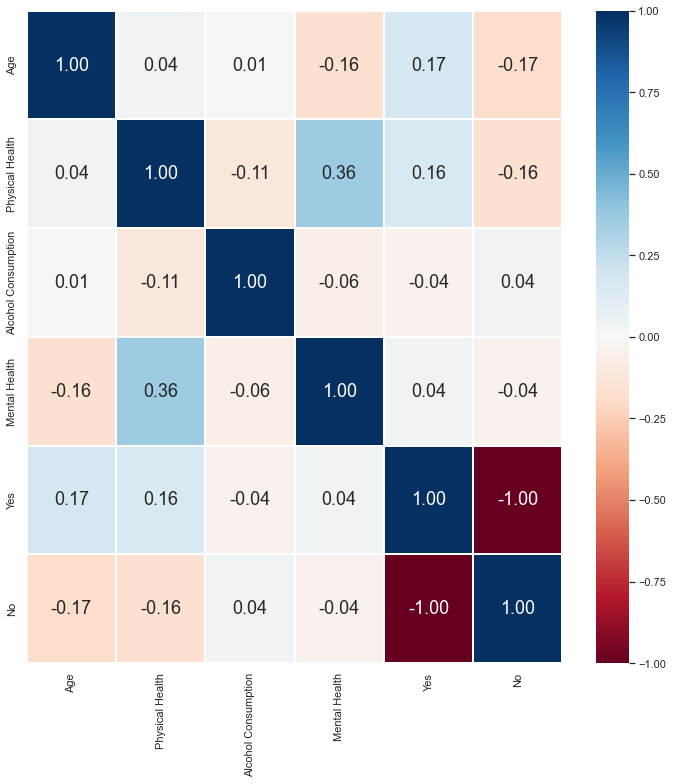

In [37]:
# Perform one-hot encoding on categorical data
heart_Disease_Onehot = pd.get_dummies(filtered_Data['Heart Disease'])

# Combine numerical and encoded categorical data
filtered_Data_Encoded = pd.concat([filtered_Data[numerical_Data], heart_Disease_Onehot], axis=1)

print(filtered_Data_Encoded.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))

sb.heatmap(filtered_Data_Encoded.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")
plt.show()
#write  about our findings, and correlation 

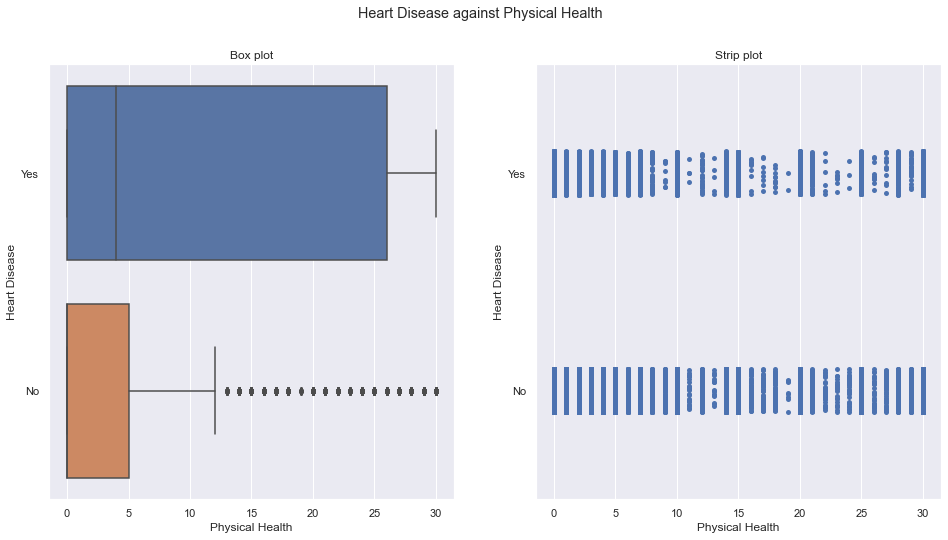

In [38]:
# set up figure
figure, axes = plt.subplots(1, 2, figsize = (16, 8))
figure.suptitle("Heart Disease against Physical Health")
axes[0].set_title("Box plot")
axes[1].set_title("Strip plot")

# box plot data visualization
sb.boxplot(data = filtered_Data, x = "Physical Health", y = "Heart Disease", ax = axes[0], showfliers = True)

# strip plot data visualization
sb.stripplot(data = filtered_Data, x = "Physical Health", y = "Heart Disease", ax = axes[1])

plt.show()

Looking at the general trend of the blox plot, it shows that the higher the number for physical health, which is the number of
days where the individual's health was not good, correlates to having heart disease. On the contrary those who did not have 
heart disease seemed to have lesser number of days in which they were feeling unwell.

The iregularities seen on the strip plot could be due to the skewness on the variable

Unique values of physical health: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30


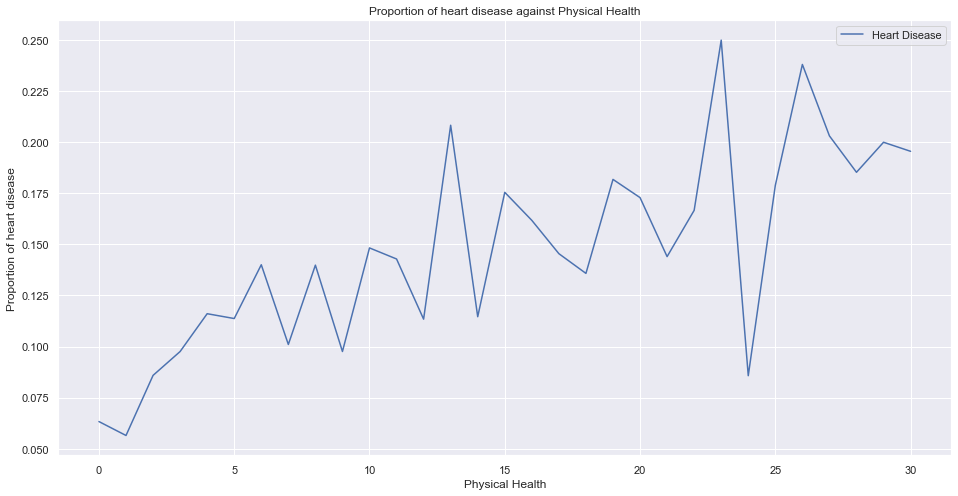

In [39]:
# figure set up
figure, axes = plt.subplots(figsize = (16, 8))
axes.set_title("Proportion of heart disease against Physical Health")
axes.set_ylabel("Proportion of heart disease")

# levels of speed limit
levels = sorted(list(numeric["Physical Health"].unique().astype(int)))
print(f"Unique values of physical health: {', '.join([str(x) for x in levels])}")

# proportion of people within each speed limit
#low_Accident = numeric_data.loc[numeric_data["Accident_Severity"] == "Low", ["Speed_limit", "Accident_Severity"]].groupby("Speed_limit").count()
yes_Heart_Disease = numeric.loc[numeric["Heart Disease"] == "Yes", ["Physical Health", "Heart Disease"]].groupby("Physical Health").count()
no_Heart_Disease = numeric.loc[numeric["Heart Disease"] == "No", ["Physical Health", "Heart Disease"]].groupby("Physical Health").count()


proportion_1 = yes_Heart_Disease / (yes_Heart_Disease + no_Heart_Disease)
sb.lineplot(data = proportion_1)

plt.show()

This graph shows the proportion of individuals that had heart disease compared to the number of days where their health was not good. One interesting point was that at **physical health** = 24, there was a sharp decline in proportion before climing back up again.

From the trend, from **Physical health** = 1 to 6 there is an increase in proportion. However after that there are fluctuations with physical health = 24 being the highest. Even with the fluctuations, the general trend seems to show a increase in proportion as **physical health** increases.

#### AGE

<AxesSubplot:title={'center':'Box plot'}, xlabel='Age', ylabel='Heart Disease'>

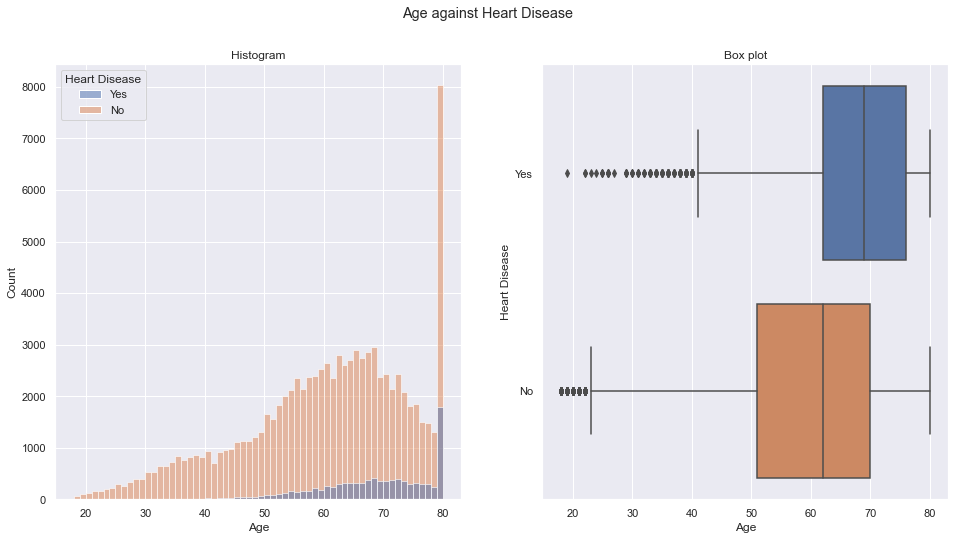

In [40]:
# figure set up
figure, axes = plt.subplots(1, 2, figsize = (16, 8))
figure.suptitle("Age against Heart Disease")
axes[0].set_title("Histogram")
axes[1].set_title("Box plot")

# set up histogram plot
sb.histplot(data = numeric, x = 'Age', hue = "Heart Disease", binwidth = 1, ax = axes[0])

# set up boxplot
sb.boxplot(data = numeric, x = "Age", y = "Heart Disease", ax = axes[1])

Histogram and box plots shows a trend of a higher age having a higher number of individuals with heart disease.

This shows, that people with an older age are more likely to have heart disease compared to younger ones

Unique values of Age: 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80


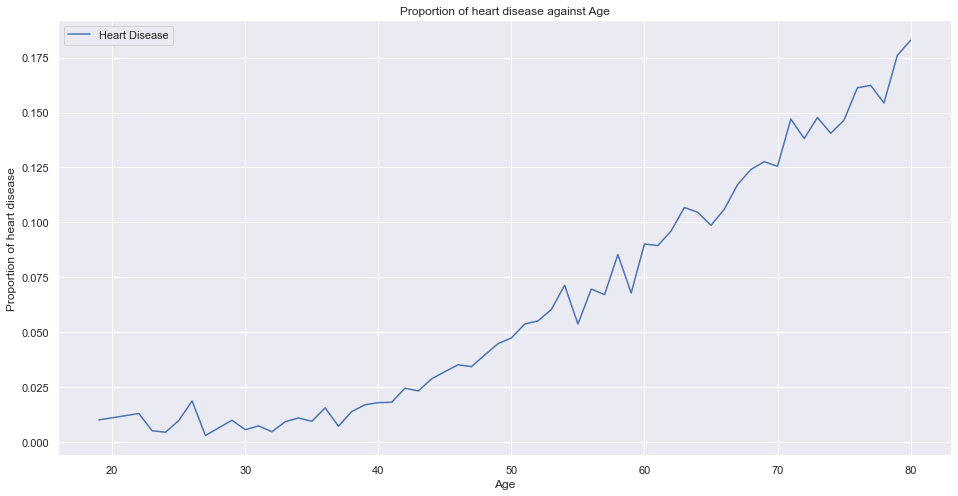

In [41]:
# figure set up
figure, axes = plt.subplots(figsize = (16, 8))
axes.set_title("Proportion of heart disease against Age")
axes.set_ylabel("Proportion of heart disease")

# levels of speed limit
levels = sorted(list(numeric["Age"].unique().astype(int)))
print(f"Unique values of Age: {', '.join([str(x) for x in levels])}")

# proportion of people within each speed limit
#low_Accident = numeric_data.loc[numeric_data["Accident_Severity"] == "Low", ["Speed_limit", "Accident_Severity"]].groupby("Speed_limit").count()
yes_Heart_Disease = numeric.loc[numeric["Heart Disease"] == "Yes", ["Age", "Heart Disease"]].groupby("Age").count()
no_Heart_Disease = numeric.loc[numeric["Heart Disease"] == "No", ["Age", "Heart Disease"]].groupby("Age").count()


proportion_1 = yes_Heart_Disease / (yes_Heart_Disease + no_Heart_Disease)
sb.lineplot(data = proportion_1)

plt.show()

This graph shows the trend in a clearer perspective. As age **increases**, the **higher the proportion** of individuals that have heart disease with some minor fluctuations

### Alcohol Consumption

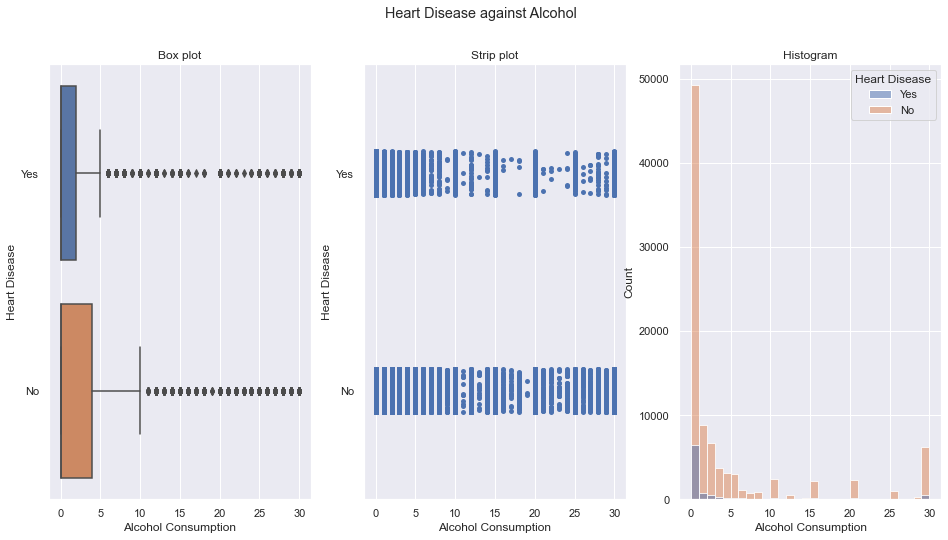

In [42]:
# set up figure
figure, axes = plt.subplots(1, 3, figsize = (16, 8))
figure.suptitle("Heart Disease against Alcohol")
axes[0].set_title("Box plot")
axes[1].set_title("Strip plot")
axes[2].set_title("Histogram")

# box plot data visualization
sb.boxplot(data = filtered_Data, x = "Alcohol Consumption", y = "Heart Disease", ax = axes[0], showfliers = True)

# strip plot data visualization
sb.stripplot(data = filtered_Data, x = "Alcohol Consumption", y = "Heart Disease", ax = axes[1])

# set up histogram plot
sb.histplot(data = numeric, x = 'Alcohol Consumption', hue = "Heart Disease", binwidth = 1, ax = axes[2])

plt.show()


Unique values of Alcohol: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30


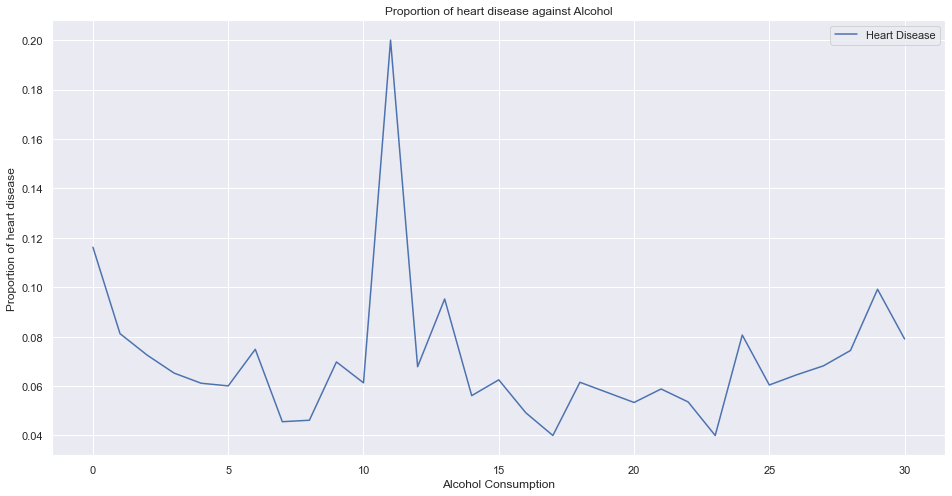

In [43]:
#Maybe this can be removed 

# figure set up
figure, axes = plt.subplots(figsize = (16, 8))
axes.set_title("Proportion of heart disease against Alcohol")
axes.set_ylabel("Proportion of heart disease")

# levels of speed limit
levels = sorted(list(numeric["Alcohol Consumption"].unique().astype(int)))
print(f"Unique values of Alcohol: {', '.join([str(x) for x in levels])}")

# proportion of people within each speed limit
#low_Accident = numeric_data.loc[numeric_data["Accident_Severity"] == "Low", ["Speed_limit", "Accident_Severity"]].groupby("Speed_limit").count()
yes_Heart_Disease = numeric.loc[numeric["Heart Disease"] == "Yes", ["Alcohol Consumption", "Heart Disease"]].groupby("Alcohol Consumption").count()
no_Heart_Disease = numeric.loc[numeric["Heart Disease"] == "No", ["Alcohol Consumption", "Heart Disease"]].groupby("Alcohol Consumption").count()


proportion_1 = yes_Heart_Disease / (yes_Heart_Disease + no_Heart_Disease)
sb.lineplot(data = proportion_1)

plt.show()

From Alcohol consumption = 0 to 5, there seemed to be a decrease in proportion of individuals with heart disease. After which there seems to be fluctuations.

This shows that alcohol consumption does not really have a relation to heart disease. Coupled with the high number of ouliers, we will not be using this variable for our machine learning model

### Mental Health

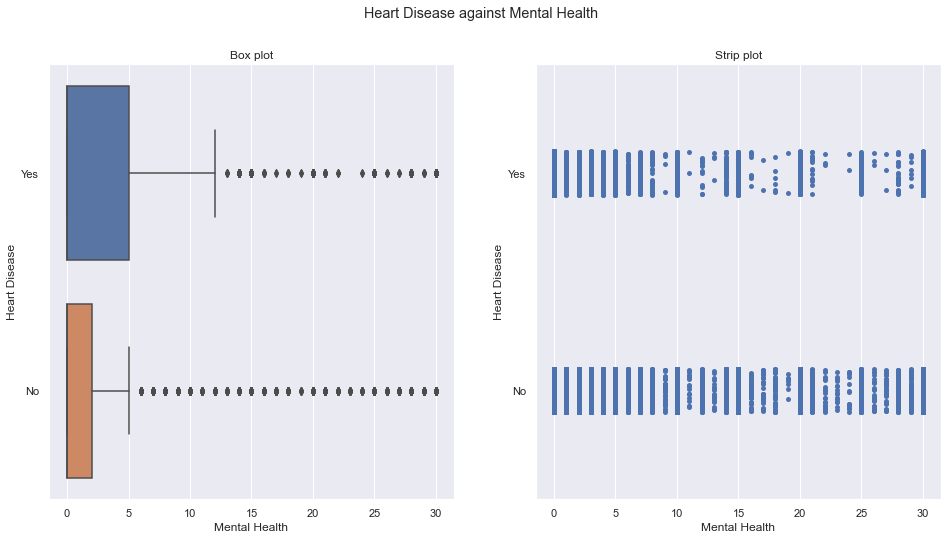

In [44]:
# set up figure
figure, axes = plt.subplots(1, 2, figsize = (16, 8))
figure.suptitle("Heart Disease against Mental Health")
axes[0].set_title("Box plot")
axes[1].set_title("Strip plot")

# box plot data visualization
sb.boxplot(data = filtered_Data, x = "Mental Health", y = "Heart Disease", ax = axes[0], showfliers = True)

# strip plot data visualization
sb.stripplot(data = filtered_Data, x = "Mental Health", y = "Heart Disease", ax = axes[1])

plt.show()

Unique values of mental health: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30


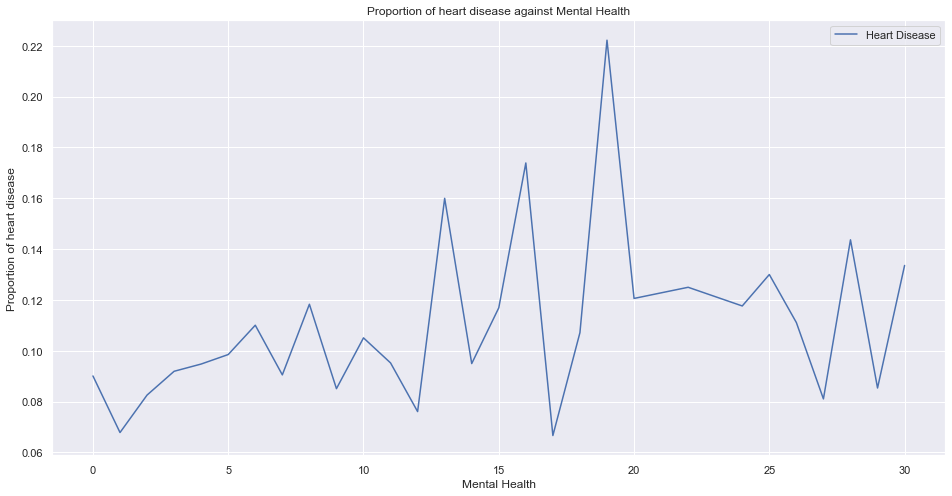

In [45]:
#Maybe this can be removed 

# figure set up
figure, axes = plt.subplots(figsize = (16, 8))
axes.set_title("Proportion of heart disease against Mental Health")
axes.set_ylabel("Proportion of heart disease")

# levels of speed limit
levels = sorted(list(numeric["Mental Health"].unique().astype(int)))
print(f"Unique values of mental health: {', '.join([str(x) for x in levels])}")

# proportion of people within each speed limit
#low_Accident = numeric_data.loc[numeric_data["Accident_Severity"] == "Low", ["Speed_limit", "Accident_Severity"]].groupby("Speed_limit").count()
yes_Heart_Disease = numeric.loc[numeric["Heart Disease"] == "Yes", ["Mental Health", "Heart Disease"]].groupby("Mental Health").count()
no_Heart_Disease = numeric.loc[numeric["Heart Disease"] == "No", ["Mental Health", "Heart Disease"]].groupby("Mental Health").count()


proportion_1 = yes_Heart_Disease / (yes_Heart_Disease + no_Heart_Disease)
sb.lineplot(data = proportion_1)

plt.show()

Mental health does not show a very compelling trend due to the many fluctuations shown in the graph. Coupled with this this variables has many outliers and hence we **will not be using** this variable in our **machine learning**

## Categorical Data

In [46]:
predictor_Categorical = ['General Health','Exercise Rate','High Cholestrol','Gender','High Blood Pressure','Smoking Rate', 'Kidney Disease', 'Asthma', 'Skin Cancer', 'Other-type Cancer','Heart Attack', 'Stroke', 'Medical Checkup', 'Pneumonia Vaccine', 'Difficulty Walking', 'Race']

Below we are showing the percentage of the dataset for each of the categorical variables with relation to hear disease to get a better visualisation with the data we are working with

In [47]:
#storing percentage for each unique value for a variable according to hearst disease 

predictors = {'Predictor':[], 'UniqueCategory':[], 'heart_Disease':[], 'UniqueValue':[], 'Percentage':[]} 
for var in predictor_Categorical: 
    # Extract rows according to heart disease variable 
    yes_Heart_Disease = filtered_Data[filtered_Data['Heart Disease'] ==  'Yes' ]
    no_Heart_Disease = filtered_Data[filtered_Data['Heart Disease'] == 'No'] 
     
    # Loop through each unique value and calculate the percentage 
    for unique in filtered_Data[var].unique():
        # Total number of rows for each unique value 
        total = len(filtered_Data[filtered_Data[var] == unique]) 
        if total == 0:
            continue
        predictors['Predictor'].append(var)
        predictors['Predictor'].append(var) 
        predictors['UniqueCategory'].append(unique) 
        predictors['UniqueCategory'].append(unique) 
         
        # Percentage of high severity vs low severity
                                
        yes_Heart_Disease_Predictor = round(len(yes_Heart_Disease[yes_Heart_Disease[var] == unique])/total*100, 2) 
        no_Heart_Disease_Predictor = round(len(no_Heart_Disease[no_Heart_Disease[var] == unique])/total*100, 2) 
        
        predictors['heart_Disease'].append('Yes') 
        predictors['UniqueValue'].append('(Yes) ' + unique) 
        predictors['Percentage'].append(yes_Heart_Disease_Predictor) 
        predictors['heart_Disease'].append('No') 
        predictors['UniqueValue'].append('(No) ' + unique) 
        predictors['Percentage'].append(no_Heart_Disease_Predictor)


Setting the percentage Dataframe

In [48]:
predictor_Dataframe = pd.DataFrame(predictors)
predictor_Dataframe.sort_values(by = ['Predictor', 'UniqueValue'], inplace = True)
predictor_Dataframe.reset_index(inplace =True, drop = True)

In [49]:
# Store the number of unique values for each predictor variable 
number_Unique_Dictionary = {} 
predictor_Categorical = sorted(predictor_Categorical) 
 
for var in predictor_Categorical: 
    number_Unique_Dictionary[var] = len(filtered_Data[var].unique())

In [50]:
predictor_Dataframe

,Predictor,UniqueCategory,heart_Disease,UniqueValue,Percentage
0,Asthma,No,No,(No) No,91.05
1,Asthma,Yes,No,(No) Yes,87.49
2,Asthma,No,Yes,(Yes) No,8.95
3,Asthma,Yes,Yes,(Yes) Yes,12.51
4,Difficulty Walking,No,No,(No) No,93.35
...,...,...,...,...,...
81,Smoking Rate,Some Days,Yes,(Yes) Some Days,7.62
82,Stroke,No,No,(No) No,91.67
83,Stroke,Yes,No,(No) Yes,72.46
84,Stroke,No,Yes,(Yes) No,8.33


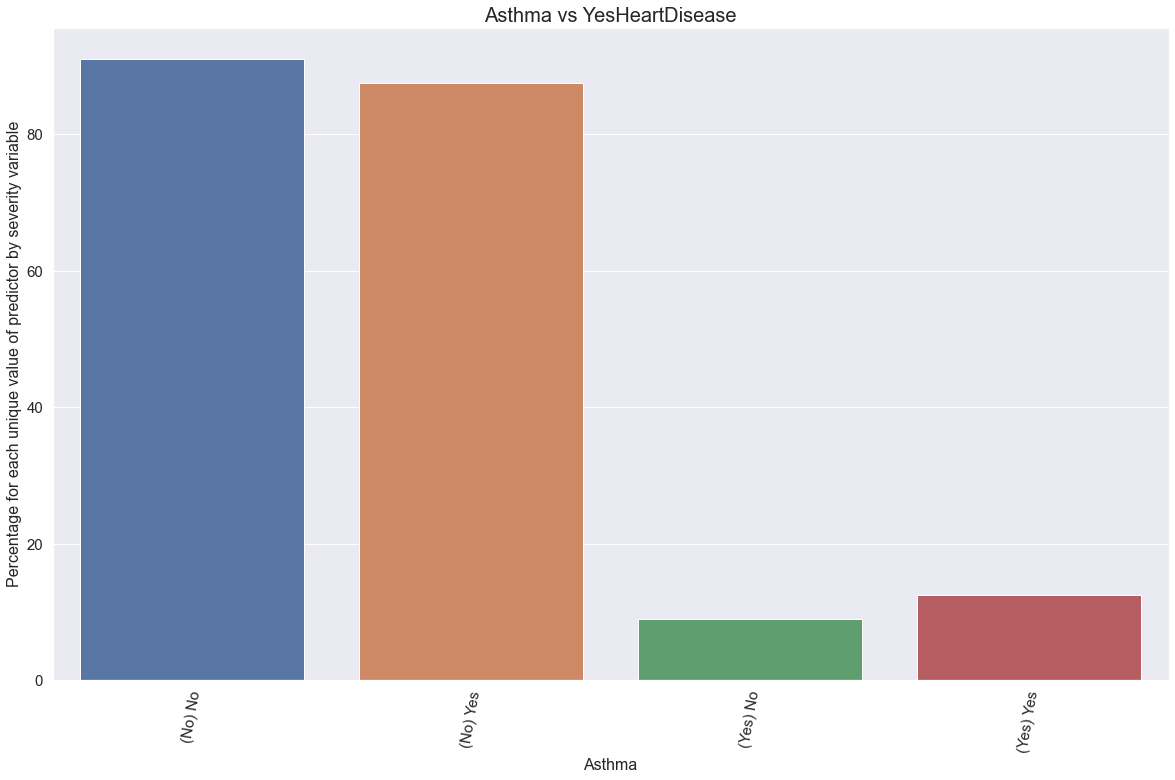

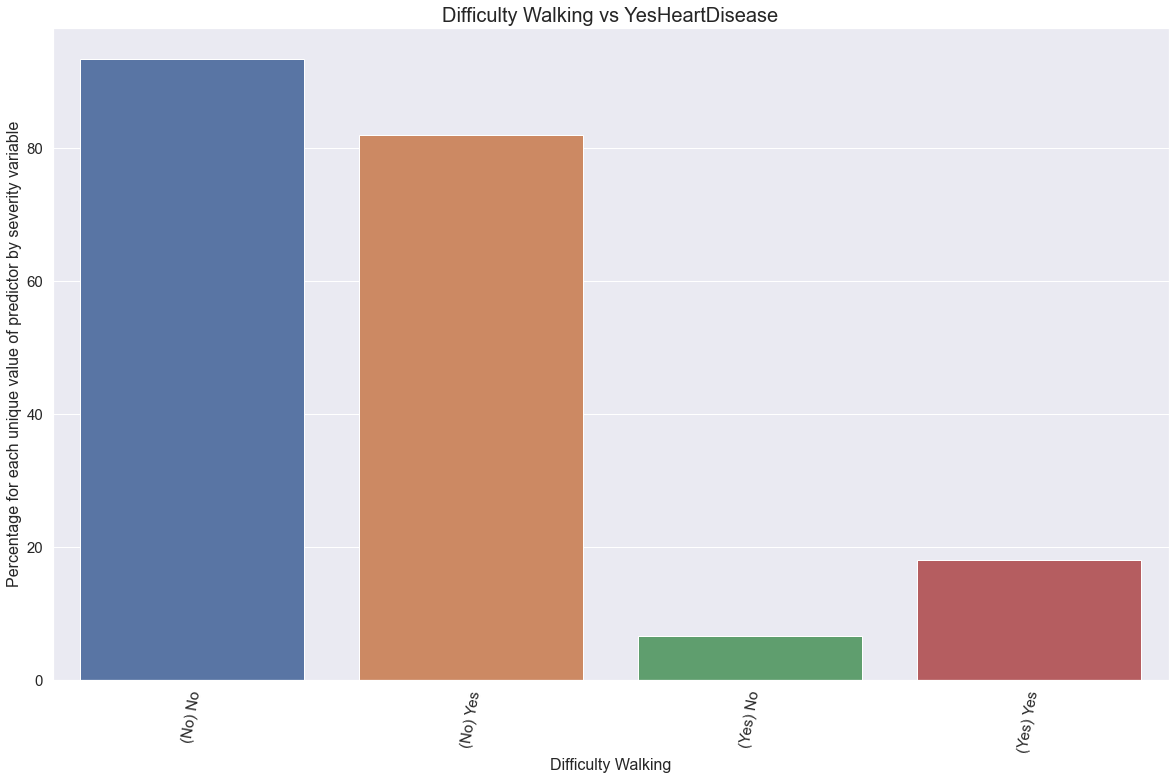

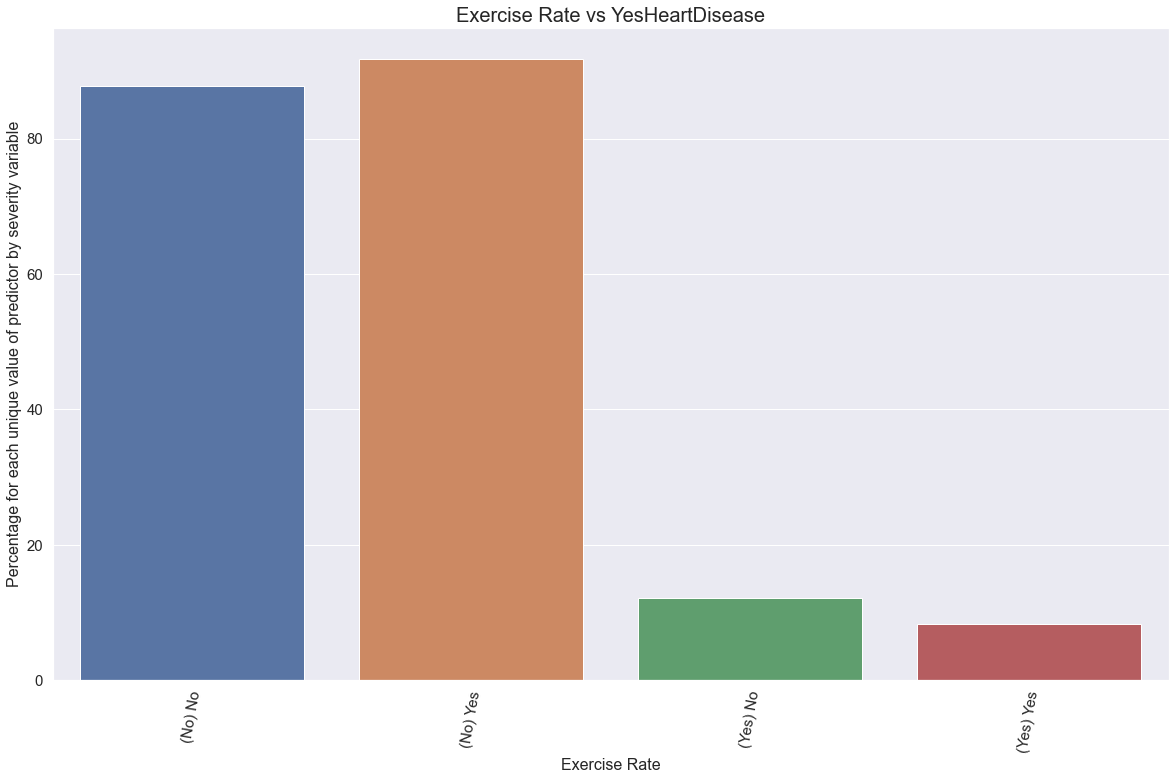

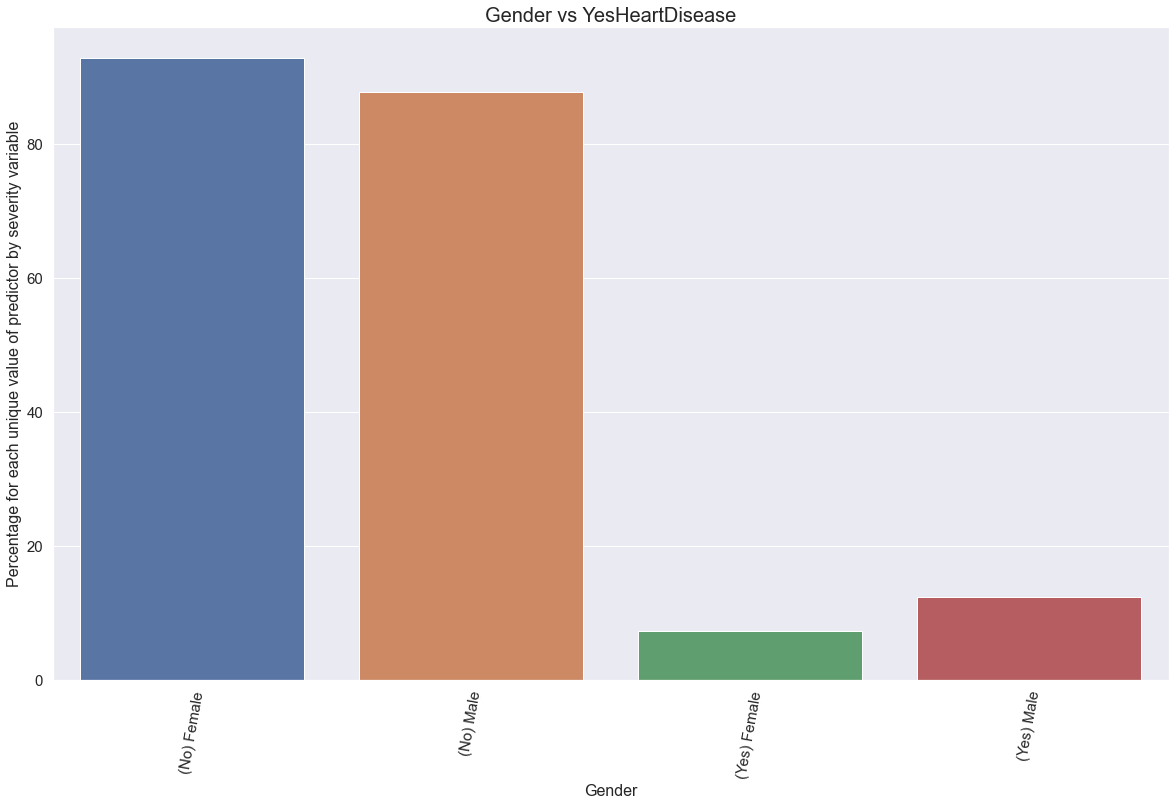

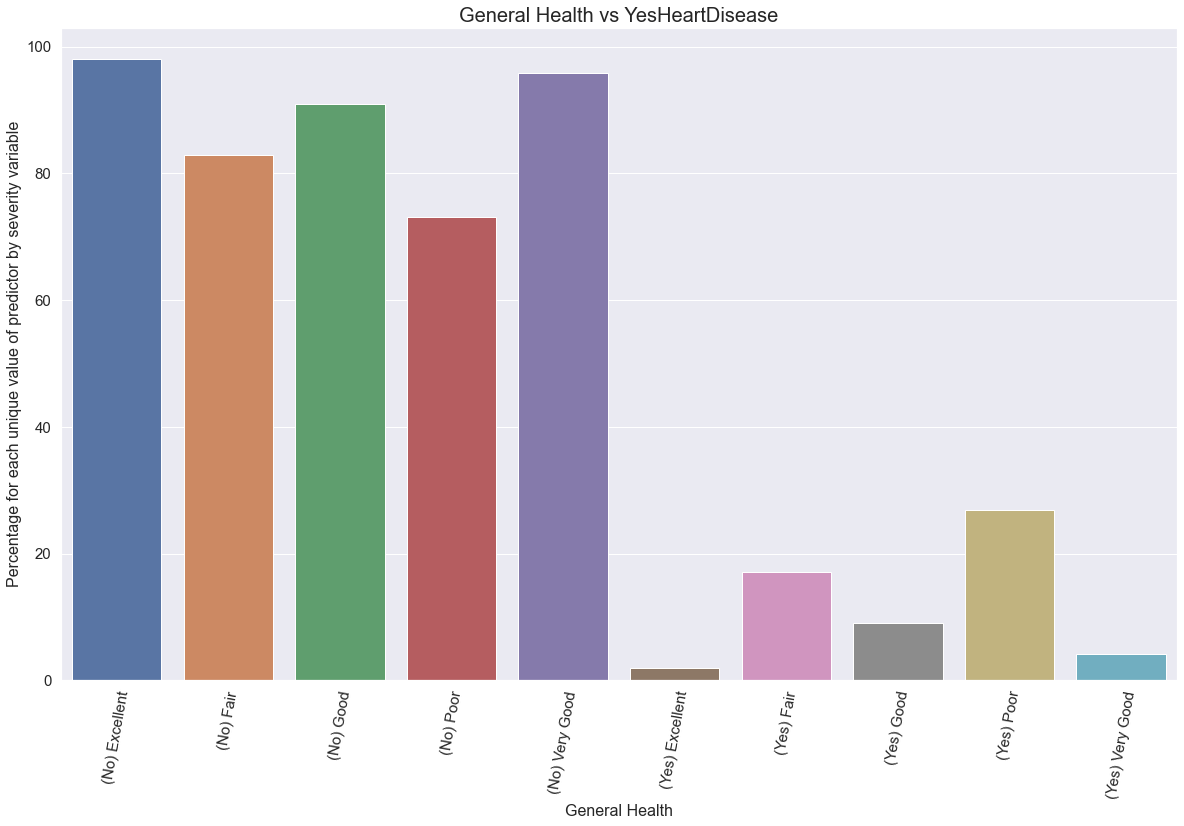

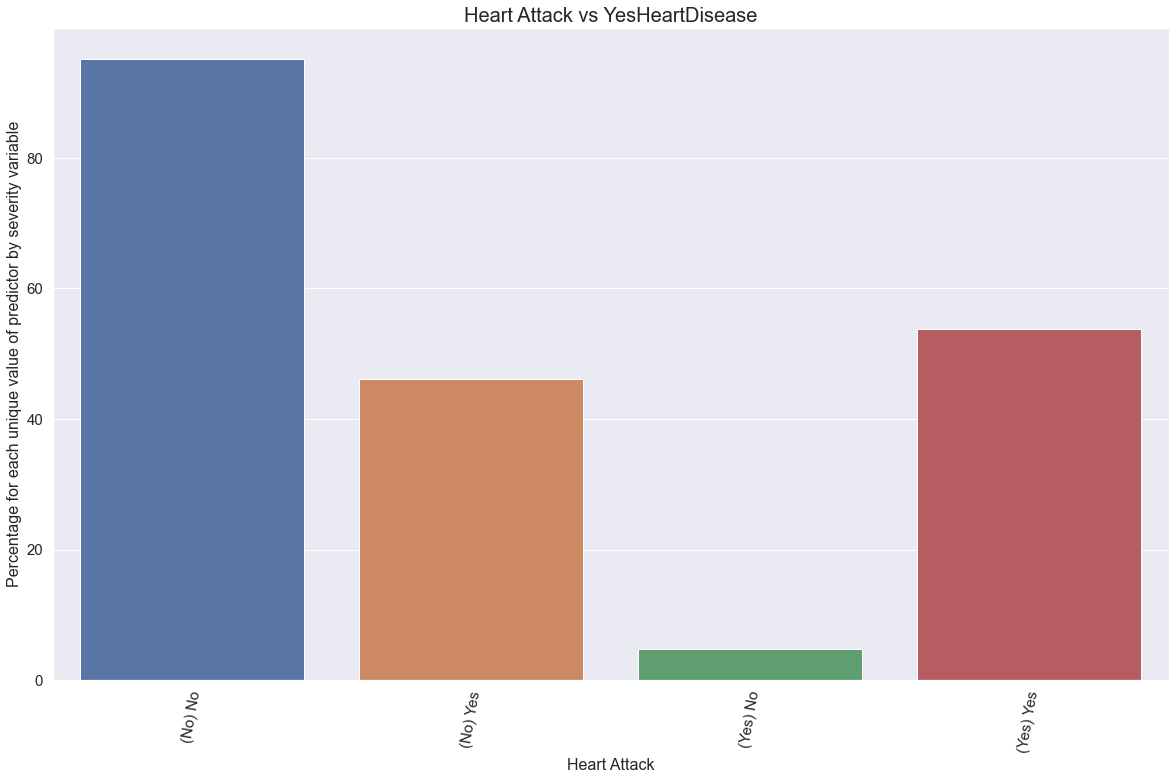

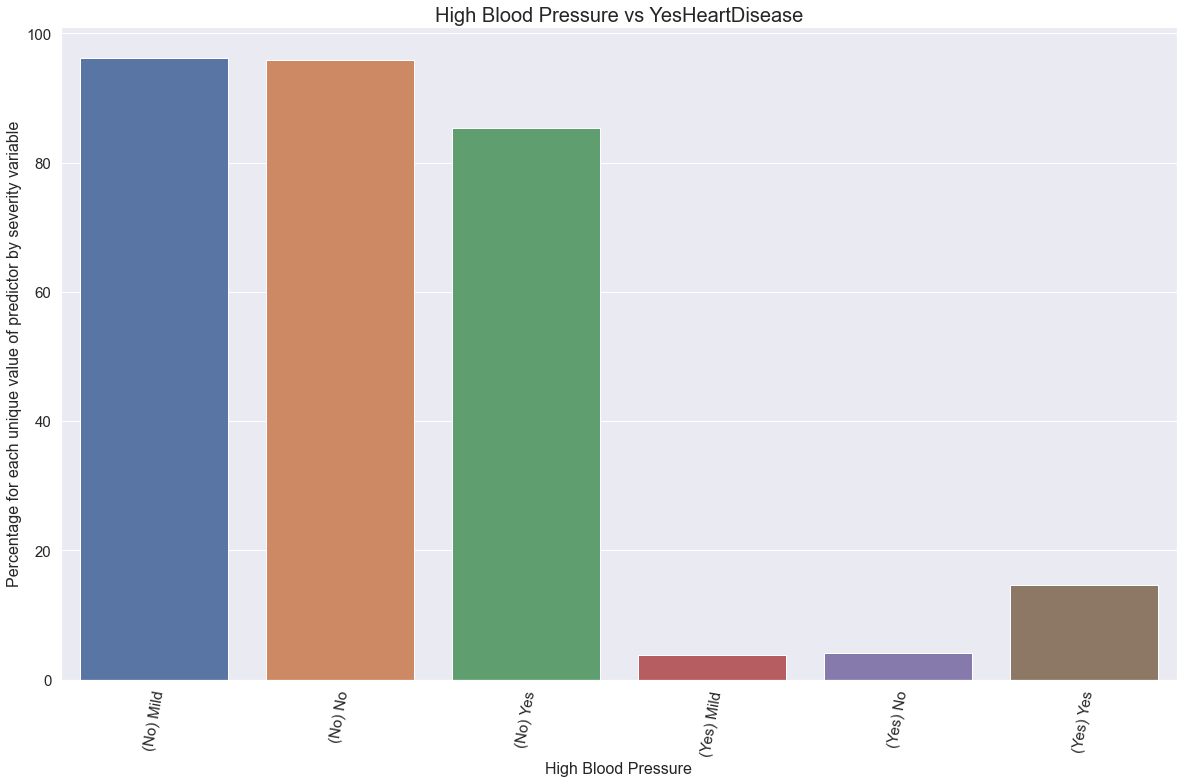

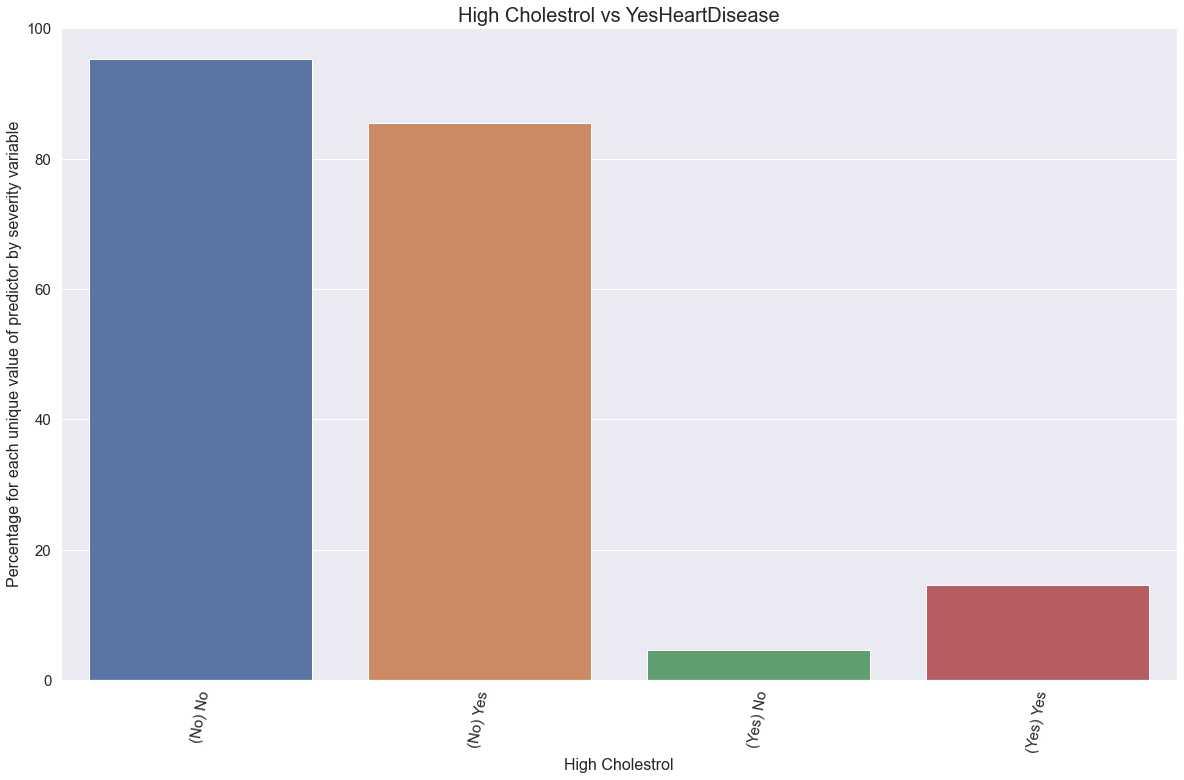

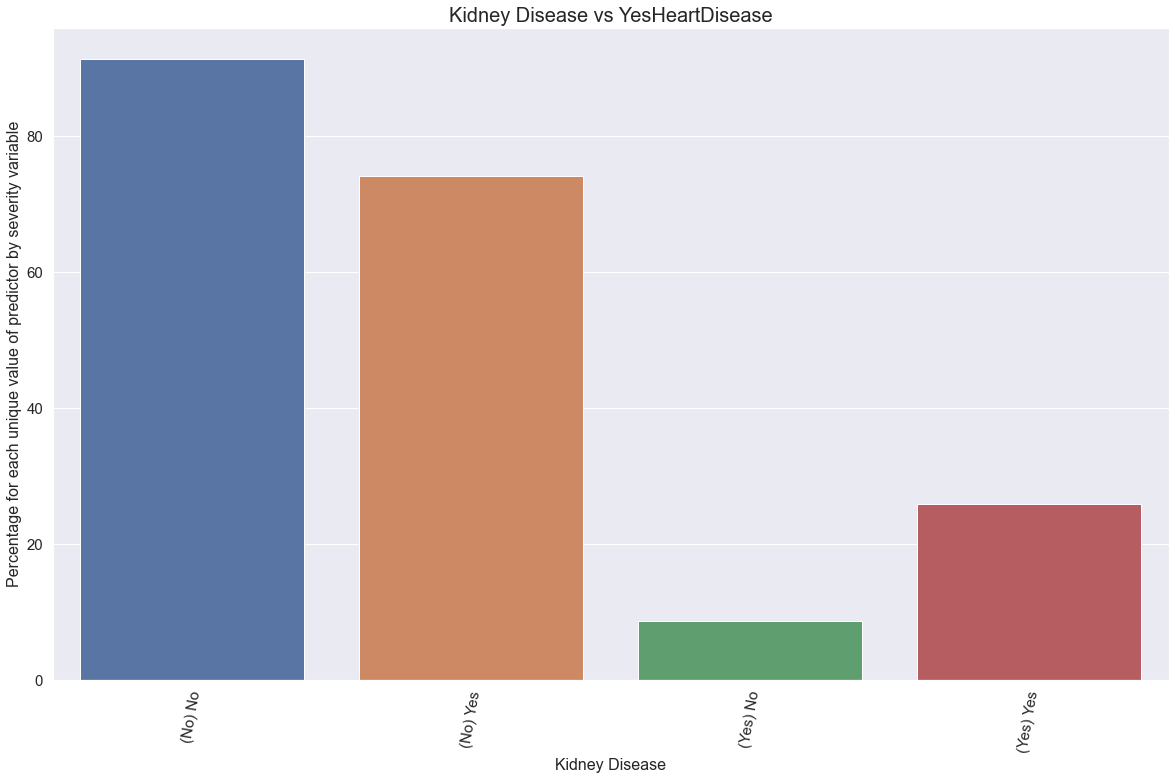

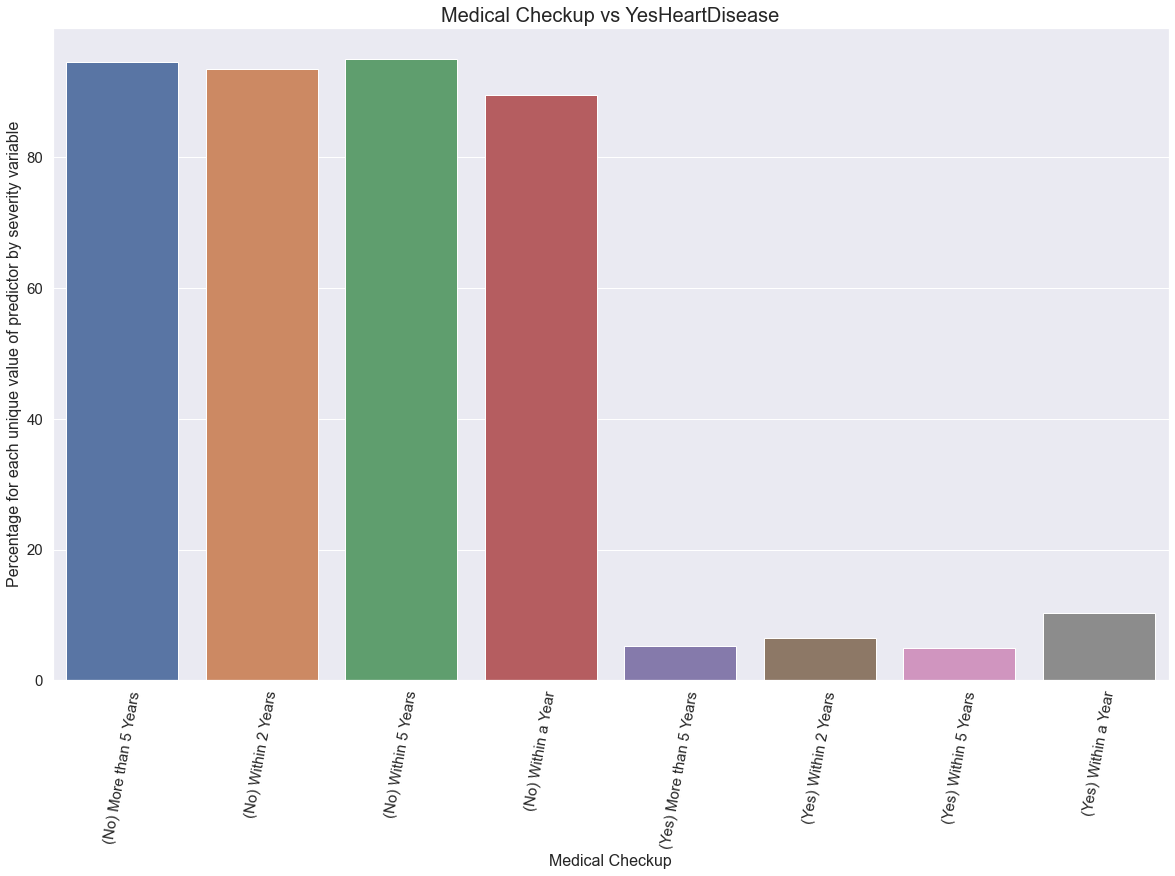

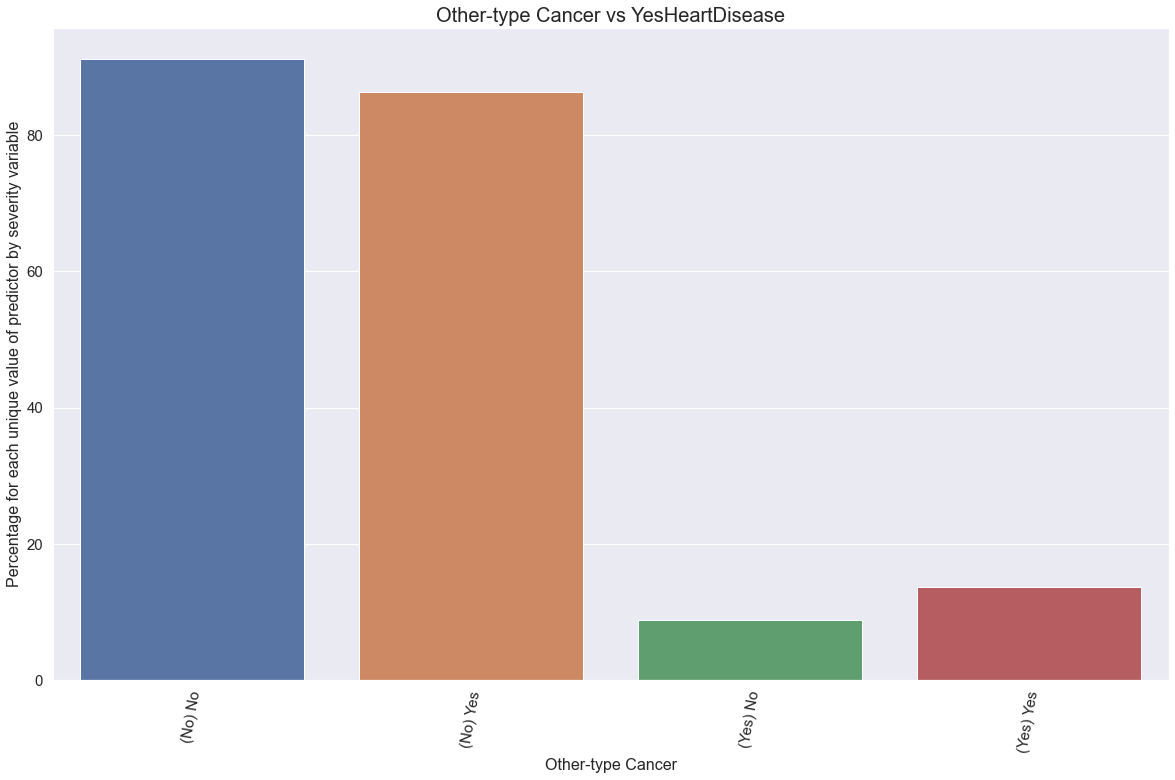

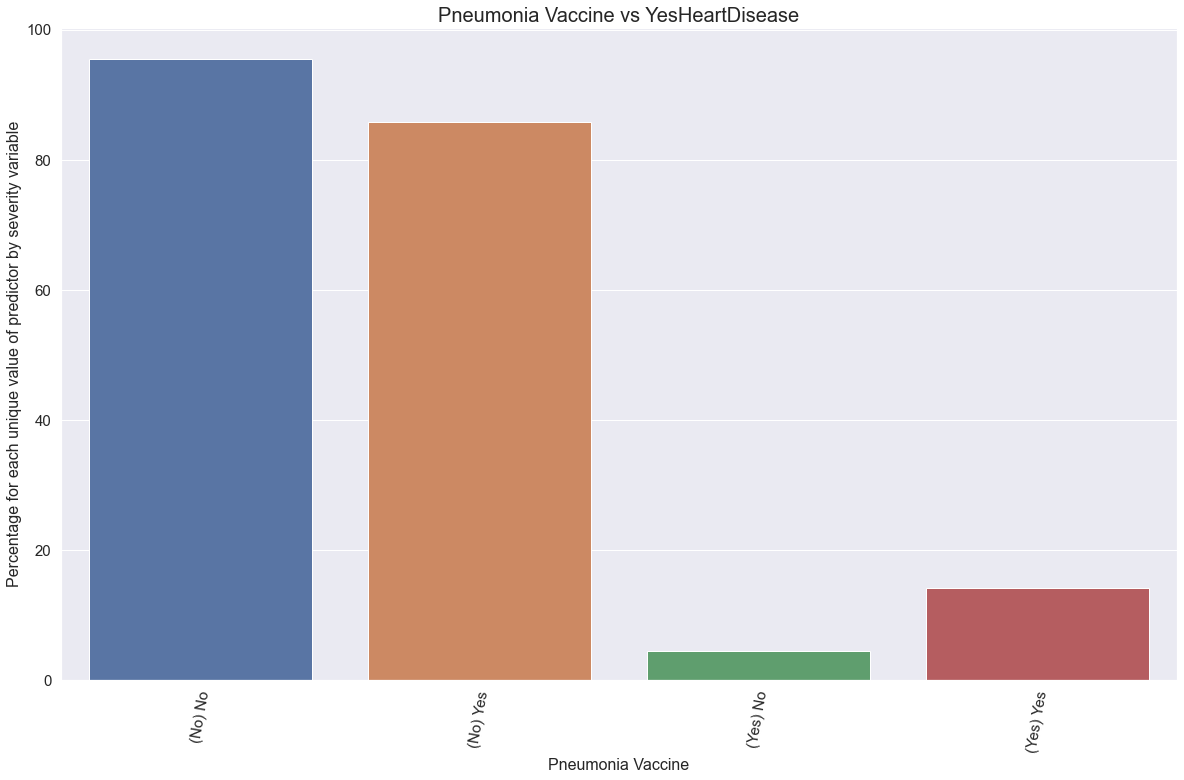

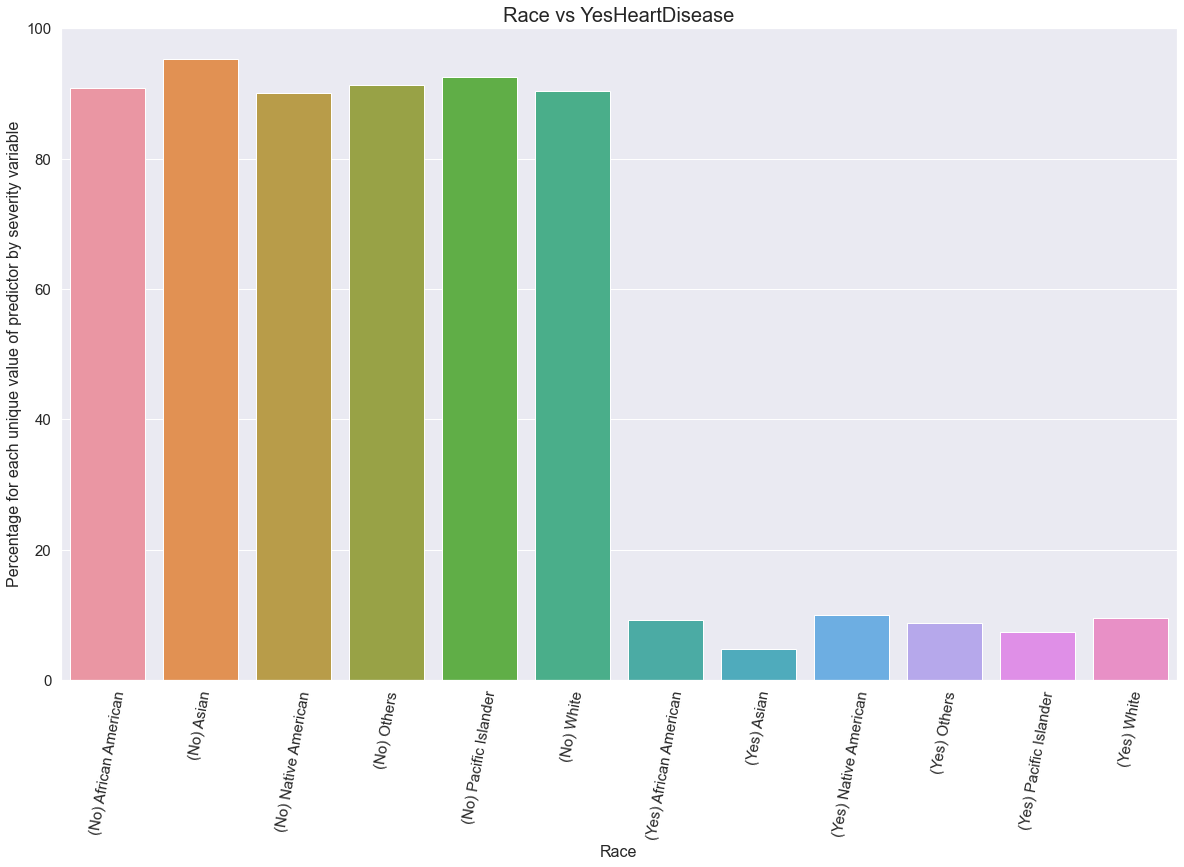

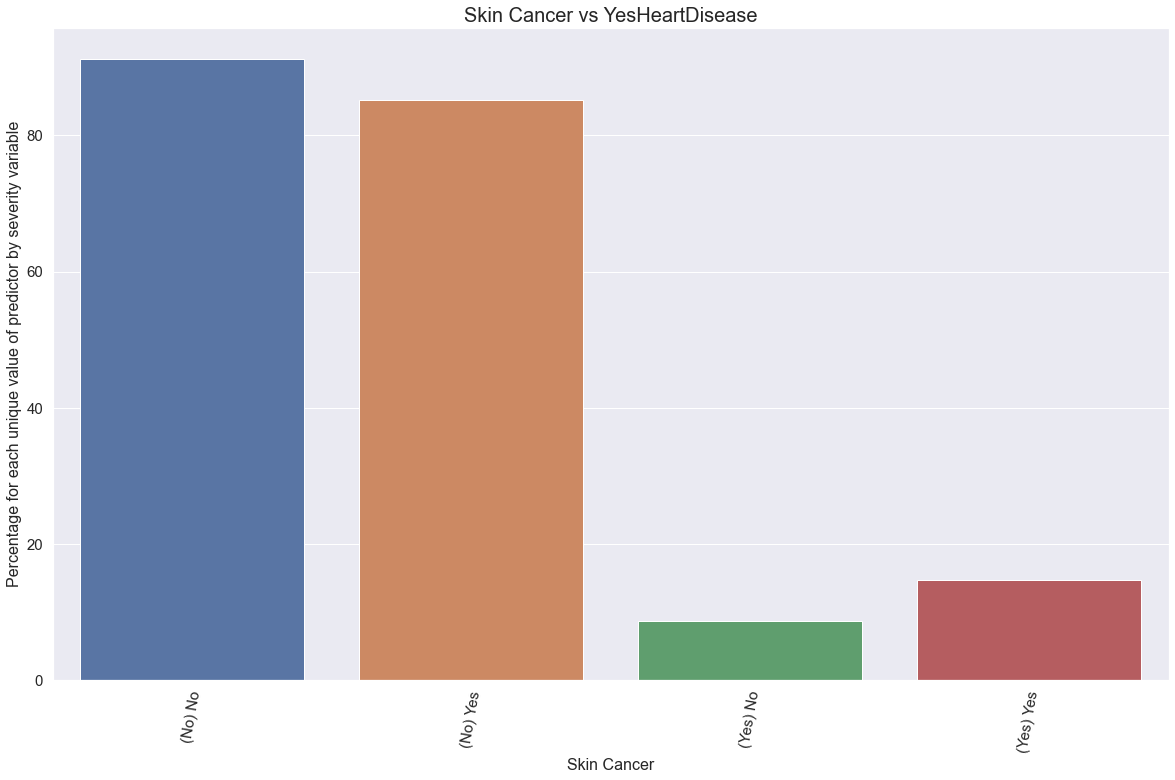

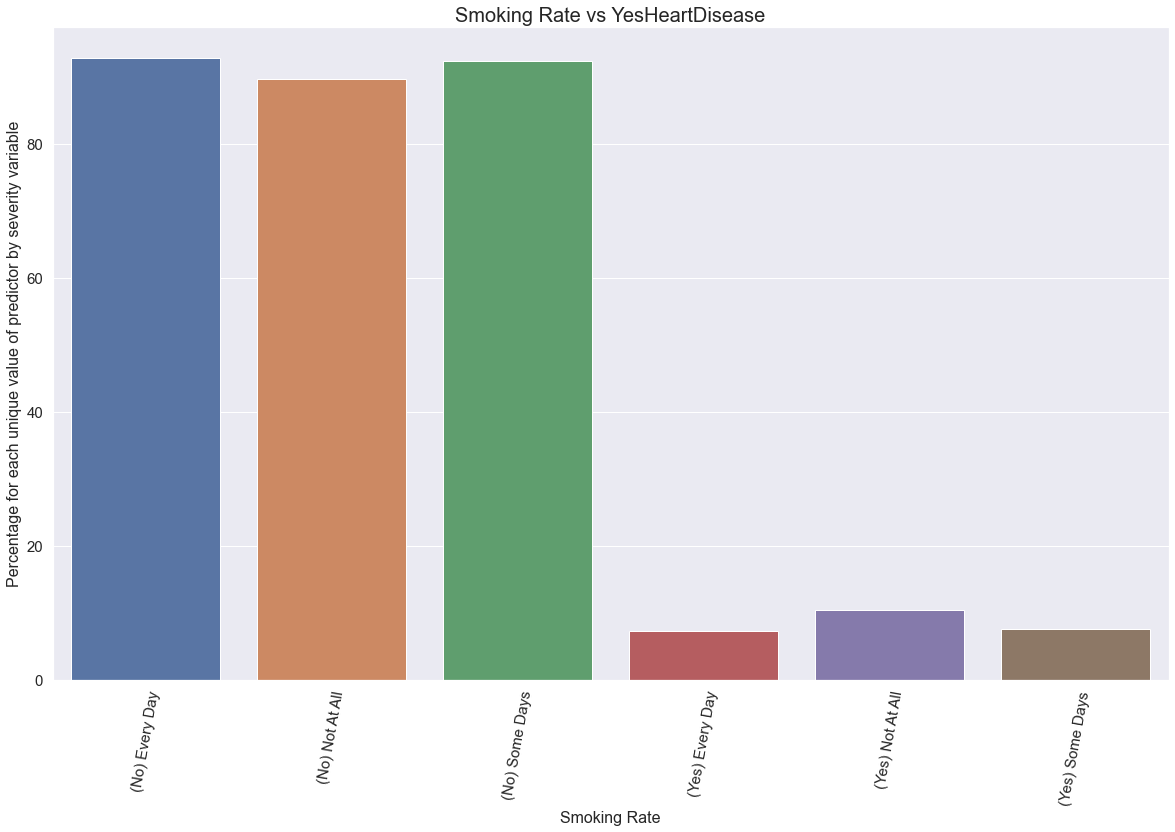

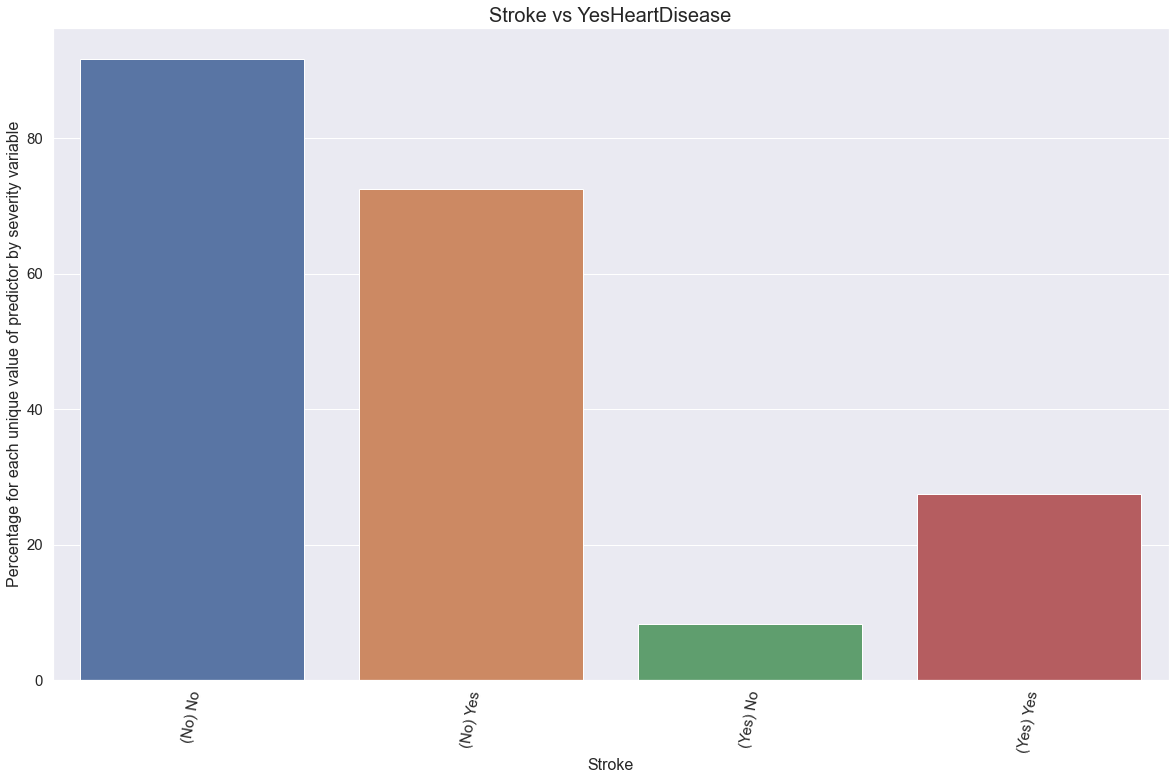

In [51]:
# Plotting bar charts to find the relationshiop 
index = 0 
for var in predictor_Categorical: 
    unique_Number = number_Unique_Dictionary[var] 
    variable_Dataframe = predictor_Dataframe.iloc[index:index + 2*unique_Number]
    if variable_Dataframe.empty:
        print(f"No data available for {var} and heart disease = Yes")
        continue
    plt.figure(figsize=(20, 12)) 
    sb.barplot(data=variable_Dataframe, x='UniqueValue', y='Percentage') 
    plt.title(var + ' vs YesHeartDisease', fontsize=20, fontweight=15) 
    plt.xticks(rotation=80, fontsize=15) 
    plt.yticks(fontsize=15) 
    plt.xlabel(variable_Dataframe.loc[index, 'Predictor'], fontsize=16) 
    plt.ylabel('Percentage for each unique value of predictor by severity variable', fontsize=16) 
    plt.show() 
    index += 2*unique_Number

Above shows the different categorical data visualised in a bar graph

### Predictor Model for Categorical and Categorical 

In [52]:
# Extracting the GenHealth and Heart Disease variables from the data
heart_Disease = filtered_Data['Heart Disease'] # Response variable

In [53]:
# Function to calculate Cramer's V 
def cramers_V(chi_Square_Value, N, row, column): 
    return np.sqrt(chi_Square_Value/(N*min(row-1, column-1)))

In [54]:
 # Function to calculate Tsuchuprow's T
def tsuchuprows_T(chi_Square_Value, N, row, column): 
    return np.sqrt(chi_Square_Value/(N*np.sqrt((row-1)*(column-1))))

## Chi square test of independence

As heart disease is a cateorical variabe, we will use this test which will allow us to visualise the association between the categorical variables

Chi Square works by formulating a NULL and alternative hypothesis.

**Null hypothesis** : No association between 2 categorical variables

**Alternative hypothesis** : There is an association between 2 categorical variables.

### Variables used in test:
**Degree of freedom**: (unique values of predictor - 1) * (unique values of response - 1). As our response variable only has 2 unique values, the degree of freedom for our predictiors will be the number of their unique values minus 1.

**Significance level**: We have chose 0.05 which indicates a 5% risk of concluding that an association between the variables exists when there is no actual association. 5% is a good benchmark.

**Critical value**: Extracted from the chi square table of distribution and depends on significance level and degree of freedom. A picture of this table is attached below.


**Cramer's v** measures strength of association between 2 variables with 1 being a perfect association
- Based off our values, it shows the relationship between Heart Disease and General Health

**Tsuchuprows T** a measure of association between 2  variables it is closely related to cramer's V
- This is also based off our values heart disease and general health 

In [55]:
# Storing essential metrics
chi_Square_Test = {'Predictor': predictor_Categorical, 'Degree of Freedom':[], 'Chi Square Value':[], 'p Value': [], 'Rs with Heart Condition':[]}

In [56]:
# Loop through all predictor variables to calculate the metrics

for var in predictor_Categorical: 
    predictor = filtered_Data[var] # Predictor variable 
    
    # Constructing contingency table for each predictor variable vs Diabetic 
    contigency_Table = pd.crosstab(predictor, heart_Disease) 
    
    # Determining test statistic, p-value, degrees of freedom used and expected values count 
    chi_Value, p_Value, degree_Freedom, expected_Values_Count = ss.chi2_contingency(contigency_Table)
    # Store the metrics 
    chi_Square_Test['Degree of Freedom'].append(degree_Freedom) 
    chi_Square_Test['p Value'].append(p_Value) 
    chi_Square_Test['Chi Square Value'].append(chi_Value.round(4))

In [57]:
pp.pprint(chi_Square_Test)

{'Chi Square Value': [191.3794,
                      2928.239,
                      409.4723,
                      756.4818,
                      5909.9362,
                      24676.5287,
                      3346.6414,
                      2902.989,
                      1639.5643,
                      411.6878,
                      327.6775,
                      2805.7195,
                      34.812,
                      453.4319,
                      228.7629,
                      2489.5024],
 'Degree of Freedom': [1, 1, 1, 1, 4, 1, 2, 1, 1, 3, 1, 1, 5, 1, 2, 1],
 'Predictor': ['Asthma',
               'Difficulty Walking',
               'Exercise Rate',
               'Gender',
               'General Health',
               'Heart Attack',
               'High Blood Pressure',
               'High Cholestrol',
               'Kidney Disease',
               'Medical Checkup',
               'Other-type Cancer',
               'Pneumonia Vaccine',
               '

Below is the chisquare distribution table
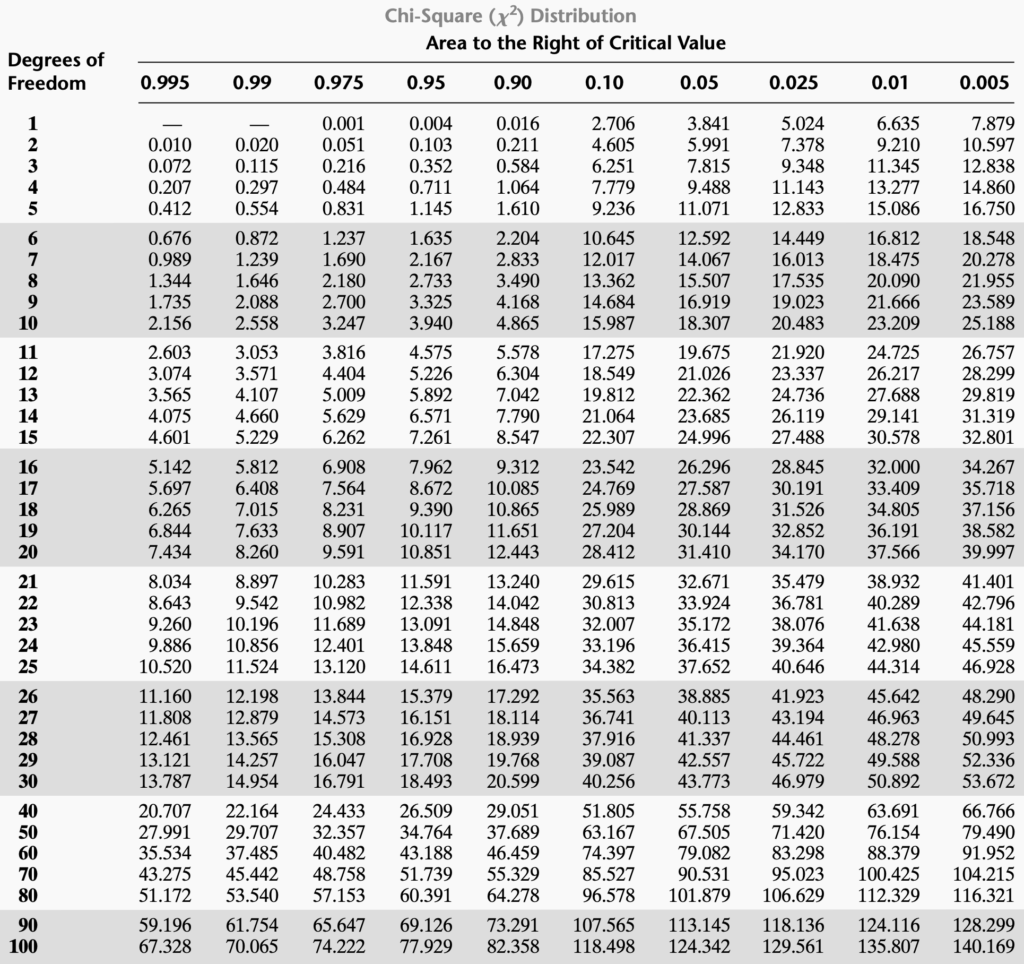

In [58]:
# Critical value based on 5% significance level and degrees of freedom (key) 
critical_Value = {1:3.841, 2:5.991, 3:7.815, 4:9.488, 5:11.071}

In [59]:
# Looping through all degrees of freedom stored 
for i in range(len(chi_Square_Test['Degree of Freedom'])): 
    new_Data = chi_Square_Test['Degree of Freedom'][i] 
    chi_Square_Test_Statistic_Value = chi_Square_Test['Chi Square Value'][i] 
    
    if(chi_Square_Test_Statistic_Value >= critical_Value[new_Data]): 
        chi_Square_Test['Rs with Heart Condition'].append('Yes') 
    else: 
        chi_Square_Test['Rs with Heart Condition'].append('No')

In [60]:
# Construct a dataframe to display the metrics and conclusion
chi_Square_DataFrame = pd.DataFrame(chi_Square_Test) 
chi_Square_DataFrame

,Predictor,Degree of Freedom,Chi Square Value,p Value,Rs with Heart Condition
0,Asthma,1,191.3794,1.589452e-43,Yes
1,Difficulty Walking,1,2928.2390,0.000000e+00,Yes
2,Exercise Rate,1,409.4723,4.775105e-91,Yes
3,Gender,1,756.4818,1.563242e-166,Yes
4,General Health,4,5909.9362,0.000000e+00,Yes
5,Heart Attack,1,24676.5287,0.000000e+00,Yes
6,High Blood Pressure,2,3346.6414,0.000000e+00,Yes
7,High Cholestrol,1,2902.9890,0.000000e+00,Yes
8,Kidney Disease,1,1639.5643,0.000000e+00,Yes
9,Medical Checkup,3,411.6878,6.507354e-89,Yes


A lower p-value indicates stronger evidence against the null hypothesis, as it suggests that the observed result is less likely to have occurred by chance.

A low chi-square value indicates a smaller difference between the observed and expected values, meaning that the observed data is closer to the expected data.

the critical value is a threshold or cutoff value that is used to determine whether to reject the null hypothesis
 
We will now determine the cramer's v and Tsuchuprow's T for all the predictors

In [61]:
# Storing Cramér's V and Tsuchuprow's T values 
chi_Square_Support = {'Cramers V':[], 'Tsuchuprows T':[]}

In [62]:
# Loop through all predictor variables to calculate the Cramér's V and Tsuchuprow's T values 
for var in predictor_Categorical: 
    predictor = filtered_Data[var] # Predictor variable 
    
    # Constructing contingency table for each predictor variable vs health Disease 
    contigency_Table = pd.crosstab(predictor, heart_Disease) 
    
    # Determining test statistic, p-value, degrees of freedom used and expected values count 
    chi_Value, p_Value, degree_Freedom, expected_Values_Count = ss.chi2_contingency(contigency_Table) 
    
    # Determining Cramér's V and Tsuchuprow's T values 
    cramer_V = cramers_V(chi_Value, heart_Disease.shape[0], contigency_Table.shape[0], contigency_Table.shape[1])
    tsuchuprows_t = tsuchuprows_T(chi_Value, heart_Disease.shape[0], contigency_Table.shape[0], contigency_Table.shape[1]) 
    
    # Store the Cramér's V and Tsuchuprow's T values 
    chi_Square_Support['Cramers V'].append(cramer_V.round(4)) 
    chi_Square_Support['Tsuchuprows T'].append(tsuchuprows_t.round(4))

In [63]:
# Construct a dataframe to display the values 
chi_Square_Support_DataFrame = pd.DataFrame(chi_Square_Support) 
chi_Square_Support_DataFrame

,Cramers V,Tsuchuprows T
0,0.0431,0.0431
1,0.1687,0.1687
2,0.0631,0.0631
3,0.0858,0.0858
4,0.2397,0.1695
5,0.4898,0.4898
6,0.1804,0.1517
7,0.1680,0.1680
8,0.1262,0.1262
9,0.0633,0.0481


In [64]:
chi_Square_Analysis = pd.concat([chi_Square_DataFrame, chi_Square_Support_DataFrame], axis=1) 
chi_Square_Analysis

,Predictor,Degree of Freedom,Chi Square Value,p Value,Rs with Heart Condition,Cramers V,Tsuchuprows T
0,Asthma,1,191.3794,1.589452e-43,Yes,0.0431,0.0431
1,Difficulty Walking,1,2928.2390,0.000000e+00,Yes,0.1687,0.1687
2,Exercise Rate,1,409.4723,4.775105e-91,Yes,0.0631,0.0631
3,Gender,1,756.4818,1.563242e-166,Yes,0.0858,0.0858
4,General Health,4,5909.9362,0.000000e+00,Yes,0.2397,0.1695
5,Heart Attack,1,24676.5287,0.000000e+00,Yes,0.4898,0.4898
6,High Blood Pressure,2,3346.6414,0.000000e+00,Yes,0.1804,0.1517
7,High Cholestrol,1,2902.9890,0.000000e+00,Yes,0.1680,0.1680
8,Kidney Disease,1,1639.5643,0.000000e+00,Yes,0.1262,0.1262
9,Medical Checkup,3,411.6878,6.507354e-89,Yes,0.0633,0.0481


Based on the Cramer and Tsuchuprow's correlation result, Heart Attack, General Health, High Blood Pressure, Difficulty walking, pneumonia vaccine, High Cholesterol and stroke has the best correlations with regards to heart disease based on the cramer's value. 

We will pair these predictors with Age and Physical Health for our machine learning model.

### 4. Machine Learning Model

In this section, we will be comparing the results of the modelling before and after oversampling. 

#### 4.1 Reducing the skewness for numerical Data 

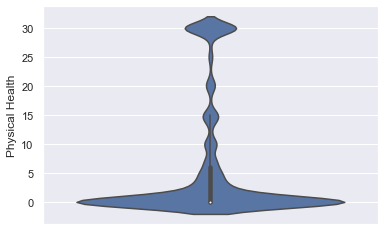

Skewness of Physical Health before transformation:  1.639699137485773


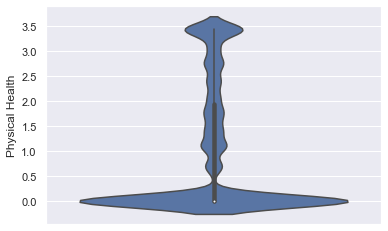

Skewness of Physical Health after transformation: 0.9064497518491038


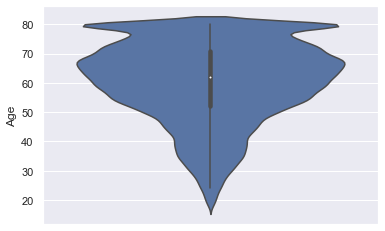

Skewness for Age: -0.6410949734449948


In [65]:
sb.violinplot(y = filtered_Data['Physical Health'])
plt.show()
print("Skewness of Physical Health before transformation: ",filtered_Data['Physical Health'].skew())
while(filtered_Data['Physical Health'].skew() > 1):
    filtered_Data['Physical Health'] = np.log(filtered_Data['Physical Health'] + 1) # Because log0 is undefined, we add 1 to prevent complications
sb.violinplot(y = filtered_Data['Physical Health'])
plt.show()
print("Skewness of Physical Health after transformation:", filtered_Data['Physical Health'].skew())


#No change for skewness for Age, as it is moderately skewed
sb.violinplot(y = filtered_Data['Age'])
plt.show()
print("Skewness for Age:", filtered_Data['Age'].skew())


The skewness of all the numerical data's are all now moderately skewed.With the skewness level in between 0.5 and 1 or -0.5 and -1 are moderately skewed.

We used a logarithmic transform to reduce the skewness of physical health as shown above.

#### 4.2 Creating Machine Learning Model

we will be comparing 2 models, 1 is undersampled, 1 is oversampling 

To measure the accuracy of our models, we will be using the following metrics.
1. Confusion matrix
2. F1-score
3. ROC AUC
4. GINI coefficent.

We will be implementing the following to visualise and better fine tune our data
1. Calibration curve
2. Precision-Recall curve

To see how important each variable in the different models are, we will be using Feature of importance graph
1. Feature of importance

We will also be using these same metrics to compare the accruacy of no sampling, oversampling and undersampling

In [66]:
# Create a dictionary with column names as keys and empty lists as values
data = {
    'Normal AUC': [],
    'Undersampled AUC': [],
    'Oversampled AUC': [],
    'Normal Gini': [],
    'Undersampled Gini': [],
    'Oversampled Gini': [],
    'Normal False Positive Rate': [],
    'Undersampled False Positive Rate': [],
    'Oversampled False Positive Rate': [],
    'Normal False Negative Rate': [],
    'Undersampled False Negative Rate': [],
    'Oversampled False Negative Rate': []
}



In [67]:
filtered_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102873 entries, 0 to 102930
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Physical Health      102873 non-null  float64 
 1   Alcohol Consumption  102873 non-null  float64 
 2   General Health       102873 non-null  category
 3   Exercise Rate        102873 non-null  category
 4   Age                  102873 non-null  float64 
 5   High Cholestrol      102873 non-null  category
 6   Gender               102873 non-null  category
 7   High Blood Pressure  102873 non-null  category
 8   Smoking Rate         102873 non-null  category
 9   Heart Disease        102873 non-null  category
 10  Mental Health        102873 non-null  float64 
 11  Kidney Disease       102873 non-null  category
 12  Asthma               102873 non-null  category
 13  Skin Cancer          102873 non-null  category
 14  Other-type Cancer    102873 non-null  category
 15  

Categorical values would need to be converted to numerical

In [68]:
#Converting the result heart disease to numerical value
labels = pd.get_dummies(filtered_Data['Heart Disease']) 
labels.head(100) # print 10 rows 

,Yes,No
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
95,0,1
96,0,1
97,0,1
98,0,1


In [69]:
# define a function to convert categorical data to numerical data
def convert_To_Numerical(column):
    categories = column.unique()
    numerical_Values = list(range(len(categories)))
    mapping = dict(zip(categories, numerical_Values))
    return column.map(mapping)

In [70]:
# loop through columns in the dataframe and convert categorical data to numerical data
new_Data = filtered_Data.copy()
for column in new_Data.select_dtypes(include=['category']):
    new_Data[column] = convert_To_Numerical(new_Data[column])
    
#Comparing the data before and after conversion
print("This is the data before conversion")
print(filtered_Data.head())
print("This is the data after conversion")
print(new_Data.head())

This is the data before conversion
   Physical Health  Alcohol Consumption General Health Exercise Rate   Age  \
0         0.000000                  0.0           Good           Yes  18.0   
1         0.000000                  4.0      Excellent            No  18.0   
2         0.000000                  0.0      Very Good           Yes  18.0   
3         0.000000                  5.0      Very Good           Yes  18.0   
4         0.693147                  0.0      Very Good           Yes  18.0   

  High Cholestrol  Gender High Blood Pressure Smoking Rate Heart Disease  ...  \
0              No    Male                  No    Some Days            No  ...   
1              No  Female                  No    Every Day            No  ...   
2              No    Male                  No    Every Day            No  ...   
3              No  Female                 Yes    Every Day            No  ...   
4              No    Male                  No    Some Days            No  ...   

   Kidney

#### As mentioned earlier, we will be training our dataset first without any sampling and then again with oversampling and undersampling so we can compare so see the difference.

In [71]:
X = new_Data[['Age', 'Physical Health', 'Heart Attack', 'General Health', 'High Blood Pressure', 'High Cholestrol', 'Difficulty Walking', 'Pneumonia Vaccine', 'Stroke']].to_numpy() # drop purchase column because we want all columns except song name and song popularity in X(independent variable)
Y = labels.values # labels is dataframe,

In [72]:
scaler = preprocessing.StandardScaler() # standardize data 
X = scaler.fit_transform(X)
joblib.dump(scaler, 'Scaler/scaler.pkl') #Saving Scaler

#### No sampling data training 

In [73]:
#Splitting data 
x_Train, x_Test, y_Train, y_Test = train_test_split(X, Y, test_size=0.20, random_state=42) #split data for testing and training

### Cross Entropy Loss
we will be using **cross-entropy loss** to train our dataset which is known to be better at classification problems like this.

Cross-entropy loss which is also known as log loss, is a loss function to measure the difference between the predicted probability distribution of a dataset and the true probability distribution of the target variable. This is hence often used in classification problems.

Cross entropy is calclated as the negative sum of the true class probabilities multiplied by the logarithm of the predicted class probabilities. The formula is as follows:

#### L(y, ŷ) = -[ylog(ŷ) + (1-y)log(1-ŷ)]
y is the true label (0,1), 
ŷ is the predicted probability of the positive class,
log is the natural logarithm

The logic behind cross entropy is it penalizes the model more for making high-confidence wrong predictions than for making low-confidence wrong predictions. If the predicted probability of the true class is high (close to 1), then the loss will be small, but if the predicted probability is low (close to 0), then the loss will be large. This allows us to train our model accurately.

In [74]:
## Uncomment following lines and fill in the blank wiht your answer

current_Model = models.Sequential()
current_Model.add(layers.Dense(64, activation='relu', input_shape=[X.shape[1]]))
#current_Model.add(layers.BatchNormalization())
current_Model.add(layers.Dense(64, activation='relu'))
#current_Model.add(layers.BatchNormalization())
current_Model.add(layers.Dense(Y.shape[1], activation='sigmoid')) # 2 output layer

print(current_Model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 4,930
Trainable params: 4,930
Non-trainable params: 0
_________________________________________________________________
None


In [75]:
# configuring the loss, optimizer and metrics of the train model
current_Model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
print("This is the shape for x_Train: ",x_Train.shape)
print("This is the shape for y_Train: ",y_Train.shape)

This is the shape for x_Train:  (82298, 9)
This is the shape for y_Train:  (82298, 2)


In [77]:
#patience means that when the model is fully trained it'll train 10 more times
early_Stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) 
chistory = current_Model.fit(x_Train, y_Train, batch_size=8, epochs=2000,validation_split = 0.2, verbose=0, callbacks=[early_Stop])

In [78]:
## Evaluate the model and display the score
print(x_Test.shape)
print(y_Test.shape)
score = current_Model.evaluate(x_Test, y_Test, verbose=1) # evaluate model using testing data
print("Test Score:", score[0])
print("Test Accuracy:", score[1])
current_Model.save('Model/normal.h5') #Saving the current_Model

(20575, 9)
(20575, 2)
643/643 [==============================] - 1s 1ms/step - loss: 0.2122 - accuracy: 0.9202
Test Score: 0.2121649831533432
Test Accuracy: 0.9201943874359131


#### Testing of Model Accuracy 

In [79]:
#Load the model 
model_Normal = tf.keras.models.load_model('Model/normal.h5')

#load the scaler
scaler_Normal = joblib.load('Scaler/scaler.pkl')


def predict_Heart_Disease(age, physical_Health, general_Health, heart_Attack, high_Blood_Pressure, high_Cholestrol, difficulty_Walking, pneumonia_Vaccine,stroke):
    # Transform input data
    
    input_Data = [[age, physical_Health, general_Health, heart_Attack, high_Blood_Pressure, high_Cholestrol, difficulty_Walking, pneumonia_Vaccine,stroke]]
    scaled_Data = scaler_Normal.transform(input_Data)
    
    # Make prediction
    prediction = model_Normal.predict(scaled_Data)
    
     # Classify input as positive or negative
    if prediction[0][1] > prediction[0][0]:
        probability_Heart_Disease = prediction[0][1]
        probability_No_Heart_Disease = 1 - probability_Heart_Disease
    else:
        probability_No_Heart_Disease = prediction[0][0]
        probability_Heart_Disease = 1 - probability_No_Heart_Disease
    
    # Print probabilities
    print("Probability of Heart Disease: {:.2f} %".format(probability_Heart_Disease * 100))
    print("Probability of No Heart Disease: {:.2f} %".format(probability_No_Heart_Disease * 100))


**User Model Prediction test**

Now that we have trained the model, we will now input our own values and see the prediction on the probability of heart disease as seen below.

In [80]:
while True:
    try:
        age = float(input("Enter age: "))
        physical_Health = float(input("Enter physical health score (0-30): "))
        general_Health = float(input("Enter general health score (0-4): "))
        heart_Attack = float(input("Enter heart attack history (0/1): "))
        high_Blood_Pressure = float(input("Enter high blood pressure history (0/1): "))
        high_Cholestrol = float(input("Enter high cholesterol history (0/1): "))
        difficulty_Walking = float(input("Enter difficulty walking score (0/1): "))
        pneumonia_Vaccine = float(input("Enter pneumonia vaccine history (0/1): "))
        stroke = float(input("Enter stroke (0/1): "))
        
        
        # Check that input values are within the expected range
        if not 0 <= physical_Health <= 30 or not  0 <= general_Health <= 4:
            raise ValueError("Invalid input. Scores must be between 0-30 and general health between 0-4.")
        if heart_Attack not in [0, 1] or high_Blood_Pressure not in [0, 1] or high_Cholestrol not in [0, 1] or difficulty_Walking not in [0, 1] or pneumonia_Vaccine not in [0, 1] or stroke not in [0, 1]:
            raise ValueError("Invalid input. History values must be 0 or 1.")

        # Use the function to make a prediction
        result = predict_Heart_Disease(
            age=age,
            physical_Health=physical_Health,
            general_Health=general_Health,
            heart_Attack=heart_Attack,
            high_Blood_Pressure=high_Blood_Pressure,
            high_Cholestrol=high_Cholestrol,
            difficulty_Walking=difficulty_Walking,
            pneumonia_Vaccine=pneumonia_Vaccine,
            stroke = stroke)

        # Output the prediction results
       # print(result)
        
        # Ask user whether to continue or not
        choice = input("Do you want to continue? (y/n): ").strip().lower()
        if choice == "n":
            break
            

    except ValueError as e:
        print(str(e))
        print("Please enter valid input values.")
    except Exception as e:
        print("An error occurred. Please try again.")
        print(str(e))




Enter age:  45
Enter physical health score (0-30):  22
Enter general health score (0-4):  2
Enter heart attack history (0/1):  0
Enter high blood pressure history (0/1):  1
Enter high cholesterol history (0/1):  1
Enter difficulty walking score (0/1):  1
Enter pneumonia vaccine history (0/1):  0
Enter stroke (0/1):  0


Probability of Heart Disease: 99.82 %
Probability of No Heart Disease: 0.18 %


Do you want to continue? (y/n):  y
Enter age:  22
Enter physical health score (0-30):  2
Enter general health score (0-4):  3
Enter heart attack history (0/1):  0
Enter high blood pressure history (0/1):  0
Enter high cholesterol history (0/1):  0
Enter difficulty walking score (0/1):  0
Enter pneumonia vaccine history (0/1):  1
Enter stroke (0/1):  0


Probability of Heart Disease: 93.32 %
Probability of No Heart Disease: 6.68 %


Do you want to continue? (y/n):  n


Above is the 2 inputs and the prediction of heart disease.

In [81]:
##### Predict the model
current_Predict = current_Model.predict(x_Test) # predicted values using train model 
#print(current_Predict[:10])
labels = ['Yes', 'No']
predicted = []
actual = []

output = pd.DataFrame(columns = ['predicted', 'actual'], dtype = 'category')

for i in current_Predict: # for each row in current_Predict,it will look for the index with the highest value 
    heart_Disease = labels[np.argmax(i)] # use argmax, look each of the rows and see which one gives the highest value
    predicted.append(heart_Disease) # save the label from labels into predicted list 
    
output['predicted'] = predicted # save the value in predicted in output array 

y_Test_Numpy = y_Test

for j in y_Test_Numpy: 
    heart_Disease = labels[np.argmax(j)]
    actual.append(heart_Disease)
    
output['actual'] = actual # save the value in actual in output array

print(output.head(20)) # print the first 5 rows for output 



   predicted actual
0         No     No
1         No     No
2        Yes    Yes
3         No     No
4         No     No
5         No     No
6         No     No
7         No     No
8        Yes    Yes
9         No     No
10        No     No
11        No     No
12        No     No
13        No     No
14        No     No
15        No     No
16        No     No
17        No     No
18        No     No
19        No     No


**Confusion Matrix**

Accuracy: 0.9201944106925881
False Positive Rate (false_Positive_Rate): 0.5823834196891192
False Negative Rate (false_Negative_Rate): 0.0277822472512738
Test Data
              precision    recall  f1-score   support

         Yes       0.61      0.42      0.50      1930
          No       0.94      0.97      0.96     18645

    accuracy                           0.92     20575
   macro avg       0.78      0.69      0.73     20575
weighted avg       0.91      0.92      0.91     20575



Text(0.5, 1.0, 'Confusion Matrix')

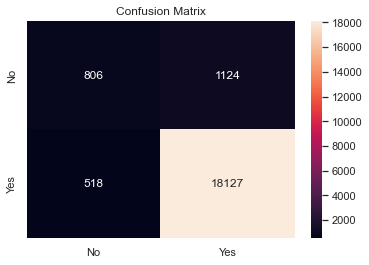

In [83]:
# Create a Pandas dataframe using the dictionary
result = pd.DataFrame(data) # to store the results and compare 

y_Pred = current_Predict.copy()

y_Pred = np.argmax(y_Pred, axis=1)
y_New_Test = np.argmax(y_Test, axis=1)

# Calculate the accuracy score
accuracy = accuracy_score(y_New_Test, y_Pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
confusion_Matrix = confusion_matrix(y_New_Test, y_Pred)

# Calculate false positive rate
false_Positive_Rate = confusion_Matrix[0,1]/(confusion_Matrix[0,0]+confusion_Matrix[0,1])
result.loc[0,'Normal False Positive Rate'] = false_Positive_Rate
print("False Positive Rate (false_Positive_Rate):", false_Positive_Rate)

# Calculate false negative rate
false_Negative_Rate = confusion_Matrix[1,0]/(confusion_Matrix[1,0]+confusion_Matrix[1,1])
result.loc[0,'Normal False Negative Rate'] = false_Negative_Rate
print("False Negative Rate (false_Negative_Rate):", false_Negative_Rate)

# Print classification report
print("Test Data") 
print(classification_report(y_New_Test, y_Pred, target_names = ["Yes", "No"])) 

# Plot confusion matrix
sb.heatmap( data = pd.DataFrame( data = confusion_Matrix, columns = ["No" , "Yes"], index = ["No", "Yes"] ), annot = True, fmt = "d")
plt.title("Confusion Matrix")

**Feature of Importance Graph**

Feature of importance is based on how useful a feature is at predicting and in this case, predicting heart disease. The graph below allows us to visualize this

Feature Importances:
Age: 19.24
General Health: 16.46
Difficulty Walking: 15.62
High Blood Pressure: 15.59
Heart Attack: 15.07
Pneumonia Vaccine: 14.94
High Cholestrol: 14.74
Physical Health: 14.16
Stroke: 11.99


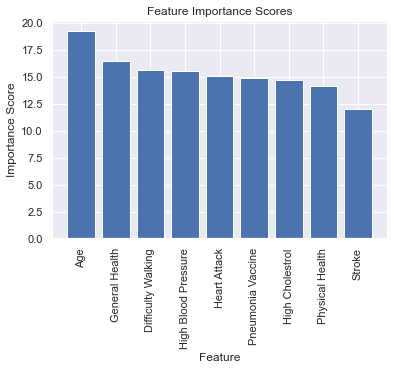

In [84]:
# Define feature names=
feature_Names = ['Age', 'Physical Health', 'Heart Attack', 'General Health', 'High Blood Pressure', 'High Cholestrol', 'Difficulty Walking','Pneumonia Vaccine', 'Stroke']

# Get the weights of the first layer of the neural network
weights = current_Model.layers[0].get_weights()[0]

# Calculate the feature importance scores
importance_Scores = abs(weights).sum(axis=1)

# Sort the features by importance score
sorted_Indices = importance_Scores.argsort()[::-1]
sorted_Scores = importance_Scores[sorted_Indices]

# Print the feature names and their importance scores
print("Feature Importances:")
for i, score in zip(sorted_Indices, sorted_Scores):
    print(f"{feature_Names[i]}: {score:.2f}")

# Create the bar graph
plt.bar(range(len(sorted_Scores)), sorted_Scores)
plt.xticks(range(len(sorted_Scores)), [feature_Names[i] for i in sorted_Indices], rotation=90, ha='center')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.show()


The graph shows the importance of each feature in predicttng heart disease and the 4 most important features are **Age** which has the highest importance in predicting heart disease and then followed by General Health, Difficulty Walking and High Blood Pressure. 

**Calibration Curve** 

This is a graphical representation of the relationship between the predicted probabilities of a model and the actual data



Bin 1: Mean Predicted Value = 0.13, Fraction Of Positives = 0.00
Bin 2: Mean Predicted Value = 0.25, Fraction Of Positives = 0.32
Bin 3: Mean Predicted Value = 0.35, Fraction Of Positives = 0.35
Bin 4: Mean Predicted Value = 0.46, Fraction Of Positives = 0.45
Bin 5: Mean Predicted Value = 0.55, Fraction Of Positives = 0.52
Bin 6: Mean Predicted Value = 0.65, Fraction Of Positives = 0.70
Bin 7: Mean Predicted Value = 0.77, Fraction Of Positives = 0.82
Bin 8: Mean Predicted Value = 0.86, Fraction Of Positives = 0.87
Bin 9: Mean Predicted Value = 0.97, Fraction Of Positives = 0.97


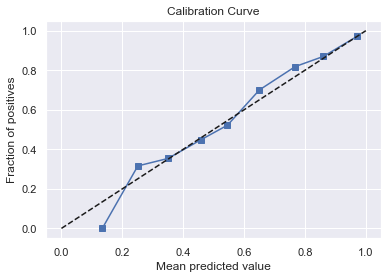

In [85]:
# Get the predicted probabilities for the positive class
current_Predict_Probability = current_Model.predict(x_Test)[:, 1]

# Create the calibration curve
fraction_Of_Positives, mean_Predicted_Value = calibration_curve(y_Test[:, 1], current_Predict_Probability, n_bins=10)

# Plot the calibration curve
plt.plot(mean_Predicted_Value, fraction_Of_Positives, "s-")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curve")

# Print the values of respective points
for i, (mpv, fop) in enumerate(zip(mean_Predicted_Value, fraction_Of_Positives)):
    print("Bin {}: Mean Predicted Value = {:.2f}, Fraction Of Positives = {:.2f}".format(i+1, mpv, fop))

plt.show()

**Precision-recall Curve Graph**

This graph shows the trade off between precision and recall of the different thresholds. A high area under the curve shows high precision and recall and vise versa. High precision shows a low false positive rate and high recall shows a low false negative rate 

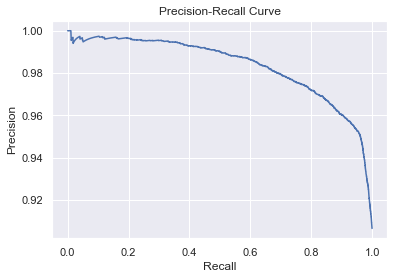

In [86]:
# Get the predicted probabilities for the positive class
current_Predict_Probability = current_Model.predict(x_Test)[:, 1]

# Compute the precision, recall and threshold values
precision, recall, threshold = precision_recall_curve(y_Test[:, 1], current_Predict_Probability)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

**ROC Curve**


Used to evaluate the model used


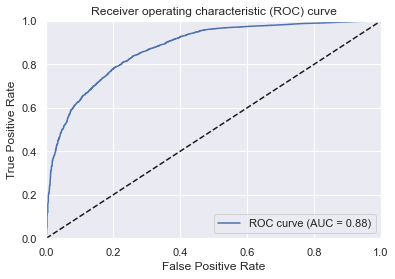

This is the Gini coefficient:  0.753359038595409


In [87]:
# Convert "yes" and "no" to binary 0 and 1
le = LabelEncoder()
y_New_Test = le.fit_transform(y_New_Test)

# Predict the probability of the positive class on the test data
y_Probability = current_Model.predict(x_Test)[:,1]

# Compute the ROC curve based on the true labels and predicted probabilities
false_Positive_Rate, true_Positive_Rate, thresholds = roc_curve(y_New_Test, y_Probability)

# Calculate the AUC score based on the true labels and predicted probabilities
auc = roc_auc_score(y_New_Test, y_Probability)
result.loc[0,'Normal AUC'] = auc

# Plot the ROC curve
plt.plot(false_Positive_Rate, true_Positive_Rate, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # random guessing curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

Gini = auc*2-1
result.loc[0,'Normal Gini'] = Gini
print("This is the Gini coefficient: ",Gini)

Based on the AUC value, this shows that the model is able to perform well for it's classification accuracy 

Also Gini coefficient is to measure of inequality of a distribution in a dataset. A gini coefficient of 0.753 shows that there is a relatively high level of inequality of data. 


#### Undersampling Data Training

For undersampling, we are using Sythetic Minority Over-sampling Technique Edited NEarest Neighbor. This model not only does undersampling, but it also overcomes the limitations of each method and produce a more balanced and representative dataset. 

In [88]:
# Define the SMOTE and undersampling objects
smote_Undersampled = SMOTEENN(sampling_strategy='not minority')

x_Train_Undersampled, y_Train_Undersampled = smote_Undersampled.fit_resample(x_Train, y_Train)

x_Train_Undersampled = scaler.fit_transform(x_Train_Undersampled)
joblib.dump(scaler, 'Scaler/undersampled_Scaler.pkl');

encoder = OneHotEncoder()
y_Train_Undersampled = encoder.fit_transform(y_Train_Undersampled.reshape(-1, 1)).toarray()

print("This is the shape for x_Train: ", x_Train.shape)
print("This is the shape for y_Train: ", y_Train.shape)
print("This is the shape for x_Train_Undersampled: ",x_Train_Undersampled.shape)
print("This is the shape for y_Train_Undersampled: ",y_Train_Undersampled.shape)

This is the shape for x_Train:  (82298, 9)
This is the shape for y_Train:  (82298, 2)
This is the shape for x_Train_Undersampled:  (64156, 9)
This is the shape for y_Train_Undersampled:  (64156, 2)


We will be using **Batch normalisation** (batch norm) which normalises the layer's inputs by re-centering and re-scaling them which optimises them. This allows the training of neural networks to be faster and more stable

On top of batch normalisation, we used **dropout** which is a regularization technique to reduce overfitting in neural networks. 

It is an efficient way of performing model averaging on neural networks.

In [89]:
## Uncomment following lines and fill in the blank wiht your answer

undersampled_Model = models.Sequential()
undersampled_Model.add(tf.keras.Input(shape=[x_Train.shape[1]])) # 10 input layer 
undersampled_Model.add(layers.Dense(64, activation='relu'))
undersampled_Model.add(layers.BatchNormalization())
undersampled_Model.add(layers.Dropout(0.5)) # Dropout layer with rate 0.5
undersampled_Model.add(layers.Dense(64, activation='relu'))
undersampled_Model.add(layers.BatchNormalization())
undersampled_Model.add(layers.Dropout(0.5)) # Dropout layer with rate 0.5
undersampled_Model.add(layers.Dense(y_Train.shape[1], activation='sigmoid')) # 2 output layer


print(undersampled_Model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [90]:
undersampled_Model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # configuring the loss, optimizer and metrics of the train model


In [91]:
early_Stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)#patience means that when the model is fully trained it'll train 10 more times 
chistory = undersampled_Model.fit(x_Train_Undersampled, y_Train_Undersampled, batch_size=64, epochs=2000,validation_split = 0.2, verbose=0, callbacks=[early_Stop])

In [92]:
## Evaluate the model and display the score
print(x_Test.shape)
print(y_Test.shape)
score_Undersampled = undersampled_Model.evaluate(x_Test, y_Test, verbose=1) # evaluate model using testing data
print("Test Score:", score_Undersampled[0])
print("Test Accuracy:", score_Undersampled[1])
undersampled_Model.save('Model/undersampled.h5')

(20575, 9)
(20575, 2)
643/643 [==============================] - 1s 2ms/step - loss: 0.6548 - accuracy: 0.9187
Test Score: 0.6548362970352173
Test Accuracy: 0.9187363386154175


#### Testing of Model Accuracy 

In [93]:
#Load undersampled model 
model_Undersampled = tf.keras.models.load_model('Model/undersampled.h5')

#Load Scaler 
scaler_Undersampled = joblib.load('Scaler/undersampled_Scaler.pkl')

def predict_Heart_Disease_Undersampled(age, physical_Health, general_Health, heart_Attack, high_Blood_Pressure, high_Cholestrol, difficulty_Walking, pneumonia_Vaccine, stroke):
    # Transform input data
    input_Data = [[age, physical_Health, general_Health, heart_Attack, high_Blood_Pressure, high_Cholestrol, difficulty_Walking, pneumonia_Vaccine, stroke]]
    scaled_Data = scaler_Undersampled.transform(input_Data)
    
    # Make prediction
    prediction = model_Undersampled.predict(scaled_Data)
    
    # Classify input as positive or negative
    if prediction[0][1] > prediction[0][0]:
        probability_Heart_Disease = prediction[0][1]
        probability_No_Heart_Disease = 1 - probability_Heart_Disease
    else:
        probability_No_Heart_Disease = prediction[0][0]
        probability_Heart_Disease = 1 - probability_No_Heart_Disease
    
    # Print probabilities
    print("Probability of Heart Disease: {:.2f} %".format(probability_Heart_Disease * 100))
    print("Probability of No Heart Disease: {:.2f} %".format(probability_No_Heart_Disease * 100))


**User Model Prediction test**

Now that we have trained the model, we will now input our own values and see the prediction on the probability of heart disease as seen below.

In [98]:
while True:
    try:
        age_Undersampled = float(input("Enter age: "))
        physical_Health_Undersampled = float(input("Enter physical health score (0-30): "))
        general_Health_Undersampled = float(input("Enter general health score (0-4): "))
        heart_Attack_Undersampled = float(input("Enter heart attack history (0/1): "))
        high_Blood_Pressure_Undersampled = float(input("Enter high blood pressure history (0/1): "))
        high_Cholestrol_Undersampled = float(input("Enter high cholesterol history (0/1): "))
        difficulty_Walking_Undersampled = float(input("Enter difficulty walking score (0/1): "))
        pneumonia_Vaccine_Undersampled = float(input("Enter pneumonia vaccine history (0/1): "))
        stroke_Undersampled = float(input("Enter stroke history (0/1): "))
        
        # Check that input values are within the expected range
        if not 0 <= physical_Health_Undersampled <= 30 or not  0 <= general_Health_Undersampled <= 4:
            raise ValueError("Invalid input. Scores must be between 0-30 and general health between 0-4.")
        if heart_Attack_Undersampled not in [0, 1] or high_Blood_Pressure_Undersampled not in [0, 1] or high_Cholestrol_Undersampled not in [0, 1] or difficulty_Walking_Undersampled not in [0, 1] or pneumonia_Vaccine_Undersampled not in [0, 1] or stroke_Undersampled not in [0,1]:
            raise ValueError("Invalid input. History values must be 0 or 1.")

        # Use the function to make a prediction
        result_Undersampled = predict_Heart_Disease_Undersampled(
            age=age_Undersampled,
            physical_Health=physical_Health_Undersampled,
            general_Health=general_Health_Undersampled,
            heart_Attack=heart_Attack_Undersampled,
            high_Blood_Pressure=high_Blood_Pressure_Undersampled,
            high_Cholestrol=high_Cholestrol_Undersampled,
            difficulty_Walking=difficulty_Walking_Undersampled,
            pneumonia_Vaccine=pneumonia_Vaccine_Undersampled,
            stroke = stroke_Undersampled)
        
       # print(result_Undersampled)
        # Ask user whether to continue or not
        choice = input("Do you want to continue? (y/n): ").strip().lower()
        if choice == "n":
            break
            

    except ValueError as e:
        print(str(e))
        print("Please enter valid input values.")
    except Exception as e:
        print("An error occurred. Please try again.")
        print(str(e))
        


Enter age:  45
Enter physical health score (0-30):  22
Enter general health score (0-4):  2
Enter heart attack history (0/1):  0
Enter high blood pressure history (0/1):  1
Enter high cholesterol history (0/1):  1
Enter difficulty walking score (0/1):  1
Enter pneumonia vaccine history (0/1):  0
Enter stroke history (0/1):  0


Probability of Heart Disease: 100.00 %
Probability of No Heart Disease: 0.00 %


Do you want to continue? (y/n):  y
Enter age:  17
Enter physical health score (0-30):  2
Enter general health score (0-4):  4
Enter heart attack history (0/1):  0
Enter high blood pressure history (0/1):  0
Enter high cholesterol history (0/1):  0
Enter difficulty walking score (0/1):  0
Enter pneumonia vaccine history (0/1):  1
Enter stroke history (0/1):  0


Probability of Heart Disease: 2.58 %
Probability of No Heart Disease: 97.42 %


Do you want to continue? (y/n):  n


Above is the 2 inputs and the prediction of heart disease.

In [99]:
## Predict the model
current_Predict_Undersampled = undersampled_Model.predict(x_Test) # predicted values using train model 
#print(current_Predict_Undersampled[:10])
labels_Undersampled = ['Yes', 'No']
predicted_Undersampled = []
actual_Undersampled = []

output_Undersampled = pd.DataFrame(columns = ['predicted', 'actual'], dtype = 'category')

for i in current_Predict_Undersampled: # for each row in current_Predict,it will look for the index with the highest value 
    heart_Disease_Undersampled = labels_Undersampled[np.argmax(i)] # use argmax, look each of the rows and see which one gives the highest value
    predicted_Undersampled.append(heart_Disease_Undersampled) # save the label from labels into predicted list 
    
output_Undersampled['predicted'] = predicted_Undersampled # save the value in predicted in output array 

y_Test_Numpy_Undersampled = y_Test

for j in y_Test_Numpy_Undersampled: 
    heart_Disease_Undersampled = labels_Undersampled[np.argmax(j)]
    actual_Undersampled.append(heart_Disease_Undersampled)
    
output_Undersampled['actual'] = actual_Undersampled # save the value in actual in output array

print(output_Undersampled.head(20)) # print the first 5 rows for output 


   predicted actual
0         No     No
1         No     No
2        Yes    Yes
3         No     No
4         No     No
5         No     No
6         No     No
7         No     No
8         No    Yes
9         No     No
10        No     No
11        No     No
12        No     No
13        No     No
14        No     No
15        No     No
16        No     No
17        No     No
18        No     No
19        No     No


**Confusion Matrix**

Accuracy: 0.9187363304981774
False Positive Rate (false_Positive_Rate): 0.655958549222798
False Negative Rate (false_Negative_Rate): 0.021775274872620005
Test Data
              precision    recall  f1-score   support

         Yes       0.62      0.34      0.44      1930
          No       0.94      0.98      0.96     18645

    accuracy                           0.92     20575
   macro avg       0.78      0.66      0.70     20575
weighted avg       0.91      0.92      0.91     20575



Text(0.5, 1.0, 'Confusion Matrix')

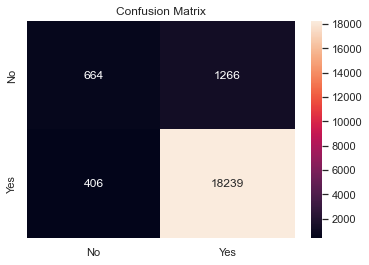

In [100]:
y_Pred = current_Predict_Undersampled.copy()

y_Pred = np.argmax(y_Pred, axis=1)
y_Test_undersampled = np.argmax(y_Test, axis=1)

# Calculate the accuracy score
accuracy = accuracy_score(y_Test_undersampled, y_Pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
confusion_Matrix_Undersampled = confusion_matrix(y_Test_undersampled, y_Pred)

# Calculate false positive rate
false_Positive_Rate_Undersampled = confusion_Matrix_Undersampled[0,1]/(confusion_Matrix_Undersampled[0,0]+confusion_Matrix_Undersampled[0,1])
result.loc[0,'Undersampled False Positive Rate'] = false_Positive_Rate_Undersampled
print("False Positive Rate (false_Positive_Rate):", false_Positive_Rate_Undersampled)

# Calculate false negative rate
false_Negative_Rate_Undersampled = confusion_Matrix_Undersampled[1,0]/(confusion_Matrix_Undersampled[1,0]+confusion_Matrix_Undersampled[1,1])
result.loc[0,'Undersampled False Negative Rate'] = false_Negative_Rate_Undersampled
print("False Negative Rate (false_Negative_Rate):", false_Negative_Rate_Undersampled)

# Print classification report
print("Test Data") 
print(classification_report(y_Test_undersampled, y_Pred, target_names = ["Yes", "No"])) 

# Plot confusion matrix
sb.heatmap( data = pd.DataFrame( data = confusion_Matrix_Undersampled, columns = ["No" , "Yes"], index = ["No", "Yes"] ), annot = True, fmt = "d")
plt.title("Confusion Matrix")

**Feature of Importance Graph**

Feature of importance is based on how useful a feature is at predicting and in this case, predicting heart disease. The graph below allows us to visualize this

Undersampled Feature Importances:
High Cholestrol: 17.27
Pneumonia Vaccine: 15.78
Heart Attack: 13.72
Age: 13.45
Difficulty Walking: 10.73
Physical Health: 10.23
High Blood Pressure: 9.47
General Health: 9.02
Stroke: 6.78


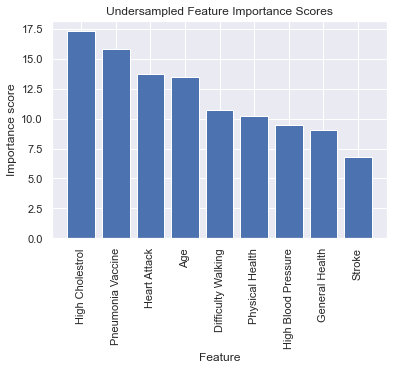

In [101]:
#Define feature names
#feature_Names = ['Age', 'Physical Health', 'Mental Health', 'Alcohol Consumption', 'Heart Attack', 'General Health', 'High Blood Pressure', 'High Cholestrol', 'Pneumonia Vaccine', 'Race']

#Get the weights of the first layer of the neural network
weights_Undersampled = undersampled_Model.layers[0].get_weights()[0]

#Calculate the feature importance scores
importance_Scores_Undersampled = abs(weights_Undersampled).sum(axis=1)

#Sort the features by importance score
sorted_Indices_Undersampled = importance_Scores_Undersampled.argsort()[::-1]
sorted_Scores_Undersampled = importance_Scores_Undersampled[sorted_Indices_Undersampled]

#Print the feature names and their importance scores
print("Undersampled Feature Importances:")
for i, score in zip(sorted_Indices_Undersampled, sorted_Scores_Undersampled):
    print(f"{feature_Names[i]}: {score:.2f}")

#Create the bar graph
plt.bar(range(len(sorted_Scores_Undersampled)), sorted_Scores_Undersampled)
plt.xticks(range(len(sorted_Scores_Undersampled)), [feature_Names[i] for i in sorted_Indices_Undersampled], rotation=90, ha='center')
plt.xlabel('Feature')
plt.ylabel('Importance score')
plt.title('Undersampled Feature Importance Scores')
plt.show()

The graph above shows the importance of each feature in predicitng heart disease and the 4 most important features are **High Cholestrol** which has the highest importance in predicting heart disease and then followed by Pneumonia Vaccine, Heart Attack and Age.

**Calibration Curve** 

This is a graphical representation of the relationship between the predicted probabilities of a model and the actual data

Bin 1: Mean Predicted Value = 0.08, Fraction Of Positives = 0.31
Bin 2: Mean Predicted Value = 0.19, Fraction Of Positives = 0.39
Bin 3: Mean Predicted Value = 0.31, Fraction Of Positives = 0.41
Bin 4: Mean Predicted Value = 0.43, Fraction Of Positives = 0.44
Bin 5: Mean Predicted Value = 0.56, Fraction Of Positives = 0.36
Bin 6: Mean Predicted Value = 0.69, Fraction Of Positives = 0.53
Bin 7: Mean Predicted Value = 0.82, Fraction Of Positives = 0.56
Bin 8: Mean Predicted Value = 1.00, Fraction Of Positives = 0.95


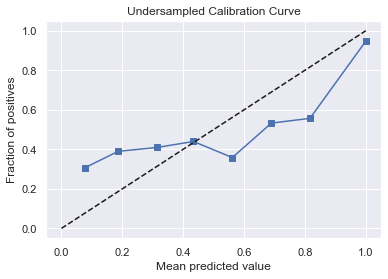

In [102]:
# Get the predicted probabilities for the positive class
current_Predict_Probability_Undersampled = undersampled_Model.predict(x_Test)[:, 1]

# Create the calibration curve
fraction_Of_Positives_Undersampled, mean_Predicted_Value_Undersampled = calibration_curve(y_Test[:, 1], current_Predict_Probability_Undersampled, n_bins=8)

# Plot the calibration curve
plt.plot(mean_Predicted_Value_Undersampled, fraction_Of_Positives_Undersampled, "s-")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of positives")
plt.title("Undersampled Calibration Curve")

# Print the values of respective points
for i, (mpv, fop) in enumerate(zip(mean_Predicted_Value_Undersampled, fraction_Of_Positives_Undersampled)):
    print("Bin {}: Mean Predicted Value = {:.2f}, Fraction Of Positives = {:.2f}".format(i+1, mpv, fop))

plt.show()

As you can see the calibration curve is very out of place, one way we can fix this is by using isotonic regression. 

**Precision-recall Curve Graph**

This graph shows the trade off between precision and recall of the different thresholds. A high area under the curve shows high precision and recall and vise versa. High precision shows a low false positive rate and high recall shows a low false negative rate

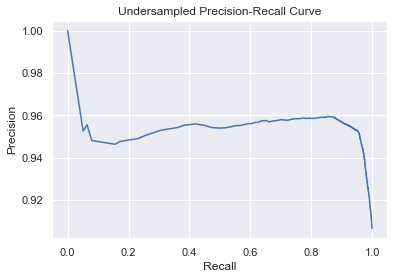

In [103]:
# Get the predicted probabilities for the positive class
#current_Predict_Probability_Undersampled = undersampled_Model.predict(x_Test)[:, 1]

# Compute the precision, recall and threshold values
precision_Undersampled, recall_Undersampled, threshold_Undersampled = precision_recall_curve(y_Test[:, 1], current_Predict_Probability_Undersampled)


    
# Plot the precision-recall curve
plt.plot(recall_Undersampled, precision_Undersampled)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Undersampled Precision-Recall Curve')
plt.show()

**ROC Curve**


Used to evaluate the model used

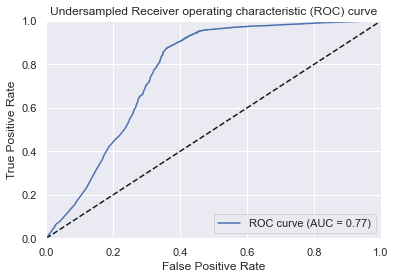

This is the undersampled Gini coefficient:  0.533106293342893


In [104]:

# Convert "yes" and "no" to binary 0 and 1
le = LabelEncoder()
y_Test_Undersampled = le.fit_transform(y_Test_undersampled)

# Predict the probability of the positive class on the test data
y_Probability_Undersampled = undersampled_Model.predict(x_Test)[:,1]

# Compute the ROC curve based on the true labels and predicted probabilities
false_Positive_Rate_Undersampled, true_Positive_Rate_Undersampled, thresholds_Undersampled = roc_curve(y_Test_undersampled, y_Probability_Undersampled)

# Calculate the AUC score based on the true labels and predicted probabilities
auc_Undersampled = roc_auc_score(y_Test_Undersampled, y_Probability_Undersampled)


# Plot the ROC curve
plt.plot(false_Positive_Rate_Undersampled, true_Positive_Rate_Undersampled, label='ROC curve (AUC = %0.2f)' % auc_Undersampled)
plt.plot([0, 1], [0, 1], 'k--')  # random guessing curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Undersampled Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

gini_Undersampled = auc_Undersampled*2-1

print("This is the undersampled Gini coefficient: ",gini_Undersampled)

**Applying Isotonic Regression**

We will now apply isotonic regression model to normalise the undersampled data and make it more accurate.

Bin 1: Mean Predicted Value = 0.00, Fraction Of Positives = 0.00
Bin 2: Mean Predicted Value = 0.17, Fraction Of Positives = 0.17
Bin 3: Mean Predicted Value = 0.33, Fraction Of Positives = 0.33
Bin 4: Mean Predicted Value = 0.43, Fraction Of Positives = 0.43
Bin 5: Mean Predicted Value = 0.59, Fraction Of Positives = 0.59
Bin 6: Mean Predicted Value = 0.74, Fraction Of Positives = 0.74
Bin 7: Mean Predicted Value = 0.87, Fraction Of Positives = 0.87
Bin 8: Mean Predicted Value = 0.95, Fraction Of Positives = 0.95


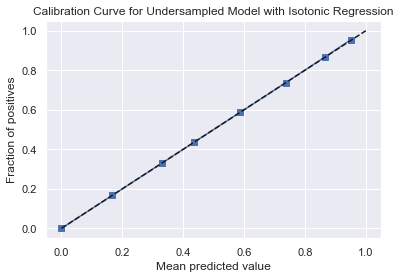

In [105]:
# Fit isotonic regression model to the predicted probabilities
ir = IsotonicRegression()
ir.fit(current_Predict_Probability_Undersampled, y_Test[:, 1])

# Transform the predicted probabilities using the isotonic regression model
current_Predict_Probability_Undersampled = ir.transform(current_Predict_Probability_Undersampled)
current_Predict_Probability_Undersampled[np.isnan(current_Predict_Probability_Undersampled)] = np.nanmean(current_Predict_Probability_Undersampled)

# Create the calibration curve for the calibrated probabilities
fraction_Of_Positives_Undersampled_calibrated, mean_Predicted_Value_Undersampled_calibrated = calibration_curve(y_Test[:, 1], current_Predict_Probability_Undersampled, n_bins=8)

# Plot the calibration curve for the calibrated probabilities
plt.plot(mean_Predicted_Value_Undersampled_calibrated, fraction_Of_Positives_Undersampled_calibrated, "s-")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curve for Undersampled Model with Isotonic Regression")

# Print the values of respective points
for i, (mpv, fop) in enumerate(zip(mean_Predicted_Value_Undersampled_calibrated, fraction_Of_Positives_Undersampled_calibrated)):
    print("Bin {}: Mean Predicted Value = {:.2f}, Fraction Of Positives = {:.2f}".format(i+1, mpv, fop))

plt.show()


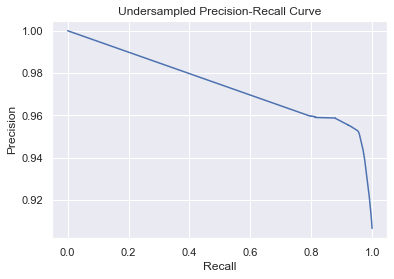

In [106]:
# Get the predicted probabilities for the positive class
#current_Predict_Probability_Undersampled = undersampled_Model.predict(x_Test)[:, 1]

# Compute the precision, recall and threshold values
precision_Undersampled, recall_Undersampled, threshold_Undersampled = precision_recall_curve(y_Test[:, 1], current_Predict_Probability_Undersampled)


    
# Plot the precision-recall curve
plt.plot(recall_Undersampled, precision_Undersampled)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Undersampled Precision-Recall Curve')
plt.show()

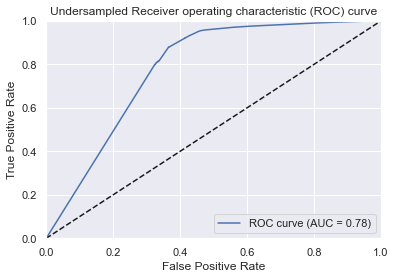

This is the undersampled Gini coefficient:  0.5632008470231225


In [107]:

# Convert "yes" and "no" to binary 0 and 1
le = LabelEncoder()
y_Test_Undersampled = le.fit_transform(y_Test_undersampled)

# Predict the probability of the positive class on the test data
#y_Probability_Undersampled = undersampled_Model.predict(x_Test)[:,1]

# Compute the ROC curve based on the true labels and predicted probabilities
false_Positive_Rate_Undersampled, true_Positive_Rate_Undersampled, thresholds_Undersampled = roc_curve(y_Test_Undersampled, current_Predict_Probability_Undersampled)

# Calculate the AUC score based on the true labels and predicted probabilities
auc_Undersampled = roc_auc_score(y_Test_Undersampled, current_Predict_Probability_Undersampled)
result.loc[0,'Undersampled AUC'] =auc_Undersampled

# Plot the ROC curve
plt.plot(false_Positive_Rate_Undersampled, true_Positive_Rate_Undersampled, label='ROC curve (AUC = %0.2f)' % auc_Undersampled)
plt.plot([0, 1], [0, 1], 'k--')  # random guessing curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Undersampled Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

gini_Undersampled = auc_Undersampled*2-1
result.loc[0,'Undersampled Gini'] = gini_Undersampled
print("This is the undersampled Gini coefficient: ",gini_Undersampled)

Based on the AUC value, this shows that the model is able to perform well for it's classification accuracy 

Also Gini coefficient is to measure of inequality of a distribution in a dataset. A gini coefficient of 0.56 shows that there is a relatively low level of inequality in the data.

#### Oversampling Data Training

In [108]:
smote_Oversampled = SMOTE(sampling_strategy='minority')

x_Train_Oversampled, y_Train_Oversampled = smote_Oversampled.fit_resample(x_Train, y_Train)
x_Train_Oversampled = scaler.fit_transform(x_Train_Oversampled)
joblib.dump(scaler, 'Scaler/oversampled_Scaler.pkl');

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_Train_Oversampled = encoder.fit_transform(y_Train_Oversampled.reshape(-1, 1)).toarray()

print("This is the shape for x_Train: ",x_Train.shape)
print("This is the shape for y_Train: ",y_Train.shape)
print("This is the shape for x_Train_Oversampled: ",x_Train_Oversampled.shape)
print("This is the shape for y_Train_Oversampled: ",y_Train_Oversampled.shape)

This is the shape for x_Train:  (82298, 9)
This is the shape for y_Train:  (82298, 2)
This is the shape for x_Train_Oversampled:  (148950, 9)
This is the shape for y_Train_Oversampled:  (148950, 2)


We will be using **Batch normalisation** (batch norm) which normalises the layer's inputs by re-centering and re-scaling them which optimises them. This allows the training of neural networks to be faster and more stable

On top of batch normalisation, we used **dropout** which is a regularization technique to reduce overfitting in neural networks. 

It is an efficient way of performing model averaging on neural networks.

In [109]:
oversampled_Model = models.Sequential()
oversampled_Model.add(tf.keras.Input(shape=[x_Train.shape[1]])) # 10 input layer
oversampled_Model.add(layers.Dense(128, activation='relu'))
oversampled_Model.add(layers.BatchNormalization())
oversampled_Model.add(layers.Dropout(0.5))
oversampled_Model.add(layers.Dense(128, activation='relu'))
oversampled_Model.add(layers.BatchNormalization())
oversampled_Model.add(layers.Dropout(0.5))
oversampled_Model.add(layers.Dense(y_Train.shape[1], activation='sigmoid'))# 2 output layer
print(oversampled_Model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1280      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                

In [110]:
oversampled_Model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # configuring the loss, optimizer and metrics of the train model

In [111]:
early_Stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)#patience means that when the model is fully trained it'll train 10 more times 
chistory = oversampled_Model.fit(x_Train_Oversampled, y_Train_Oversampled, batch_size=64, epochs=2000,validation_split = 0.2, verbose=0, callbacks=[early_Stop])

In [112]:
## Evaluate the model and display the score
print(y_Test.shape)
print(x_Test.shape)
score_Oversampled = oversampled_Model.evaluate(x_Test, y_Test, verbose=1) # evaluate model using testing data
print("Test Score:", score_Oversampled[0])
print("Test Accuracy:", score_Oversampled[1])
oversampled_Model.save('Model/oversampled.h5')

(20575, 2)
(20575, 9)
643/643 [==============================] - 1s 2ms/step - loss: 0.5532 - accuracy: 0.7467
Test Score: 0.5532214641571045
Test Accuracy: 0.7467314600944519


#### Testing of Model Accuracy

In [113]:
#Load Oversampled model 
model_Oversampled = tf.keras.models.load_model('Model/oversampled.h5')

#Load Scaler
scaler_Oversampled = joblib.load('Scaler/oversampled_Scaler.pkl')

def predict_Heart_Disease_Oversampled(age, physical_Health, general_Health, heart_Attack, high_Blood_Pressure, high_Cholestrol, difficulty_Walking, pneumonia_Vaccine, stroke):
    # Transform input data 
    input_Data = [[age, physical_Health, general_Health, heart_Attack, high_Blood_Pressure, high_Cholestrol, difficulty_Walking, pneumonia_Vaccine, stroke]]
    scaled_Data = scaler_Oversampled.transform(input_Data)
    
    # Make prediction
    prediction = model_Oversampled.predict(scaled_Data)
    
    # Classify input as positive or negative
    if prediction[0][0] > prediction[0][1]:
        probability_Heart_Disease = prediction[0][0]
        probability_No_Heart_Disease = 1 - probability_Heart_Disease
    else:
        probability_No_Heart_Disease = prediction[0][0]
        probability_Heart_Disease = 1 - probability_No_Heart_Disease
    
    # Print probabilities
    print("Probability of Heart Disease: {:.2f} %".format(probability_Heart_Disease * 100))
    print("Probability of No Heart Disease: {:.2f} %".format(probability_No_Heart_Disease * 100))

    

**User Model Prediction test**

Now that we have trained the model, we will now input our own values and see the prediction on the probability of heart disease as seen below.

In [114]:
while True:
    try:
        age_Oversampled = float(input("Enter age: "))
        physical_Health_Oversampled = float(input("Enter physical health score (0-30): "))
        general_Health_Oversampled = float(input("Enter general health score (0-4): "))
        heart_Attack_Oversampled = float(input("Enter heart attack history (0/1): "))
        high_Blood_Pressure_Oversampled = float(input("Enter high blood pressure history (0/1): "))
        high_Cholestrol_Oversampled = float(input("Enter high cholesterol history (0/1): "))
        difficulty_Walking_Oversampled = float(input("Enter difficulty walking score (0/1): "))
        pneumonia_Vaccine_Oversampled = float(input("Enter pneumonia vaccine history (0/1): "))
        stroke_Oversampled = float(input("Enter stroke history (0/1): "))
        
        # Check that input values are within the expected range
        if not 0 <= physical_Health_Oversampled <= 30 or not  0 <= general_Health_Oversampled <= 4:
            raise ValueError("Invalid input. Scores must be between 0-30 and general health between 0-4.")
        if heart_Attack_Oversampled not in [0, 1] or high_Blood_Pressure_Oversampled not in [0, 1] or high_Cholestrol_Oversampled not in [0, 1] or difficulty_Walking_Oversampled not in [0, 1] or pneumonia_Vaccine_Oversampled not in [0, 1] or stroke not in [0, 1]:
            raise ValueError("Invalid input. History values must be 0 or 1.")

        # Use the function to make a prediction
        result_Undersampled = predict_Heart_Disease_Oversampled(
            age=age_Oversampled,
            physical_Health=physical_Health_Oversampled,
            general_Health=general_Health_Oversampled,
            heart_Attack=heart_Attack_Oversampled,
            high_Blood_Pressure=high_Blood_Pressure_Oversampled,
            high_Cholestrol=high_Cholestrol_Oversampled,
            difficulty_Walking=difficulty_Walking_Oversampled,
            pneumonia_Vaccine=pneumonia_Vaccine_Oversampled,
            stroke = stroke_Oversampled)
        
       # print(result_Oversampled)
        # Ask user whether to continue or not
        choice = input("Do you want to continue? (y/n): ").strip().lower()
        if choice == "n":
            break
            

    except ValueError as e:
        print(str(e))
        print("Please enter valid input values.")
    except Exception as e:
        print("An error occurred. Please try again.")
        print(str(e))

Enter age:  45
Enter physical health score (0-30):  22
Enter general health score (0-4):  2
Enter heart attack history (0/1):  0
Enter high blood pressure history (0/1):  1
Enter high cholesterol history (0/1):  1
Enter difficulty walking score (0/1):  1
Enter pneumonia vaccine history (0/1):  0
Enter stroke history (0/1):  0


Probability of Heart Disease: 99.05 %
Probability of No Heart Disease: 0.95 %


Do you want to continue? (y/n):  y
Enter age:  23
Enter physical health score (0-30):  2
Enter general health score (0-4):  3
Enter heart attack history (0/1):  0
Enter high blood pressure history (0/1):  0
Enter high cholesterol history (0/1):  0
Enter difficulty walking score (0/1):  0
Enter pneumonia vaccine history (0/1):  1
Enter stroke history (0/1):  0


Probability of Heart Disease: 76.02 %
Probability of No Heart Disease: 23.98 %


Do you want to continue? (y/n):  n


In [115]:
## Predict the model
current_Predict_Oversampled = oversampled_Model.predict(x_Test) # predicted values using train model 

#print(current_Predict_Oversampled[:10])
labels_Oversampled = ['Yes', 'No']
predicted_Oversampled = []
actual_Oversampled = []

output_Oversampled = pd.DataFrame(columns = ['predicted', 'actual'], dtype = 'category')

for i in current_Predict_Oversampled: # for each row in current_Predict,it will look for the index with the highest value 
    heart_Disease_Oversampled = labels[np.argmax(i)] # use argmax, look each of the rows and see which one gives the highest value
    predicted_Oversampled.append(heart_Disease_Oversampled) # save the label from labels into predicted list 
    
output_Oversampled ['predicted'] = predicted_Oversampled # save the value in predicted in output array 

y_Test_Numpy_Oversampled = y_Test

for j in y_Test_Numpy_Oversampled: 
    heart_Disease_Oversampled = labels_Oversampled[np.argmax(j)]
    actual_Oversampled.append(heart_Disease_Oversampled)
    
output_Oversampled['actual'] = actual_Oversampled # save the value in actual in output array

print(output_Oversampled.head(20)) # print the first 5 rows for output 


   predicted actual
0        Yes     No
1         No     No
2        Yes    Yes
3         No     No
4         No     No
5         No     No
6         No     No
7         No     No
8        Yes    Yes
9         No     No
10        No     No
11        No     No
12        No     No
13        No     No
14       Yes     No
15        No     No
16        No     No
17        No     No
18        No     No
19       Yes     No


**Confusion Matrix**

Accuracy: 0.7467314702308627
False Positive Rate (false_Positive_Rate): 0.17823834196891192
False Negative Rate (false_Negative_Rate): 0.2610351300616787
Test Data
              precision    recall  f1-score   support

         Yes       0.25      0.82      0.38      1930
          No       0.98      0.74      0.84     18645

    accuracy                           0.75     20575
   macro avg       0.61      0.78      0.61     20575
weighted avg       0.91      0.75      0.80     20575



Text(0.5, 1.0, 'Confusion Matrix')

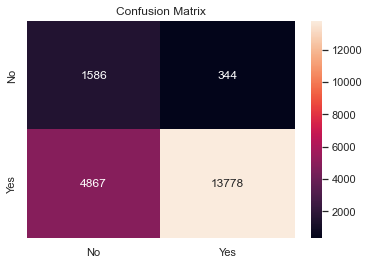

In [116]:
# Create the logistic regression model with categorical crossentropy loss function

y_Pred = current_Predict_Oversampled.copy()

y_Pred = np.argmax(y_Pred, axis=1)
y_Test_oversampled = np.argmax(y_Test, axis=1)

# Calculate the accuracy score
accuracy = accuracy_score(y_Test_oversampled, y_Pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
confusion_Matrix_Oversampled = confusion_matrix(y_Test_oversampled, y_Pred)

# Calculate false positive rate
false_Positive_Rate_Oversampled = confusion_Matrix_Oversampled[0,1]/(confusion_Matrix_Oversampled[0,0]+confusion_Matrix_Oversampled[0,1])
result.loc[0,'Oversampled False Positive Rate'] = false_Positive_Rate_Oversampled
print("False Positive Rate (false_Positive_Rate):", false_Positive_Rate_Oversampled)

# Calculate false negative rate
false_Negative_Rate_Oversampled = confusion_Matrix_Oversampled[1,0]/(confusion_Matrix_Oversampled[1,0]+confusion_Matrix_Oversampled[1,1])
result.loc[0,'Oversampled False Negative Rate'] = false_Negative_Rate_Oversampled
print("False Negative Rate (false_Negative_Rate):", false_Negative_Rate_Oversampled)

# Print classification report
print("Test Data") 
print(classification_report(y_Test_oversampled, y_Pred, target_names = ["Yes", "No"])) 

# Plot confusion matrix
sb.heatmap( data = pd.DataFrame( data = confusion_Matrix_Oversampled, columns = ["No" , "Yes"], index = ["No", "Yes"] ), annot = True, fmt = "d")
plt.title("Confusion Matrix")

**Feature of Importance Graph**

Feature of importance is based on how useful a feature is at predicting and in this case, predicting heart disease. The graph below allows us to visualize this

Oversampled Feature Importances:
Heart Attack: 56.88
General Health: 50.28
Age: 37.14
High Blood Pressure: 23.82
High Cholestrol: 22.35
Pneumonia Vaccine: 21.87
Physical Health: 19.11
Stroke: 17.50
Difficulty Walking: 16.50


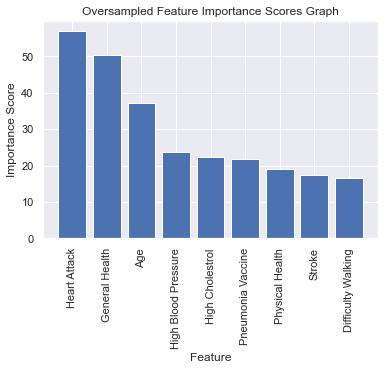

In [117]:
#Define feature names
#feature_Names = ['Age', 'Physical Health', 'Mental Health', 'Alcohol Consumption', 'Heart Attack', 'General Health', 'High Blood Pressure', 'High Cholestrol', 'Pneumonia Vaccine']

#Get the weights of the first layer of the neural network
weights_Oversampled = oversampled_Model.layers[0].get_weights()[0]

#Calculate the feature importance scores
importance_Scores_Oversampled = abs(weights_Oversampled).sum(axis=1)

#Sort the features by importance score
sorted_Indices_Oversampled = importance_Scores_Oversampled.argsort()[::-1]
sorted_Scores_Oversampled = importance_Scores_Oversampled[sorted_Indices_Oversampled]

#Print the feature names and their importance scores
print("Oversampled Feature Importances:")
for i, score in zip(sorted_Indices_Oversampled, sorted_Scores_Oversampled):
    print(f"{feature_Names[i]}: {score:.2f}")

#Create the bar graph
plt.bar(range(len(sorted_Scores_Oversampled)), sorted_Scores_Oversampled)
plt.xticks(range(len(sorted_Scores_Oversampled)), [feature_Names[i] for i in sorted_Indices_Oversampled], rotation=90, ha='center')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Oversampled Feature Importance Scores Graph')
plt.show()


The graph above shows the importance of each feature in predicitng heart disease and the 4 most important features are **Heart Attack** which has the highest importance in predicting heart disease and then followed by General Health, Age and High Blood Pressure.

**Calibration Curve** 

This is a graphical representation of the relationship between the predicted probabilities of a model and the actual data

Bin 1: Mean Predicted Value = 0.02, Fraction Of Positives = 0.45
Bin 2: Mean Predicted Value = 0.20, Fraction Of Positives = 0.84
Bin 3: Mean Predicted Value = 0.33, Fraction Of Positives = 0.84
Bin 4: Mean Predicted Value = 0.45, Fraction Of Positives = 0.90
Bin 5: Mean Predicted Value = 0.55, Fraction Of Positives = 0.94
Bin 6: Mean Predicted Value = 0.69, Fraction Of Positives = 0.97
Bin 7: Mean Predicted Value = 0.82, Fraction Of Positives = 0.99
Bin 8: Mean Predicted Value = 0.95, Fraction Of Positives = 0.99


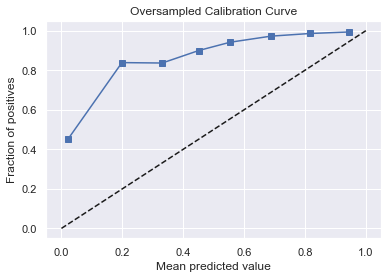

In [118]:
# Get the predicted probabilities for the positive class
current_Predict_Probability_Oversampled = oversampled_Model.predict(x_Test)[:, 1]

# Create the calibration curve
fraction_Of_Positives_Oversampled, mean_Predicted_Value_Oversampled = calibration_curve(y_Test[:, 1], current_Predict_Probability_Oversampled, n_bins=8)

# Plot the calibration curve
plt.plot(mean_Predicted_Value_Oversampled, fraction_Of_Positives_Oversampled, "s-")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of positives")
plt.title("Oversampled Calibration Curve")

# Print the values of respective points
for i, (mpv, fop) in enumerate(zip(mean_Predicted_Value_Oversampled, fraction_Of_Positives_Oversampled)):
    print("Bin {}: Mean Predicted Value = {:.2f}, Fraction Of Positives = {:.2f}".format(i+1, mpv, fop))

plt.show()

**Precision-recall Curve Graph**

This graph shows the trade off between precision and trade off of the different thresholds. A high area under the curve shows high precision and recall and vise versa. High precision shows a low false positive rate and high recall shows a low false negative rate

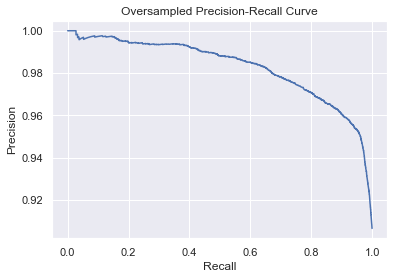

In [119]:

# Compute the precision, recall and threshold values
precision_Oversampled, recall_Oversampled, threshold_Oversampled = precision_recall_curve(y_Test[:, 1], current_Predict_Probability_Oversampled)

# Plot the precision-recall curve
plt.plot(recall_Oversampled, precision_Oversampled)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Oversampled Precision-Recall Curve')
plt.show()

**ROC Curve**


Used to evaluate the model used

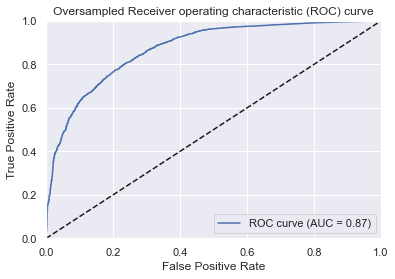

This is the Oversampled Gini coefficient:  0.7455414987140423


In [120]:


# Convert "yes" and "no" to binary 0 and 1
le = LabelEncoder()
y_Test_Oversampled = le.fit_transform(y_Test_oversampled)

# Predict the probability of the positive class on the test data
#y_Probability_Oversampled = oversampled_Model.predict(x_Test)[:,1]

# Compute the ROC curve based on the true labels and predicted probabilities
false_Positive_Rate_Oversampled, true_Positive_Rate_Oversampled, thresholds_Oversampled = roc_curve(y_Test_Oversampled, current_Predict_Probability_Oversampled)

# Calculate the AUC score based on the true labels and predicted probabilities
auc_Oversampled = roc_auc_score(y_Test_Oversampled, current_Predict_Probability_Oversampled)

# Plot the ROC curve
plt.plot(false_Positive_Rate_Oversampled, true_Positive_Rate_Oversampled, label='ROC curve (AUC = %0.2f)' % auc_Oversampled)
plt.plot([0, 1], [0, 1], 'k--')  # random guessing curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Oversampled Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

gini_Oversampled = auc_Oversampled*2-1
print("This is the Oversampled Gini coefficient: ",gini_Oversampled)

**Applying Isotonic Regression**

We will now apply isotonic regression model to normalise the oversampled data and make it more accurate.

Bin 1: Mean Predicted Value = 0.00, Fraction Of Positives = 0.00
Bin 2: Mean Predicted Value = 0.16, Fraction Of Positives = 0.16
Bin 3: Mean Predicted Value = 0.31, Fraction Of Positives = 0.31
Bin 4: Mean Predicted Value = 0.43, Fraction Of Positives = 0.43
Bin 5: Mean Predicted Value = 0.57, Fraction Of Positives = 0.57
Bin 6: Mean Predicted Value = 0.73, Fraction Of Positives = 0.73
Bin 7: Mean Predicted Value = 0.83, Fraction Of Positives = 0.83
Bin 8: Mean Predicted Value = 0.96, Fraction Of Positives = 0.96


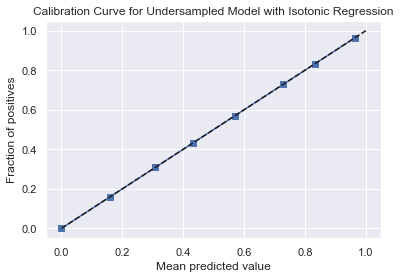

In [121]:
# Fit isotonic regression model to the predicted probabilities
ir = IsotonicRegression()
ir.fit(current_Predict_Probability_Oversampled, y_Test[:, 1])

# Transform the predicted probabilities using the isotonic regression model
current_Predict_Probability_Oversampled = ir.transform(current_Predict_Probability_Oversampled)
current_Predict_Probability_Oversampled[np.isnan(current_Predict_Probability_Oversampled)] = np.nanmean(current_Predict_Probability_Oversampled)

# Create the calibration curve for the calibrated probabilities
fraction_Of_Positives_Oversampled_calibrated, mean_Predicted_Value_Oversampled_calibrated = calibration_curve(y_Test[:, 1], current_Predict_Probability_Oversampled, n_bins=8)

# Plot the calibration curve for the calibrated probabilities
plt.plot(mean_Predicted_Value_Oversampled_calibrated, fraction_Of_Positives_Oversampled_calibrated, "s-")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curve for Undersampled Model with Isotonic Regression")

# Print the values of respective points
for i, (mpv, fop) in enumerate(zip(mean_Predicted_Value_Oversampled_calibrated, fraction_Of_Positives_Oversampled_calibrated)):
    print("Bin {}: Mean Predicted Value = {:.2f}, Fraction Of Positives = {:.2f}".format(i+1, mpv, fop))

plt.show()


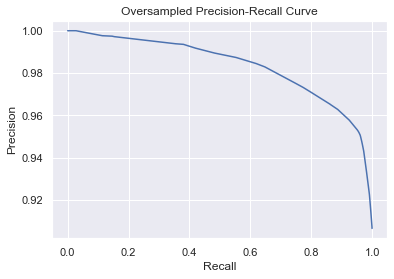

In [122]:

# Compute the precision, recall and threshold values
precision_Oversampled, recall_Oversampled, threshold_Oversampled = precision_recall_curve(y_Test[:, 1], current_Predict_Probability_Oversampled)

# Plot the precision-recall curve
plt.plot(recall_Oversampled, precision_Oversampled)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Oversampled Precision-Recall Curve')
plt.show()

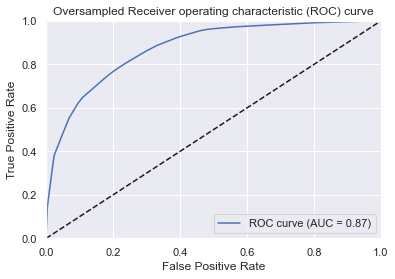

This is the Oversampled Gini coefficient:  0.7494491153916163


In [123]:
# Convert "yes" and "no" to binary 0 and 1
le = LabelEncoder()
y_Test_Oversampled = le.fit_transform(y_Test_Oversampled)

# Predict the probability of the positive class on the test data
#y_Probability_Oversampled = oversampled_Model.predict(x_Test)[:,1]

# Compute the ROC curve based on the true labels and predicted probabilities
false_Positive_Rate_Oversampled, true_Positive_Rate_Oversampled, thresholds_Oversampled = roc_curve(y_Test_Oversampled, current_Predict_Probability_Oversampled)

# Calculate the AUC score based on the true labels and predicted probabilities
auc_Oversampled = roc_auc_score(y_Test_Oversampled, current_Predict_Probability_Oversampled)
result.loc[0,'Oversampled AUC'] = auc_Oversampled
# Plot the ROC curve
plt.plot(false_Positive_Rate_Oversampled, true_Positive_Rate_Oversampled, label='ROC curve (AUC = %0.2f)' % auc_Oversampled)
plt.plot([0, 1], [0, 1], 'k--')  # random guessing curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Oversampled Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

gini_Oversampled = auc_Oversampled*2-1
result.loc[0,'Oversampled Gini'] = gini_Oversampled
print("This is the Oversampled Gini coefficient: ",gini_Oversampled)

Based on the AUC value, this shows that the model is able to perform well for it's classification accuracy 

Also Gini coefficient is to measure of inequality of a distribution in a dataset. A gini coefficient of 0.749 shows that there is a relative high level of inequality of data.

In [124]:
# Define a function to format the dataframe as a table
def print_as_table(df):
    # Define a dictionary to hold the maximum width of each column
    column_widths = {}

    # Find the maximum width of each column
    for column in df.columns:
        column_widths[column] = max(df[column].apply(lambda x: len(str(x))).max(), len(column))

    # Print the header row
    header = "|".join([column.ljust(column_widths[column]) for column in df.columns])
    print(f"|{header}|")

    # Print the separator row
    separator = "+".join(["-" * column_widths[column] for column in df.columns])
    print(f"+{separator}+")

    # Print the data rows
    for index, row in df.iterrows():
        data = "|".join([str(row[column]).ljust(column_widths[column]) for column in df.columns])
        print(f"|{data}|")

    # Print the bottom separator row
    print(f"+{separator}+")

In [125]:
false_Negative_Rate_Cols = result.filter(like="False Negative Rate")
false_Positive_Rate_Cols = result.filter(like="False Positive Rate")
auc_Cols = result.filter(like = "AUC")
gini_Cols = result.filter(like = "Gini")

# Print the tables
print("False Negative Rate:")
print_as_table(false_Negative_Rate_Cols)

print("False Positive Rate:")
print_as_table(false_Positive_Rate_Cols)

print("AUC:")
print_as_table(auc_Cols)

print("Gini:")
print_as_table(gini_Cols)


False Negative Rate:
|Normal False Negative Rate|Undersampled False Negative Rate|Oversampled False Negative Rate|
+--------------------------+--------------------------------+-------------------------------+
|0.0277822472512738        |0.021775274872620005            |0.2610351300616787             |
+--------------------------+--------------------------------+-------------------------------+
False Positive Rate:
|Normal False Positive Rate|Undersampled False Positive Rate|Oversampled False Positive Rate|
+--------------------------+--------------------------------+-------------------------------+
|0.5823834196891192        |0.655958549222798               |0.17823834196891192            |
+--------------------------+--------------------------------+-------------------------------+
AUC:
|Normal AUC        |Undersampled AUC  |Oversampled AUC   |
+------------------+------------------+------------------+
|0.8766795192977045|0.7816004235115612|0.8747245576958081|
+------------------+----

In the medical field, a lower false negative rate is more important than a lower false positive rate because a false negative means a person is classified as healthy, which can result in delayed diagnosis or treatment. On the other hand, a false positive may result in unnecessary treatment and additional testing, but it is generally considered less harmful than a false negative in the case of heart disease. Therefore, in this specific use case, a lower FNR is more critical to prevent missed diagnoses and potential negative health consequences.

# Conclusion

We found that the original data was the most accurate with an accuracy of 0.92 and undersampled data had an accuracy of 0.918.However, the undersampled data had the lower GINI coefficient of 0.58 after isotonic regression which shows that the undersampled data has a lower data inequality. On top of that, the undersampled data has the lowest false negative rate and the importance of this has been explained above.

Looking at the Original data, feature of importances graph, we can see that the model placed a higher importance on **Age**, **General Health**,**Difficulty Walking** and **High Blood Pressure** where as the undersampled data, feature of importances graph placed a higher importance on **High Cholestrol**, **Pneumonia Vaccine**, **Heart Attack** and **Age**.   Lastly, the oversampled data, feature of importances graph placed a higher importance on **Heart Attack**, **General Health**, **Age** and **High Blood Pressure**. From this, we can deduce that **age** is one of the most important factor in predicting heart disease, followed very closely by **heart attack**. 

**However** all of the features have importance levels that we cannot ignore. All the features importance are relatively high   which shows all the variables have a role in predicting heart disease.

#### To answer our initial question, Age, General health, Heart attack, Physical Health, Difficulty walking, High blood pressure, High Cholestrol and Pneumonia Vaccine are health factors which are risk factors of heart disease with age being one of the most, if not the most important factor. 

## References
Viadinugroho, R. a. A. (2022, January 6). Imbalanced Classification in Python: SMOTE-ENN Method. Medium. https://towardsdatascience.com/imbalanced-classification-in-python-smote-enn-method-db5db06b8d50

GeeksforGeeks. (2023). Isotonic Regression in Scikit Learn. GeeksforGeeks. https://www.geeksforgeeks.org/isotonic-regression-in-scikit-learn/

Brownlee, J. (2019). A Gentle Introduction to Dropout for Regularizing Deep Neural Networks. MachineLearningMastery.com. https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/

Brownlee, J. (2019b). A Gentle Introduction to Batch Normalization for Deep Neural Networks. MachineLearningMastery.com. https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/

McNeese, B. (2020, April 25). Are the Skewness and Kurtosis Useful Statistics? BPI Consulting. https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics#:~:text=The%20rule%20of%20thumb%20seems,the%20data%20are%20highly%20skewed

Jordan, J. (2018). Evaluating a machine learning model. Jeremy Jordan. https://www.jeremyjordan.me/evaluating-a-machine-learning-model/

Abhigyan. (2021, December 13). Calculating Accuracy of an ML Model. - Analytics Vidhya - Medium. Medium. https://medium.com/analytics-vidhya/calculating-accuracy-of-an-ml-model-8ae7894802e

sklearn.metrics.f1_score. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

Fig. 1: Differences between undersampling and oversampling. (n.d.-b). ResearchGate. https://www.researchgate.net/figure/Differences-between-undersampling-and-oversampling_fig1_341164819

Heart Disease and Stroke Prevention. (n.d.-b). https://www.health.ny.gov/diseases/cardiovascular/heart_disease/#:~:text=About%20697%2C000%20people%20die%20of,Americans%20have%20a%20heart%20attack.

Precision-Recall. (n.d.-c). Scikit-learn. https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.

Shin, T. (2022b, November 10). Understanding Feature Importance and How to Implement it in Python. Medium. https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285

Narkhede, S. (2021b, June 15). Understanding Confusion Matrix - Towards Data Science. Medium. https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

Precision-Recall. (n.d.-d). Scikit-learn. http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.

Riva, M., & Riva, M. (2023). Batch Normalization in Convolutional Neural Networks | Baeldung on Computer Science. Baeldung on Computer Science. https://www.baeldung.com/cs/batch-normalization-cnn#:~:text=Batch%20Norm%20is%20a%20normalization,learning%20rates%2C%20making%20learning%20easier.

Doshi, K. (2022, January 6). Batch Norm Explained Visually — How it works, and why neural networks need it. Medium. https://towardsdatascience.com/batch-norm-explained-visually-how-it-works-and-why-neural-networks-need-it-b18919692739

Towards Data Science. (n.d.). Towards Data Science. https://towardsdatascience.com/dropout-in-neural-networks-47a162d621d9%20https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/

D’Agostino, A. (2023b, February 4). Get started with TensorFlow 2.0 — Introduction to deep learning. Medium. https://towardsdatascience.com/a-comprehensive-introduction-to-tensorflows-sequential-api-and-model-for-deep-learning-c5e31aee49fa#:~:text=The%20sequential%20model%20allows%20us,for%20building%20deep%20learning%20models.

Vishwakarma, S. (2023b). Why is Sigmoid Function Important in Artificial Neural Networks? Analytics Vidhya. https://www.analyticsvidhya.com/blog/2023/01/why-is-sigmoid-function-important-in-artificial-neural-networks/#:~:text=Source%3A%20Pexels-,The%20sigmoid%20function%20is%20commonly%20used%20as%20an%20activation%20function,non%2Dlinearity%20into%20the%20model.

Binary Cross Entropy: Where To Use Log Loss In Model Monitoring. (2023b, March 2). Arize AI. https://arize.com/blog-course/binary-cross-entropy-log-loss/#:~:text=What%20Is%20Binary%20Cross%20Entropy,equate%20to%20high%20accuracy%20values.

Binary Classification. (n.d.-b). https://www.learndatasci.com/glossary/binary-classification/#:~:text=each%20binary%20classifier-,What%20is%20Binary%20Classification%3F,Application